In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import glob as glob
import os as os
import shutil as shutil
import scipy.signal as sig
from pandas.core.common import flatten
from skimage import segmentation as seg
from skimage import morphology as morph
from skimage import measure
from scipy import ndimage
from scipy.optimize import curve_fit
from scipy.spatial import ConvexHull

In [13]:
assay = "3d"
expname = "210810-3D-Adaptive"
basepath = os.path.join(assay,expname)

In [14]:
def makedir(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [16]:
makedir(os.path.join(basepath,"MasksGRU"))
makedir(os.path.join(basepath,"MasksRDU"))
makedir(os.path.join(basepath,"GRU"))
makedir(os.path.join(basepath,"RDU"))

In [17]:
times = ['*00h*','*06h*','*12h*','*18h*']

In [19]:
def normaliseimagesred(img):
    clahe = cv2.createCLAHE(clipLimit=20.0,tileGridSize=(8,8))
    clahe_img = clahe.apply(img)
    nrm = cv2.convertScaleAbs(clahe_img,alpha=(255.0/3000))
    nrm[nrm>255]=255
    nrm[nrm<0]=0
    nrm = nrm.astype(np.uint8)
    return nrm
source = os.path.join(basepath,'RRDU')
dest = os.path.join(basepath,'RDU')
files = list(flatten([sorted(glob.glob(os.path.join(source,e))) for e in times]))
q2 = np.zeros(len(files))
for i in range(len(files)):
    img = cv2.imread(files[i],cv2.IMREAD_UNCHANGED)
    q2[i]=(np.amax(img))
    img = normaliseimagesred(img)
    filename = os.path.join(dest,os.path.basename(files[i]))
    cv2.imwrite(filename,img)
    print(q2[i],os.path.basename(files[i]))

1158.0 RDU_1_B10_1_00d00h00m.tif
895.0 RDU_1_B10_1_01d00h00m.tif
1027.0 RDU_1_B10_1_02d00h00m.tif
1857.0 RDU_1_B10_1_03d00h35m.tif
1355.0 RDU_1_B10_1_04d00h35m.tif
1331.0 RDU_1_B10_1_05d00h35m.tif
1576.0 RDU_1_B10_1_06d00h35m.tif
1606.0 RDU_1_B11_1_00d00h00m.tif
1390.0 RDU_1_B11_1_01d00h00m.tif
1454.0 RDU_1_B11_1_02d00h00m.tif
2330.0 RDU_1_B11_1_03d00h35m.tif
1553.0 RDU_1_B11_1_04d00h35m.tif
1631.0 RDU_1_B11_1_05d00h35m.tif
1747.0 RDU_1_B11_1_06d00h35m.tif
193.0 RDU_1_B2_1_00d00h00m.tif
154.0 RDU_1_B2_1_01d00h00m.tif
166.0 RDU_1_B2_1_02d00h00m.tif
191.0 RDU_1_B2_1_03d00h35m.tif
192.0 RDU_1_B2_1_04d00h35m.tif
191.0 RDU_1_B2_1_05d00h35m.tif
187.0 RDU_1_B2_1_06d00h35m.tif
844.0 RDU_1_B3_1_00d00h00m.tif
642.0 RDU_1_B3_1_01d00h00m.tif
474.0 RDU_1_B3_1_02d00h00m.tif
748.0 RDU_1_B3_1_03d00h35m.tif
408.0 RDU_1_B3_1_04d00h35m.tif
411.0 RDU_1_B3_1_05d00h35m.tif
522.0 RDU_1_B3_1_06d00h35m.tif
1254.0 RDU_1_B4_1_00d00h00m.tif
807.0 RDU_1_B4_1_01d00h00m.tif
939.0 RDU_1_B4_1_02d00h00m.tif
1173.0 RDU_

227.0 RDU_1_E7_1_03d00h35m.tif
192.0 RDU_1_E7_1_04d00h35m.tif
196.0 RDU_1_E7_1_05d00h35m.tif
191.0 RDU_1_E7_1_06d00h35m.tif
954.0 RDU_1_E8_1_00d00h00m.tif
614.0 RDU_1_E8_1_01d00h00m.tif
716.0 RDU_1_E8_1_02d00h00m.tif
1369.0 RDU_1_E8_1_03d00h35m.tif
710.0 RDU_1_E8_1_04d00h35m.tif
645.0 RDU_1_E8_1_05d00h35m.tif
502.0 RDU_1_E8_1_06d00h35m.tif
1065.0 RDU_1_E9_1_00d00h00m.tif
838.0 RDU_1_E9_1_01d00h00m.tif
995.0 RDU_1_E9_1_02d00h00m.tif
1296.0 RDU_1_E9_1_03d00h35m.tif
769.0 RDU_1_E9_1_04d00h35m.tif
802.0 RDU_1_E9_1_05d00h35m.tif
712.0 RDU_1_E9_1_06d00h35m.tif
1299.0 RDU_1_F10_1_00d00h00m.tif
1044.0 RDU_1_F10_1_01d00h00m.tif
1345.0 RDU_1_F10_1_02d00h00m.tif
2182.0 RDU_1_F10_1_03d00h35m.tif
1419.0 RDU_1_F10_1_04d00h35m.tif
1275.0 RDU_1_F10_1_05d00h35m.tif
1214.0 RDU_1_F10_1_06d00h35m.tif
1447.0 RDU_1_F11_1_00d00h00m.tif
1002.0 RDU_1_F11_1_01d00h00m.tif
1107.0 RDU_1_F11_1_02d00h00m.tif
1873.0 RDU_1_F11_1_03d00h35m.tif
1452.0 RDU_1_F11_1_04d00h35m.tif
1385.0 RDU_1_F11_1_05d00h35m.tif
1622.0 RDU

1201.0 RDU_2_C5_1_02d00h00m.tif
1768.0 RDU_2_C5_1_03d00h35m.tif
1318.0 RDU_2_C5_1_04d00h35m.tif
1211.0 RDU_2_C5_1_05d00h35m.tif
1324.0 RDU_2_C5_1_06d00h35m.tif
1264.0 RDU_2_C6_1_00d00h00m.tif
985.0 RDU_2_C6_1_01d00h00m.tif
1186.0 RDU_2_C6_1_02d00h00m.tif
2097.0 RDU_2_C6_1_03d00h35m.tif
1389.0 RDU_2_C6_1_04d00h35m.tif
1859.0 RDU_2_C6_1_05d00h35m.tif
1631.0 RDU_2_C6_1_06d00h35m.tif
228.0 RDU_2_C7_1_00d00h00m.tif
222.0 RDU_2_C7_1_01d00h00m.tif
214.0 RDU_2_C7_1_02d00h00m.tif
233.0 RDU_2_C7_1_03d00h35m.tif
225.0 RDU_2_C7_1_04d00h35m.tif
231.0 RDU_2_C7_1_05d00h35m.tif
229.0 RDU_2_C7_1_06d00h35m.tif
532.0 RDU_2_C8_1_00d00h00m.tif
676.0 RDU_2_C8_1_01d00h00m.tif
624.0 RDU_2_C8_1_02d00h00m.tif
1443.0 RDU_2_C8_1_03d00h35m.tif
583.0 RDU_2_C8_1_04d00h35m.tif
717.0 RDU_2_C8_1_05d00h35m.tif
643.0 RDU_2_C8_1_06d00h35m.tif
955.0 RDU_2_C9_1_00d00h00m.tif
980.0 RDU_2_C9_1_01d00h00m.tif
844.0 RDU_2_C9_1_02d00h00m.tif
1246.0 RDU_2_C9_1_03d00h35m.tif
985.0 RDU_2_C9_1_04d00h35m.tif
947.0 RDU_2_C9_1_05d00h35m

222.0 RDU_2_G2_1_04d00h35m.tif
225.0 RDU_2_G2_1_05d00h35m.tif
222.0 RDU_2_G2_1_06d00h35m.tif
974.0 RDU_2_G3_1_00d00h00m.tif
565.0 RDU_2_G3_1_01d00h00m.tif
530.0 RDU_2_G3_1_02d00h00m.tif
1003.0 RDU_2_G3_1_03d00h35m.tif
593.0 RDU_2_G3_1_04d00h35m.tif
638.0 RDU_2_G3_1_05d00h35m.tif
649.0 RDU_2_G3_1_06d00h35m.tif
1039.0 RDU_2_G4_1_00d00h00m.tif
834.0 RDU_2_G4_1_01d00h00m.tif
942.0 RDU_2_G4_1_02d00h00m.tif
1489.0 RDU_2_G4_1_03d00h35m.tif
1104.0 RDU_2_G4_1_04d00h35m.tif
1169.0 RDU_2_G4_1_05d00h35m.tif
1204.0 RDU_2_G4_1_06d00h35m.tif
1127.0 RDU_2_G5_1_00d00h00m.tif
932.0 RDU_2_G5_1_01d00h00m.tif
1288.0 RDU_2_G5_1_02d00h00m.tif
1591.0 RDU_2_G5_1_03d00h35m.tif
1305.0 RDU_2_G5_1_04d00h35m.tif
1282.0 RDU_2_G5_1_05d00h35m.tif
1357.0 RDU_2_G5_1_06d00h35m.tif
1487.0 RDU_2_G6_1_00d00h00m.tif
932.0 RDU_2_G6_1_01d00h00m.tif
1099.0 RDU_2_G6_1_02d00h00m.tif
1904.0 RDU_2_G6_1_03d00h35m.tif
1282.0 RDU_2_G6_1_04d00h35m.tif
1483.0 RDU_2_G6_1_05d00h35m.tif
1528.0 RDU_2_G6_1_06d00h35m.tif
236.0 RDU_2_G7_1_00d0

997.0 RDU_3_E10_1_02d00h00m.tif
1815.0 RDU_3_E10_1_03d00h35m.tif
1198.0 RDU_3_E10_1_04d00h35m.tif
1316.0 RDU_3_E10_1_05d00h35m.tif
1389.0 RDU_3_E10_1_06d00h35m.tif
1327.0 RDU_3_E11_1_00d00h00m.tif
942.0 RDU_3_E11_1_01d00h00m.tif
1238.0 RDU_3_E11_1_02d00h00m.tif
2052.0 RDU_3_E11_1_03d00h35m.tif
1415.0 RDU_3_E11_1_04d00h35m.tif
1413.0 RDU_3_E11_1_05d00h35m.tif
1574.0 RDU_3_E11_1_06d00h35m.tif
244.0 RDU_3_E2_1_00d00h00m.tif
220.0 RDU_3_E2_1_01d00h00m.tif
224.0 RDU_3_E2_1_02d00h00m.tif
258.0 RDU_3_E2_1_03d00h35m.tif
235.0 RDU_3_E2_1_04d00h35m.tif
228.0 RDU_3_E2_1_05d00h35m.tif
235.0 RDU_3_E2_1_06d00h35m.tif
836.0 RDU_3_E3_1_00d00h00m.tif
649.0 RDU_3_E3_1_01d00h00m.tif
849.0 RDU_3_E3_1_02d00h00m.tif
1153.0 RDU_3_E3_1_03d00h35m.tif
696.0 RDU_3_E3_1_04d00h35m.tif
742.0 RDU_3_E3_1_05d00h35m.tif
789.0 RDU_3_E3_1_06d00h35m.tif
1002.0 RDU_3_E4_1_00d00h00m.tif
710.0 RDU_3_E4_1_01d00h00m.tif
758.0 RDU_3_E4_1_02d00h00m.tif
1322.0 RDU_3_E4_1_03d00h35m.tif
961.0 RDU_3_E4_1_04d00h35m.tif
988.0 RDU_3_E4

708.0 RDU_1_B9_1_00d06h00m.tif
683.0 RDU_1_B9_1_01d06h00m.tif
749.0 RDU_1_B9_1_02d06h00m.tif
928.0 RDU_1_B9_1_03d06h35m.tif
855.0 RDU_1_B9_1_04d06h35m.tif
803.0 RDU_1_B9_1_05d06h35m.tif
907.0 RDU_1_C10_1_00d06h00m.tif
1105.0 RDU_1_C10_1_01d06h00m.tif
1229.0 RDU_1_C10_1_02d06h00m.tif
1398.0 RDU_1_C10_1_03d06h35m.tif
1278.0 RDU_1_C10_1_04d06h35m.tif
1223.0 RDU_1_C10_1_05d06h35m.tif
917.0 RDU_1_C11_1_00d06h00m.tif
1122.0 RDU_1_C11_1_01d06h00m.tif
1251.0 RDU_1_C11_1_02d06h00m.tif
1665.0 RDU_1_C11_1_03d06h35m.tif
1520.0 RDU_1_C11_1_04d06h35m.tif
1734.0 RDU_1_C11_1_05d06h35m.tif
211.0 RDU_1_C2_1_00d06h00m.tif
203.0 RDU_1_C2_1_01d06h00m.tif
152.0 RDU_1_C2_1_02d06h00m.tif
189.0 RDU_1_C2_1_03d06h35m.tif
177.0 RDU_1_C2_1_04d06h35m.tif
178.0 RDU_1_C2_1_05d06h35m.tif
677.0 RDU_1_C3_1_00d06h00m.tif
626.0 RDU_1_C3_1_01d06h00m.tif
502.0 RDU_1_C3_1_02d06h00m.tif
739.0 RDU_1_C3_1_03d06h35m.tif
529.0 RDU_1_C3_1_04d06h35m.tif
478.0 RDU_1_C3_1_05d06h35m.tif
900.0 RDU_1_C4_1_00d06h00m.tif
855.0 RDU_1_C4_1_

167.0 RDU_1_G2_1_04d06h35m.tif
169.0 RDU_1_G2_1_05d06h35m.tif
549.0 RDU_1_G3_1_00d06h00m.tif
599.0 RDU_1_G3_1_01d06h00m.tif
582.0 RDU_1_G3_1_02d06h00m.tif
633.0 RDU_1_G3_1_03d06h35m.tif
661.0 RDU_1_G3_1_04d06h35m.tif
734.0 RDU_1_G3_1_05d06h35m.tif
1028.0 RDU_1_G4_1_00d06h00m.tif
841.0 RDU_1_G4_1_01d06h00m.tif
846.0 RDU_1_G4_1_02d06h00m.tif
897.0 RDU_1_G4_1_03d06h35m.tif
934.0 RDU_1_G4_1_04d06h35m.tif
932.0 RDU_1_G4_1_05d06h35m.tif
918.0 RDU_1_G5_1_00d06h00m.tif
1078.0 RDU_1_G5_1_01d06h00m.tif
1009.0 RDU_1_G5_1_02d06h00m.tif
1122.0 RDU_1_G5_1_03d06h35m.tif
1035.0 RDU_1_G5_1_04d06h35m.tif
1142.0 RDU_1_G5_1_05d06h35m.tif
1076.0 RDU_1_G6_1_00d06h00m.tif
1091.0 RDU_1_G6_1_01d06h00m.tif
1344.0 RDU_1_G6_1_02d06h00m.tif
1696.0 RDU_1_G6_1_03d06h35m.tif
1755.0 RDU_1_G6_1_04d06h35m.tif
1600.0 RDU_1_G6_1_05d06h35m.tif
205.0 RDU_1_G7_1_00d06h00m.tif
192.0 RDU_1_G7_1_01d06h00m.tif
199.0 RDU_1_G7_1_02d06h00m.tif
203.0 RDU_1_G7_1_03d06h35m.tif
199.0 RDU_1_G7_1_04d06h35m.tif
207.0 RDU_1_G7_1_05d06h35m.

1470.0 RDU_2_E6_1_05d06h35m.tif
203.0 RDU_2_E7_1_00d06h00m.tif
214.0 RDU_2_E7_1_01d06h00m.tif
217.0 RDU_2_E7_1_02d06h00m.tif
236.0 RDU_2_E7_1_03d06h35m.tif
209.0 RDU_2_E7_1_04d06h35m.tif
229.0 RDU_2_E7_1_05d06h35m.tif
558.0 RDU_2_E8_1_00d06h00m.tif
588.0 RDU_2_E8_1_01d06h00m.tif
601.0 RDU_2_E8_1_02d06h00m.tif
762.0 RDU_2_E8_1_03d06h35m.tif
939.0 RDU_2_E8_1_04d06h35m.tif
807.0 RDU_2_E8_1_05d06h35m.tif
733.0 RDU_2_E9_1_00d06h00m.tif
587.0 RDU_2_E9_1_01d06h00m.tif
654.0 RDU_2_E9_1_02d06h00m.tif
846.0 RDU_2_E9_1_03d06h35m.tif
804.0 RDU_2_E9_1_04d06h35m.tif
864.0 RDU_2_E9_1_05d06h35m.tif
874.0 RDU_2_F10_1_00d06h00m.tif
940.0 RDU_2_F10_1_01d06h00m.tif
1165.0 RDU_2_F10_1_02d06h00m.tif
1242.0 RDU_2_F10_1_03d06h35m.tif
1202.0 RDU_2_F10_1_04d06h35m.tif
1369.0 RDU_2_F10_1_05d06h35m.tif
1046.0 RDU_2_F11_1_00d06h00m.tif
1133.0 RDU_2_F11_1_01d06h00m.tif
1297.0 RDU_2_F11_1_02d06h00m.tif
1404.0 RDU_2_F11_1_03d06h35m.tif
1470.0 RDU_2_F11_1_04d06h35m.tif
1677.0 RDU_2_F11_1_05d06h35m.tif
213.0 RDU_2_F2_1

1216.0 RDU_3_D10_1_03d06h35m.tif
1252.0 RDU_3_D10_1_04d06h35m.tif
1433.0 RDU_3_D10_1_05d06h35m.tif
921.0 RDU_3_D11_1_00d06h00m.tif
1054.0 RDU_3_D11_1_01d06h00m.tif
1330.0 RDU_3_D11_1_02d06h00m.tif
1486.0 RDU_3_D11_1_03d06h35m.tif
1992.0 RDU_3_D11_1_04d06h35m.tif
1645.0 RDU_3_D11_1_05d06h35m.tif
236.0 RDU_3_D2_1_00d06h00m.tif
221.0 RDU_3_D2_1_01d06h00m.tif
229.0 RDU_3_D2_1_02d06h00m.tif
225.0 RDU_3_D2_1_03d06h35m.tif
225.0 RDU_3_D2_1_04d06h35m.tif
220.0 RDU_3_D2_1_05d06h35m.tif
536.0 RDU_3_D3_1_00d06h00m.tif
600.0 RDU_3_D3_1_01d06h00m.tif
700.0 RDU_3_D3_1_02d06h00m.tif
808.0 RDU_3_D3_1_03d06h35m.tif
701.0 RDU_3_D3_1_04d06h35m.tif
687.0 RDU_3_D3_1_05d06h35m.tif
631.0 RDU_3_D4_1_00d06h00m.tif
813.0 RDU_3_D4_1_01d06h00m.tif
994.0 RDU_3_D4_1_02d06h00m.tif
876.0 RDU_3_D4_1_03d06h35m.tif
908.0 RDU_3_D4_1_04d06h35m.tif
946.0 RDU_3_D4_1_05d06h35m.tif
860.0 RDU_3_D5_1_00d06h00m.tif
1058.0 RDU_3_D5_1_01d06h00m.tif
1105.0 RDU_3_D5_1_02d06h00m.tif
1175.0 RDU_3_D5_1_03d06h35m.tif
1194.0 RDU_3_D5_1_0

420.0 RDU_1_B3_1_05d12h35m.tif
829.0 RDU_1_B4_1_00d12h00m.tif
1070.0 RDU_1_B4_1_01d12h00m.tif
1025.0 RDU_1_B4_1_02d12h00m.tif
803.0 RDU_1_B4_1_03d12h35m.tif
929.0 RDU_1_B4_1_04d12h35m.tif
986.0 RDU_1_B4_1_05d12h35m.tif
1009.0 RDU_1_B5_1_00d12h00m.tif
1083.0 RDU_1_B5_1_01d12h00m.tif
1096.0 RDU_1_B5_1_02d12h00m.tif
1514.0 RDU_1_B5_1_03d12h35m.tif
1444.0 RDU_1_B5_1_04d12h35m.tif
1464.0 RDU_1_B5_1_05d12h35m.tif
1040.0 RDU_1_B6_1_00d12h00m.tif
1150.0 RDU_1_B6_1_01d12h00m.tif
1217.0 RDU_1_B6_1_02d12h00m.tif
1468.0 RDU_1_B6_1_03d12h35m.tif
1532.0 RDU_1_B6_1_04d12h35m.tif
1514.0 RDU_1_B6_1_05d12h35m.tif
187.0 RDU_1_B7_1_00d12h00m.tif
196.0 RDU_1_B7_1_01d12h00m.tif
184.0 RDU_1_B7_1_02d12h00m.tif
192.0 RDU_1_B7_1_03d12h35m.tif
203.0 RDU_1_B7_1_04d12h35m.tif
200.0 RDU_1_B7_1_05d12h35m.tif
588.0 RDU_1_B8_1_00d12h00m.tif
518.0 RDU_1_B8_1_01d12h00m.tif
565.0 RDU_1_B8_1_02d12h00m.tif
619.0 RDU_1_B8_1_03d12h35m.tif
547.0 RDU_1_B8_1_04d12h35m.tif
544.0 RDU_1_B8_1_05d12h35m.tif
789.0 RDU_1_B9_1_00d12h00

222.0 RDU_1_F7_1_01d12h00m.tif
210.0 RDU_1_F7_1_02d12h00m.tif
207.0 RDU_1_F7_1_03d12h35m.tif
205.0 RDU_1_F7_1_04d12h35m.tif
196.0 RDU_1_F7_1_05d12h35m.tif
659.0 RDU_1_F8_1_00d12h00m.tif
896.0 RDU_1_F8_1_01d12h00m.tif
897.0 RDU_1_F8_1_02d12h00m.tif
792.0 RDU_1_F8_1_03d12h35m.tif
841.0 RDU_1_F8_1_04d12h35m.tif
621.0 RDU_1_F8_1_05d12h35m.tif
1064.0 RDU_1_F9_1_00d12h00m.tif
923.0 RDU_1_F9_1_01d12h00m.tif
1108.0 RDU_1_F9_1_02d12h00m.tif
907.0 RDU_1_F9_1_03d12h35m.tif
864.0 RDU_1_F9_1_04d12h35m.tif
865.0 RDU_1_F9_1_05d12h35m.tif
891.0 RDU_1_G10_1_00d12h00m.tif
1110.0 RDU_1_G10_1_01d12h00m.tif
1221.0 RDU_1_G10_1_02d12h00m.tif
206.0 RDU_1_G10_1_03d12h35m.tif
202.0 RDU_1_G10_1_04d12h35m.tif
210.0 RDU_1_G10_1_05d12h35m.tif
1013.0 RDU_1_G11_1_00d12h00m.tif
1199.0 RDU_1_G11_1_01d12h00m.tif
1104.0 RDU_1_G11_1_02d12h00m.tif
207.0 RDU_1_G11_1_03d12h35m.tif
209.0 RDU_1_G11_1_04d12h35m.tif
196.0 RDU_1_G11_1_05d12h35m.tif
229.0 RDU_1_G2_1_00d12h00m.tif
195.0 RDU_1_G2_1_01d12h00m.tif
211.0 RDU_1_G2_1_02d

1193.0 RDU_2_E10_1_04d12h35m.tif
1471.0 RDU_2_E10_1_05d12h35m.tif
907.0 RDU_2_E11_1_00d12h00m.tif
1040.0 RDU_2_E11_1_01d12h00m.tif
1298.0 RDU_2_E11_1_02d12h00m.tif
1303.0 RDU_2_E11_1_03d12h35m.tif
1510.0 RDU_2_E11_1_04d12h35m.tif
1512.0 RDU_2_E11_1_05d12h35m.tif
205.0 RDU_2_E2_1_00d12h00m.tif
217.0 RDU_2_E2_1_01d12h00m.tif
222.0 RDU_2_E2_1_02d12h00m.tif
229.0 RDU_2_E2_1_03d12h35m.tif
220.0 RDU_2_E2_1_04d12h35m.tif
202.0 RDU_2_E2_1_05d12h35m.tif
618.0 RDU_2_E3_1_00d12h00m.tif
708.0 RDU_2_E3_1_01d12h00m.tif
748.0 RDU_2_E3_1_02d12h00m.tif
749.0 RDU_2_E3_1_03d12h35m.tif
751.0 RDU_2_E3_1_04d12h35m.tif
704.0 RDU_2_E3_1_05d12h35m.tif
987.0 RDU_2_E4_1_00d12h00m.tif
894.0 RDU_2_E4_1_01d12h00m.tif
946.0 RDU_2_E4_1_02d12h00m.tif
1117.0 RDU_2_E4_1_03d12h35m.tif
1099.0 RDU_2_E4_1_04d12h35m.tif
1081.0 RDU_2_E4_1_05d12h35m.tif
789.0 RDU_2_E5_1_00d12h00m.tif
960.0 RDU_2_E5_1_01d12h00m.tif
1085.0 RDU_2_E5_1_02d12h00m.tif
1066.0 RDU_2_E5_1_03d12h35m.tif
1298.0 RDU_2_E5_1_04d12h35m.tif
1401.0 RDU_2_E5_1_

1057.0 RDU_3_C4_1_04d12h35m.tif
945.0 RDU_3_C4_1_05d12h35m.tif
831.0 RDU_3_C5_1_00d12h00m.tif
848.0 RDU_3_C5_1_01d12h00m.tif
960.0 RDU_3_C5_1_02d12h00m.tif
1041.0 RDU_3_C5_1_03d12h35m.tif
1000.0 RDU_3_C5_1_04d12h35m.tif
1058.0 RDU_3_C5_1_05d12h35m.tif
1048.0 RDU_3_C6_1_00d12h00m.tif
1185.0 RDU_3_C6_1_01d12h00m.tif
1403.0 RDU_3_C6_1_02d12h00m.tif
1280.0 RDU_3_C6_1_03d12h35m.tif
1270.0 RDU_3_C6_1_04d12h35m.tif
1588.0 RDU_3_C6_1_05d12h35m.tif
229.0 RDU_3_C7_1_00d12h00m.tif
218.0 RDU_3_C7_1_01d12h00m.tif
224.0 RDU_3_C7_1_02d12h00m.tif
235.0 RDU_3_C7_1_03d12h35m.tif
222.0 RDU_3_C7_1_04d12h35m.tif
229.0 RDU_3_C7_1_05d12h35m.tif
587.0 RDU_3_C8_1_00d12h00m.tif
600.0 RDU_3_C8_1_01d12h00m.tif
681.0 RDU_3_C8_1_02d12h00m.tif
552.0 RDU_3_C8_1_03d12h35m.tif
609.0 RDU_3_C8_1_04d12h35m.tif
712.0 RDU_3_C8_1_05d12h35m.tif
947.0 RDU_3_C9_1_00d12h00m.tif
1432.0 RDU_3_C9_1_01d12h00m.tif
1111.0 RDU_3_C9_1_02d12h00m.tif
874.0 RDU_3_C9_1_03d12h35m.tif
1075.0 RDU_3_C9_1_04d12h35m.tif
1160.0 RDU_3_C9_1_05d12h35

640.0 RDU_3_G8_1_02d12h00m.tif
822.0 RDU_3_G8_1_03d12h35m.tif
730.0 RDU_3_G8_1_04d12h35m.tif
860.0 RDU_3_G8_1_05d12h35m.tif
703.0 RDU_3_G9_1_00d12h00m.tif
974.0 RDU_3_G9_1_01d12h00m.tif
915.0 RDU_3_G9_1_02d12h00m.tif
983.0 RDU_3_G9_1_03d12h35m.tif
1067.0 RDU_3_G9_1_04d12h35m.tif
1110.0 RDU_3_G9_1_05d12h35m.tif
901.0 RDU_1_B10_1_00d18h00m.tif
995.0 RDU_1_B10_1_01d18h00m.tif
1253.0 RDU_1_B10_1_02d18h00m.tif
1403.0 RDU_1_B10_1_03d18h35m.tif
1452.0 RDU_1_B10_1_04d18h35m.tif
1484.0 RDU_1_B10_1_05d18h35m.tif
1263.0 RDU_1_B11_1_00d18h00m.tif
1498.0 RDU_1_B11_1_01d18h00m.tif
1739.0 RDU_1_B11_1_02d18h00m.tif
1603.0 RDU_1_B11_1_03d18h35m.tif
1705.0 RDU_1_B11_1_04d18h35m.tif
1718.0 RDU_1_B11_1_05d18h35m.tif
165.0 RDU_1_B2_1_00d18h00m.tif
162.0 RDU_1_B2_1_01d18h00m.tif
174.0 RDU_1_B2_1_02d18h00m.tif
182.0 RDU_1_B2_1_03d18h35m.tif
182.0 RDU_1_B2_1_04d18h35m.tif
185.0 RDU_1_B2_1_05d18h35m.tif
571.0 RDU_1_B3_1_00d18h00m.tif
536.0 RDU_1_B3_1_01d18h00m.tif
463.0 RDU_1_B3_1_02d18h00m.tif
434.0 RDU_1_B3_

1489.0 RDU_1_F11_1_05d18h35m.tif
205.0 RDU_1_F2_1_00d18h00m.tif
206.0 RDU_1_F2_1_01d18h00m.tif
203.0 RDU_1_F2_1_02d18h00m.tif
176.0 RDU_1_F2_1_03d18h35m.tif
176.0 RDU_1_F2_1_04d18h35m.tif
169.0 RDU_1_F2_1_05d18h35m.tif
559.0 RDU_1_F3_1_00d18h00m.tif
461.0 RDU_1_F3_1_01d18h00m.tif
511.0 RDU_1_F3_1_02d18h00m.tif
702.0 RDU_1_F3_1_03d18h35m.tif
713.0 RDU_1_F3_1_04d18h35m.tif
545.0 RDU_1_F3_1_05d18h35m.tif
802.0 RDU_1_F4_1_00d18h00m.tif
948.0 RDU_1_F4_1_01d18h00m.tif
899.0 RDU_1_F4_1_02d18h00m.tif
979.0 RDU_1_F4_1_03d18h35m.tif
862.0 RDU_1_F4_1_04d18h35m.tif
1025.0 RDU_1_F4_1_05d18h35m.tif
1045.0 RDU_1_F5_1_00d18h00m.tif
1106.0 RDU_1_F5_1_01d18h00m.tif
1214.0 RDU_1_F5_1_02d18h00m.tif
1165.0 RDU_1_F5_1_03d18h35m.tif
1026.0 RDU_1_F5_1_04d18h35m.tif
1301.0 RDU_1_F5_1_05d18h35m.tif
1149.0 RDU_1_F6_1_00d18h00m.tif
1491.0 RDU_1_F6_1_01d18h00m.tif
1727.0 RDU_1_F6_1_02d18h00m.tif
1553.0 RDU_1_F6_1_03d18h35m.tif
1524.0 RDU_1_F6_1_04d18h35m.tif
1744.0 RDU_1_F6_1_05d18h35m.tif
207.0 RDU_1_F7_1_00d18h0

1183.0 RDU_2_D5_1_04d18h35m.tif
1234.0 RDU_2_D5_1_05d18h35m.tif
1076.0 RDU_2_D6_1_00d18h00m.tif
1077.0 RDU_2_D6_1_01d18h00m.tif
1254.0 RDU_2_D6_1_02d18h00m.tif
1144.0 RDU_2_D6_1_03d18h35m.tif
1521.0 RDU_2_D6_1_04d18h35m.tif
1480.0 RDU_2_D6_1_05d18h35m.tif
216.0 RDU_2_D7_1_00d18h00m.tif
207.0 RDU_2_D7_1_01d18h00m.tif
224.0 RDU_2_D7_1_02d18h00m.tif
218.0 RDU_2_D7_1_03d18h35m.tif
221.0 RDU_2_D7_1_04d18h35m.tif
209.0 RDU_2_D7_1_05d18h35m.tif
491.0 RDU_2_D8_1_00d18h00m.tif
553.0 RDU_2_D8_1_01d18h00m.tif
705.0 RDU_2_D8_1_02d18h00m.tif
612.0 RDU_2_D8_1_03d18h35m.tif
592.0 RDU_2_D8_1_04d18h35m.tif
614.0 RDU_2_D8_1_05d18h35m.tif
646.0 RDU_2_D9_1_00d18h00m.tif
703.0 RDU_2_D9_1_01d18h00m.tif
1058.0 RDU_2_D9_1_02d18h00m.tif
1042.0 RDU_2_D9_1_03d18h35m.tif
967.0 RDU_2_D9_1_04d18h35m.tif
926.0 RDU_2_D9_1_05d18h35m.tif
1028.0 RDU_2_E10_1_00d18h00m.tif
1069.0 RDU_2_E10_1_01d18h00m.tif
1431.0 RDU_2_E10_1_02d18h00m.tif
1143.0 RDU_2_E10_1_03d18h35m.tif
1360.0 RDU_2_E10_1_04d18h35m.tif
1351.0 RDU_2_E10_1_

1314.0 RDU_3_B9_1_04d18h35m.tif
1041.0 RDU_3_B9_1_05d18h35m.tif
911.0 RDU_3_C10_1_00d18h00m.tif
1130.0 RDU_3_C10_1_01d18h00m.tif
1132.0 RDU_3_C10_1_02d18h00m.tif
1234.0 RDU_3_C10_1_03d18h35m.tif
1248.0 RDU_3_C10_1_04d18h35m.tif
1561.0 RDU_3_C10_1_05d18h35m.tif
905.0 RDU_3_C11_1_00d18h00m.tif
1313.0 RDU_3_C11_1_01d18h00m.tif
1429.0 RDU_3_C11_1_02d18h00m.tif
1406.0 RDU_3_C11_1_03d18h35m.tif
1688.0 RDU_3_C11_1_04d18h35m.tif
1898.0 RDU_3_C11_1_05d18h35m.tif
231.0 RDU_3_C2_1_00d18h00m.tif
218.0 RDU_3_C2_1_01d18h00m.tif
233.0 RDU_3_C2_1_02d18h00m.tif
217.0 RDU_3_C2_1_03d18h35m.tif
224.0 RDU_3_C2_1_04d18h35m.tif
232.0 RDU_3_C2_1_05d18h35m.tif
585.0 RDU_3_C3_1_00d18h00m.tif
622.0 RDU_3_C3_1_01d18h00m.tif
682.0 RDU_3_C3_1_02d18h00m.tif
681.0 RDU_3_C3_1_03d18h35m.tif
714.0 RDU_3_C3_1_04d18h35m.tif
657.0 RDU_3_C3_1_05d18h35m.tif
731.0 RDU_3_C4_1_00d18h00m.tif
891.0 RDU_3_C4_1_01d18h00m.tif
937.0 RDU_3_C4_1_02d18h00m.tif
882.0 RDU_3_C4_1_03d18h35m.tif
1025.0 RDU_3_C4_1_04d18h35m.tif
877.0 RDU_3_C4

986.0 RDU_3_G3_1_02d18h00m.tif
850.0 RDU_3_G3_1_03d18h35m.tif
816.0 RDU_3_G3_1_04d18h35m.tif
971.0 RDU_3_G3_1_05d18h35m.tif
714.0 RDU_3_G4_1_00d18h00m.tif
838.0 RDU_3_G4_1_01d18h00m.tif
960.0 RDU_3_G4_1_02d18h00m.tif
881.0 RDU_3_G4_1_03d18h35m.tif
1002.0 RDU_3_G4_1_04d18h35m.tif
984.0 RDU_3_G4_1_05d18h35m.tif
783.0 RDU_3_G5_1_00d18h00m.tif
957.0 RDU_3_G5_1_01d18h00m.tif
1669.0 RDU_3_G5_1_02d18h00m.tif
1224.0 RDU_3_G5_1_03d18h35m.tif
1491.0 RDU_3_G5_1_04d18h35m.tif
1419.0 RDU_3_G5_1_05d18h35m.tif
920.0 RDU_3_G6_1_00d18h00m.tif
1195.0 RDU_3_G6_1_01d18h00m.tif
1300.0 RDU_3_G6_1_02d18h00m.tif
1276.0 RDU_3_G6_1_03d18h35m.tif
1328.0 RDU_3_G6_1_04d18h35m.tif
1530.0 RDU_3_G6_1_05d18h35m.tif
236.0 RDU_3_G7_1_00d18h00m.tif
225.0 RDU_3_G7_1_01d18h00m.tif
227.0 RDU_3_G7_1_02d18h00m.tif
233.0 RDU_3_G7_1_03d18h35m.tif
254.0 RDU_3_G7_1_04d18h35m.tif
243.0 RDU_3_G7_1_05d18h35m.tif
618.0 RDU_3_G8_1_00d18h00m.tif
667.0 RDU_3_G8_1_01d18h00m.tif
740.0 RDU_3_G8_1_02d18h00m.tif
794.0 RDU_3_G8_1_03d18h35m.ti

In [20]:
def normaliseimagesgreen(img):
    clahe = cv2.createCLAHE(clipLimit=8.0,tileGridSize=(5,5))
    clahe_img = clahe.apply(img)
    nrm = cv2.convertScaleAbs(clahe_img,alpha=(255.0/max(np.amax(img)+5000,5000)))
    nrm[nrm>255]=255
    nrm[nrm<0]=0
    nrm = nrm.astype(np.uint8)
    return nrm


source = os.path.join(basepath,'RGRU')
dest = os.path.join(basepath,'GRU')
files = list(flatten([sorted(glob.glob(os.path.join(source,e))) for e in times]))
q1 = np.zeros(len(files))

for i in range(len(files)):
    
    img = cv2.imread(files[i],cv2.IMREAD_UNCHANGED)
    q1[i]= np.amax(img)
    img = normaliseimagesgreen(img)
    filename = os.path.join(dest,os.path.basename(files[i]))
    cv2.imwrite(filename,img)
    print(q1[i],os.path.basename(files[i]))

15783.0 GRU_1_B10_1_00d00h00m.tif
12853.0 GRU_1_B10_1_01d00h00m.tif
18681.0 GRU_1_B10_1_02d00h00m.tif
48985.0 GRU_1_B10_1_03d00h35m.tif
33722.0 GRU_1_B10_1_04d00h35m.tif
39575.0 GRU_1_B10_1_05d00h35m.tif
49437.0 GRU_1_B10_1_06d00h35m.tif
1006.0 GRU_1_B11_1_00d00h00m.tif
845.0 GRU_1_B11_1_01d00h00m.tif
827.0 GRU_1_B11_1_02d00h00m.tif
969.0 GRU_1_B11_1_03d00h35m.tif
825.0 GRU_1_B11_1_04d00h35m.tif
801.0 GRU_1_B11_1_05d00h35m.tif
770.0 GRU_1_B11_1_06d00h35m.tif
17576.0 GRU_1_B2_1_00d00h00m.tif
11305.0 GRU_1_B2_1_01d00h00m.tif
14402.0 GRU_1_B2_1_02d00h00m.tif
29833.0 GRU_1_B2_1_03d00h35m.tif
20756.0 GRU_1_B2_1_04d00h35m.tif
27639.0 GRU_1_B2_1_05d00h35m.tif
33068.0 GRU_1_B2_1_06d00h35m.tif
29683.0 GRU_1_B3_1_00d00h00m.tif
21537.0 GRU_1_B3_1_01d00h00m.tif
28002.0 GRU_1_B3_1_02d00h00m.tif
50131.0 GRU_1_B3_1_03d00h35m.tif
37975.0 GRU_1_B3_1_04d00h35m.tif
44708.0 GRU_1_B3_1_05d00h35m.tif
48849.0 GRU_1_B3_1_06d00h35m.tif
27137.0 GRU_1_B4_1_00d00h00m.tif
22791.0 GRU_1_B4_1_01d00h00m.tif
29954.0 G

42370.0 GRU_1_E5_1_06d00h35m.tif
997.0 GRU_1_E6_1_00d00h00m.tif
842.0 GRU_1_E6_1_01d00h00m.tif
817.0 GRU_1_E6_1_02d00h00m.tif
975.0 GRU_1_E6_1_03d00h35m.tif
830.0 GRU_1_E6_1_04d00h35m.tif
839.0 GRU_1_E6_1_05d00h35m.tif
812.0 GRU_1_E6_1_06d00h35m.tif
21287.0 GRU_1_E7_1_00d00h00m.tif
14267.0 GRU_1_E7_1_01d00h00m.tif
18445.0 GRU_1_E7_1_02d00h00m.tif
40072.0 GRU_1_E7_1_03d00h35m.tif
24683.0 GRU_1_E7_1_04d00h35m.tif
29628.0 GRU_1_E7_1_05d00h35m.tif
33884.0 GRU_1_E7_1_06d00h35m.tif
27445.0 GRU_1_E8_1_00d00h00m.tif
21115.0 GRU_1_E8_1_01d00h00m.tif
29239.0 GRU_1_E8_1_02d00h00m.tif
49817.0 GRU_1_E8_1_03d00h35m.tif
38242.0 GRU_1_E8_1_04d00h35m.tif
43630.0 GRU_1_E8_1_05d00h35m.tif
48172.0 GRU_1_E8_1_06d00h35m.tif
25350.0 GRU_1_E9_1_00d00h00m.tif
18823.0 GRU_1_E9_1_01d00h00m.tif
28317.0 GRU_1_E9_1_02d00h00m.tif
49948.0 GRU_1_E9_1_03d00h35m.tif
34002.0 GRU_1_E9_1_04d00h35m.tif
42698.0 GRU_1_E9_1_05d00h35m.tif
47637.0 GRU_1_E9_1_06d00h35m.tif
22207.0 GRU_1_F10_1_00d00h00m.tif
12913.0 GRU_1_F10_1_01d

800.0 GRU_2_C11_1_05d00h35m.tif
758.0 GRU_2_C11_1_06d00h35m.tif
17098.0 GRU_2_C2_1_00d00h00m.tif
12216.0 GRU_2_C2_1_01d00h00m.tif
13821.0 GRU_2_C2_1_02d00h00m.tif
34352.0 GRU_2_C2_1_03d00h35m.tif
19674.0 GRU_2_C2_1_04d00h35m.tif
25326.0 GRU_2_C2_1_05d00h35m.tif
31918.0 GRU_2_C2_1_06d00h35m.tif
24557.0 GRU_2_C3_1_00d00h00m.tif
19348.0 GRU_2_C3_1_01d00h00m.tif
25444.0 GRU_2_C3_1_02d00h00m.tif
49328.0 GRU_2_C3_1_03d00h35m.tif
37296.0 GRU_2_C3_1_04d00h35m.tif
40716.0 GRU_2_C3_1_05d00h35m.tif
46446.0 GRU_2_C3_1_06d00h35m.tif
24875.0 GRU_2_C4_1_00d00h00m.tif
18080.0 GRU_2_C4_1_01d00h00m.tif
25606.0 GRU_2_C4_1_02d00h00m.tif
49445.0 GRU_2_C4_1_03d00h35m.tif
37142.0 GRU_2_C4_1_04d00h35m.tif
43170.0 GRU_2_C4_1_05d00h35m.tif
48952.0 GRU_2_C4_1_06d00h35m.tif
17582.0 GRU_2_C5_1_00d00h00m.tif
16259.0 GRU_2_C5_1_01d00h00m.tif
19370.0 GRU_2_C5_1_02d00h00m.tif
44828.0 GRU_2_C5_1_03d00h35m.tif
28316.0 GRU_2_C5_1_04d00h35m.tif
38435.0 GRU_2_C5_1_05d00h35m.tif
46727.0 GRU_2_C5_1_06d00h35m.tif
1035.0 GRU_2

21520.0 GRU_2_F8_1_01d00h00m.tif
25650.0 GRU_2_F8_1_02d00h00m.tif
48081.0 GRU_2_F8_1_03d00h35m.tif
27248.0 GRU_2_F8_1_04d00h35m.tif
25358.0 GRU_2_F8_1_05d00h35m.tif
26157.0 GRU_2_F8_1_06d00h35m.tif
22485.0 GRU_2_F9_1_00d00h00m.tif
16741.0 GRU_2_F9_1_01d00h00m.tif
20392.0 GRU_2_F9_1_02d00h00m.tif
34999.0 GRU_2_F9_1_03d00h35m.tif
18101.0 GRU_2_F9_1_04d00h35m.tif
15556.0 GRU_2_F9_1_05d00h35m.tif
17758.0 GRU_2_F9_1_06d00h35m.tif
17663.0 GRU_2_G10_1_00d00h00m.tif
11630.0 GRU_2_G10_1_01d00h00m.tif
14904.0 GRU_2_G10_1_02d00h00m.tif
24102.0 GRU_2_G10_1_03d00h35m.tif
10727.0 GRU_2_G10_1_04d00h35m.tif
10056.0 GRU_2_G10_1_05d00h35m.tif
8706.0 GRU_2_G10_1_06d00h35m.tif
1010.0 GRU_2_G11_1_00d00h00m.tif
855.0 GRU_2_G11_1_01d00h00m.tif
841.0 GRU_2_G11_1_02d00h00m.tif
975.0 GRU_2_G11_1_03d00h35m.tif
824.0 GRU_2_G11_1_04d00h35m.tif
792.0 GRU_2_G11_1_05d00h35m.tif
770.0 GRU_2_G11_1_06d00h35m.tif
16249.0 GRU_2_G2_1_00d00h00m.tif
8680.0 GRU_2_G2_1_01d00h00m.tif
11824.0 GRU_2_G2_1_02d00h00m.tif
31140.0 GRU

22718.0 GRU_3_D4_1_02d00h00m.tif
47923.0 GRU_3_D4_1_03d00h35m.tif
21200.0 GRU_3_D4_1_04d00h35m.tif
18900.0 GRU_3_D4_1_05d00h35m.tif
19928.0 GRU_3_D4_1_06d00h35m.tif
18111.0 GRU_3_D5_1_00d00h00m.tif
15472.0 GRU_3_D5_1_01d00h00m.tif
15493.0 GRU_3_D5_1_02d00h00m.tif
26210.0 GRU_3_D5_1_03d00h35m.tif
15021.0 GRU_3_D5_1_04d00h35m.tif
11770.0 GRU_3_D5_1_05d00h35m.tif
14391.0 GRU_3_D5_1_06d00h35m.tif
1057.0 GRU_3_D6_1_00d00h00m.tif
868.0 GRU_3_D6_1_01d00h00m.tif
828.0 GRU_3_D6_1_02d00h00m.tif
958.0 GRU_3_D6_1_03d00h35m.tif
814.0 GRU_3_D6_1_04d00h35m.tif
786.0 GRU_3_D6_1_05d00h35m.tif
759.0 GRU_3_D6_1_06d00h35m.tif
20512.0 GRU_3_D7_1_00d00h00m.tif
11624.0 GRU_3_D7_1_01d00h00m.tif
14682.0 GRU_3_D7_1_02d00h00m.tif
35014.0 GRU_3_D7_1_03d00h35m.tif
20952.0 GRU_3_D7_1_04d00h35m.tif
24081.0 GRU_3_D7_1_05d00h35m.tif
31453.0 GRU_3_D7_1_06d00h35m.tif
21966.0 GRU_3_D8_1_00d00h00m.tif
18086.0 GRU_3_D8_1_01d00h00m.tif
23128.0 GRU_3_D8_1_02d00h00m.tif
49690.0 GRU_3_D8_1_03d00h35m.tif
36576.0 GRU_3_D8_1_04d0

44059.0 GRU_1_B10_1_05d06h35m.tif
878.0 GRU_1_B11_1_00d06h00m.tif
839.0 GRU_1_B11_1_01d06h00m.tif
810.0 GRU_1_B11_1_02d06h00m.tif
863.0 GRU_1_B11_1_03d06h35m.tif
823.0 GRU_1_B11_1_04d06h35m.tif
787.0 GRU_1_B11_1_05d06h35m.tif
11737.0 GRU_1_B2_1_00d06h00m.tif
12923.0 GRU_1_B2_1_01d06h00m.tif
15935.0 GRU_1_B2_1_02d06h00m.tif
19639.0 GRU_1_B2_1_03d06h35m.tif
23015.0 GRU_1_B2_1_04d06h35m.tif
29647.0 GRU_1_B2_1_05d06h35m.tif
17954.0 GRU_1_B3_1_00d06h00m.tif
23034.0 GRU_1_B3_1_01d06h00m.tif
27965.0 GRU_1_B3_1_02d06h00m.tif
37565.0 GRU_1_B3_1_03d06h35m.tif
40250.0 GRU_1_B3_1_04d06h35m.tif
46081.0 GRU_1_B3_1_05d06h35m.tif
18018.0 GRU_1_B4_1_00d06h00m.tif
22437.0 GRU_1_B4_1_01d06h00m.tif
29674.0 GRU_1_B4_1_02d06h00m.tif
37992.0 GRU_1_B4_1_03d06h35m.tif
40336.0 GRU_1_B4_1_04d06h35m.tif
47130.0 GRU_1_B4_1_05d06h35m.tif
12773.0 GRU_1_B5_1_00d06h00m.tif
16169.0 GRU_1_B5_1_01d06h00m.tif
22163.0 GRU_1_B5_1_02d06h00m.tif
28556.0 GRU_1_B5_1_03d06h35m.tif
33903.0 GRU_1_B5_1_04d06h35m.tif
39552.0 GRU_1_B

23366.0 GRU_1_F2_1_05d06h35m.tif
16751.0 GRU_1_F3_1_00d06h00m.tif
21316.0 GRU_1_F3_1_01d06h00m.tif
27898.0 GRU_1_F3_1_02d06h00m.tif
43296.0 GRU_1_F3_1_03d06h35m.tif
44537.0 GRU_1_F3_1_04d06h35m.tif
49858.0 GRU_1_F3_1_05d06h35m.tif
14737.0 GRU_1_F4_1_00d06h00m.tif
16614.0 GRU_1_F4_1_01d06h00m.tif
27388.0 GRU_1_F4_1_02d06h00m.tif
34865.0 GRU_1_F4_1_03d06h35m.tif
40777.0 GRU_1_F4_1_04d06h35m.tif
48418.0 GRU_1_F4_1_05d06h35m.tif
11606.0 GRU_1_F5_1_00d06h00m.tif
15007.0 GRU_1_F5_1_01d06h00m.tif
20588.0 GRU_1_F5_1_02d06h00m.tif
29137.0 GRU_1_F5_1_03d06h35m.tif
34029.0 GRU_1_F5_1_04d06h35m.tif
37544.0 GRU_1_F5_1_05d06h35m.tif
869.0 GRU_1_F6_1_00d06h00m.tif
837.0 GRU_1_F6_1_01d06h00m.tif
813.0 GRU_1_F6_1_02d06h00m.tif
848.0 GRU_1_F6_1_03d06h35m.tif
813.0 GRU_1_F6_1_04d06h35m.tif
818.0 GRU_1_F6_1_05d06h35m.tif
13429.0 GRU_1_F7_1_00d06h00m.tif
17206.0 GRU_1_F7_1_01d06h00m.tif
18512.0 GRU_1_F7_1_02d06h00m.tif
24682.0 GRU_1_F7_1_03d06h35m.tif
25363.0 GRU_1_F7_1_04d06h35m.tif
29083.0 GRU_1_F7_1_05d

26484.0 GRU_2_D5_1_03d06h35m.tif
29131.0 GRU_2_D5_1_04d06h35m.tif
36664.0 GRU_2_D5_1_05d06h35m.tif
858.0 GRU_2_D6_1_00d06h00m.tif
821.0 GRU_2_D6_1_01d06h00m.tif
790.0 GRU_2_D6_1_02d06h00m.tif
841.0 GRU_2_D6_1_03d06h35m.tif
803.0 GRU_2_D6_1_04d06h35m.tif
777.0 GRU_2_D6_1_05d06h35m.tif
9973.0 GRU_2_D7_1_00d06h00m.tif
11279.0 GRU_2_D7_1_01d06h00m.tif
14144.0 GRU_2_D7_1_02d06h00m.tif
17787.0 GRU_2_D7_1_03d06h35m.tif
18063.0 GRU_2_D7_1_04d06h35m.tif
21777.0 GRU_2_D7_1_05d06h35m.tif
14496.0 GRU_2_D8_1_00d06h00m.tif
22493.0 GRU_2_D8_1_01d06h00m.tif
27712.0 GRU_2_D8_1_02d06h00m.tif
35354.0 GRU_2_D8_1_03d06h35m.tif
35510.0 GRU_2_D8_1_04d06h35m.tif
44530.0 GRU_2_D8_1_05d06h35m.tif
13617.0 GRU_2_D9_1_00d06h00m.tif
20400.0 GRU_2_D9_1_01d06h00m.tif
26472.0 GRU_2_D9_1_02d06h00m.tif
36787.0 GRU_2_D9_1_03d06h35m.tif
34655.0 GRU_2_D9_1_04d06h35m.tif
39806.0 GRU_2_D9_1_05d06h35m.tif
12455.0 GRU_2_E10_1_00d06h00m.tif
14163.0 GRU_2_E10_1_01d06h00m.tif
13787.0 GRU_2_E10_1_02d06h00m.tif
15398.0 GRU_2_E10_1_

16682.0 GRU_3_B7_1_03d06h35m.tif
17794.0 GRU_3_B7_1_04d06h35m.tif
20194.0 GRU_3_B7_1_05d06h35m.tif
16970.0 GRU_3_B8_1_00d06h00m.tif
20184.0 GRU_3_B8_1_01d06h00m.tif
26163.0 GRU_3_B8_1_02d06h00m.tif
36779.0 GRU_3_B8_1_03d06h35m.tif
35374.0 GRU_3_B8_1_04d06h35m.tif
39636.0 GRU_3_B8_1_05d06h35m.tif
14641.0 GRU_3_B9_1_00d06h00m.tif
16733.0 GRU_3_B9_1_01d06h00m.tif
23944.0 GRU_3_B9_1_02d06h00m.tif
36207.0 GRU_3_B9_1_03d06h35m.tif
39715.0 GRU_3_B9_1_04d06h35m.tif
44214.0 GRU_3_B9_1_05d06h35m.tif
12829.0 GRU_3_C10_1_00d06h00m.tif
13192.0 GRU_3_C10_1_01d06h00m.tif
20625.0 GRU_3_C10_1_02d06h00m.tif
28728.0 GRU_3_C10_1_03d06h35m.tif
32309.0 GRU_3_C10_1_04d06h35m.tif
38174.0 GRU_3_C10_1_05d06h35m.tif
858.0 GRU_3_C11_1_00d06h00m.tif
821.0 GRU_3_C11_1_01d06h00m.tif
804.0 GRU_3_C11_1_02d06h00m.tif
840.0 GRU_3_C11_1_03d06h35m.tif
806.0 GRU_3_C11_1_04d06h35m.tif
772.0 GRU_3_C11_1_05d06h35m.tif
11471.0 GRU_3_C2_1_00d06h00m.tif
9812.0 GRU_3_C2_1_01d06h00m.tif
14112.0 GRU_3_C2_1_02d06h00m.tif
19410.0 GRU

18486.0 GRU_3_F9_1_04d06h35m.tif
19905.0 GRU_3_F9_1_05d06h35m.tif
11049.0 GRU_3_G10_1_00d06h00m.tif
13932.0 GRU_3_G10_1_01d06h00m.tif
12482.0 GRU_3_G10_1_02d06h00m.tif
15509.0 GRU_3_G10_1_03d06h35m.tif
11936.0 GRU_3_G10_1_04d06h35m.tif
8834.0 GRU_3_G10_1_05d06h35m.tif
881.0 GRU_3_G11_1_00d06h00m.tif
841.0 GRU_3_G11_1_01d06h00m.tif
819.0 GRU_3_G11_1_02d06h00m.tif
1020.0 GRU_3_G11_1_03d06h35m.tif
909.0 GRU_3_G11_1_04d06h35m.tif
883.0 GRU_3_G11_1_05d06h35m.tif
5782.0 GRU_3_G2_1_00d06h00m.tif
8230.0 GRU_3_G2_1_01d06h00m.tif
9731.0 GRU_3_G2_1_02d06h00m.tif
12181.0 GRU_3_G2_1_03d06h35m.tif
12216.0 GRU_3_G2_1_04d06h35m.tif
12131.0 GRU_3_G2_1_05d06h35m.tif
14323.0 GRU_3_G3_1_00d06h00m.tif
21997.0 GRU_3_G3_1_01d06h00m.tif
23494.0 GRU_3_G3_1_02d06h00m.tif
25016.0 GRU_3_G3_1_03d06h35m.tif
25656.0 GRU_3_G3_1_04d06h35m.tif
20714.0 GRU_3_G3_1_05d06h35m.tif
13411.0 GRU_3_G4_1_00d06h00m.tif
17869.0 GRU_3_G4_1_01d06h00m.tif
19026.0 GRU_3_G4_1_02d06h00m.tif
19858.0 GRU_3_G4_1_03d06h35m.tif
15078.0 GRU_3

11689.0 GRU_1_E2_1_00d12h00m.tif
13139.0 GRU_1_E2_1_01d12h00m.tif
14214.0 GRU_1_E2_1_02d12h00m.tif
20837.0 GRU_1_E2_1_03d12h35m.tif
22025.0 GRU_1_E2_1_04d12h35m.tif
26824.0 GRU_1_E2_1_05d12h35m.tif
16315.0 GRU_1_E3_1_00d12h00m.tif
23975.0 GRU_1_E3_1_01d12h00m.tif
31546.0 GRU_1_E3_1_02d12h00m.tif
40488.0 GRU_1_E3_1_03d12h35m.tif
45408.0 GRU_1_E3_1_04d12h35m.tif
49136.0 GRU_1_E3_1_05d12h35m.tif
19628.0 GRU_1_E4_1_00d12h00m.tif
24109.0 GRU_1_E4_1_01d12h00m.tif
35771.0 GRU_1_E4_1_02d12h00m.tif
854.0 GRU_1_E4_1_03d12h35m.tif
825.0 GRU_1_E4_1_04d12h35m.tif
802.0 GRU_1_E4_1_05d12h35m.tif
17753.0 GRU_1_E5_1_00d12h00m.tif
23235.0 GRU_1_E5_1_01d12h00m.tif
25663.0 GRU_1_E5_1_02d12h00m.tif
29169.0 GRU_1_E5_1_03d12h35m.tif
30562.0 GRU_1_E5_1_04d12h35m.tif
38821.0 GRU_1_E5_1_05d12h35m.tif
880.0 GRU_1_E6_1_00d12h00m.tif
844.0 GRU_1_E6_1_01d12h00m.tif
821.0 GRU_1_E6_1_02d12h00m.tif
860.0 GRU_1_E6_1_03d12h35m.tif
825.0 GRU_1_E6_1_04d12h35m.tif
828.0 GRU_1_E6_1_05d12h35m.tif
13855.0 GRU_1_E7_1_00d12h00m

15456.0 GRU_2_C4_1_00d12h00m.tif
24044.0 GRU_2_C4_1_01d12h00m.tif
27012.0 GRU_2_C4_1_02d12h00m.tif
37333.0 GRU_2_C4_1_03d12h35m.tif
40054.0 GRU_2_C4_1_04d12h35m.tif
48408.0 GRU_2_C4_1_05d12h35m.tif
13550.0 GRU_2_C5_1_00d12h00m.tif
21479.0 GRU_2_C5_1_01d12h00m.tif
23203.0 GRU_2_C5_1_02d12h00m.tif
28033.0 GRU_2_C5_1_03d12h35m.tif
33470.0 GRU_2_C5_1_04d12h35m.tif
39597.0 GRU_2_C5_1_05d12h35m.tif
887.0 GRU_2_C6_1_00d12h00m.tif
844.0 GRU_2_C6_1_01d12h00m.tif
813.0 GRU_2_C6_1_02d12h00m.tif
836.0 GRU_2_C6_1_03d12h35m.tif
800.0 GRU_2_C6_1_04d12h35m.tif
774.0 GRU_2_C6_1_05d12h35m.tif
11683.0 GRU_2_C7_1_00d12h00m.tif
14398.0 GRU_2_C7_1_01d12h00m.tif
16987.0 GRU_2_C7_1_02d12h00m.tif
21955.0 GRU_2_C7_1_03d12h35m.tif
20619.0 GRU_2_C7_1_04d12h35m.tif
23658.0 GRU_2_C7_1_05d12h35m.tif
20848.0 GRU_2_C8_1_00d12h00m.tif
26418.0 GRU_2_C8_1_01d12h00m.tif
27951.0 GRU_2_C8_1_02d12h00m.tif
31330.0 GRU_2_C8_1_03d12h35m.tif
35075.0 GRU_2_C8_1_04d12h35m.tif
41390.0 GRU_2_C8_1_05d12h35m.tif
18790.0 GRU_2_C9_1_00d

881.0 GRU_2_G6_1_00d12h00m.tif
853.0 GRU_2_G6_1_01d12h00m.tif
830.0 GRU_2_G6_1_02d12h00m.tif
856.0 GRU_2_G6_1_03d12h35m.tif
823.0 GRU_2_G6_1_04d12h35m.tif
791.0 GRU_2_G6_1_05d12h35m.tif
10440.0 GRU_2_G7_1_00d12h00m.tif
10374.0 GRU_2_G7_1_01d12h00m.tif
13375.0 GRU_2_G7_1_02d12h00m.tif
16015.0 GRU_2_G7_1_03d12h35m.tif
18425.0 GRU_2_G7_1_04d12h35m.tif
21517.0 GRU_2_G7_1_05d12h35m.tif
18188.0 GRU_2_G8_1_00d12h00m.tif
26747.0 GRU_2_G8_1_01d12h00m.tif
28419.0 GRU_2_G8_1_02d12h00m.tif
31694.0 GRU_2_G8_1_03d12h35m.tif
27852.0 GRU_2_G8_1_04d12h35m.tif
29717.0 GRU_2_G8_1_05d12h35m.tif
18783.0 GRU_2_G9_1_00d12h00m.tif
23007.0 GRU_2_G9_1_01d12h00m.tif
21763.0 GRU_2_G9_1_02d12h00m.tif
17087.0 GRU_2_G9_1_03d12h35m.tif
17162.0 GRU_2_G9_1_04d12h35m.tif
17487.0 GRU_2_G9_1_05d12h35m.tif
11628.0 GRU_3_B10_1_00d12h00m.tif
16062.0 GRU_3_B10_1_01d12h00m.tif
22471.0 GRU_3_B10_1_02d12h00m.tif
31361.0 GRU_3_B10_1_03d12h35m.tif
33192.0 GRU_3_B10_1_04d12h35m.tif
38038.0 GRU_3_B10_1_05d12h35m.tif
866.0 GRU_3_B11_

25604.0 GRU_3_E7_1_05d12h35m.tif
19242.0 GRU_3_E8_1_00d12h00m.tif
23609.0 GRU_3_E8_1_01d12h00m.tif
28690.0 GRU_3_E8_1_02d12h00m.tif
26470.0 GRU_3_E8_1_03d12h35m.tif
27942.0 GRU_3_E8_1_04d12h35m.tif
22454.0 GRU_3_E8_1_05d12h35m.tif
17687.0 GRU_3_E9_1_00d12h00m.tif
20966.0 GRU_3_E9_1_01d12h00m.tif
20170.0 GRU_3_E9_1_02d12h00m.tif
17306.0 GRU_3_E9_1_03d12h35m.tif
14802.0 GRU_3_E9_1_04d12h35m.tif
13281.0 GRU_3_E9_1_05d12h35m.tif
13073.0 GRU_3_F10_1_00d12h00m.tif
16488.0 GRU_3_F10_1_01d12h00m.tif
15625.0 GRU_3_F10_1_02d12h00m.tif
12995.0 GRU_3_F10_1_03d12h35m.tif
10601.0 GRU_3_F10_1_04d12h35m.tif
10417.0 GRU_3_F10_1_05d12h35m.tif
861.0 GRU_3_F11_1_00d12h00m.tif
835.0 GRU_3_F11_1_01d12h00m.tif
802.0 GRU_3_F11_1_02d12h00m.tif
830.0 GRU_3_F11_1_03d12h35m.tif
795.0 GRU_3_F11_1_04d12h35m.tif
776.0 GRU_3_F11_1_05d12h35m.tif
12672.0 GRU_3_F2_1_00d12h00m.tif
14887.0 GRU_3_F2_1_01d12h00m.tif
18530.0 GRU_3_F2_1_02d12h00m.tif
20733.0 GRU_3_F2_1_03d12h35m.tif
19657.0 GRU_3_F2_1_04d12h35m.tif
21300.0 GR

45805.0 GRU_1_C9_1_04d18h35m.tif
48937.0 GRU_1_C9_1_05d18h35m.tif
12479.0 GRU_1_D10_1_00d18h00m.tif
18266.0 GRU_1_D10_1_01d18h00m.tif
26770.0 GRU_1_D10_1_02d18h00m.tif
30288.0 GRU_1_D10_1_03d18h35m.tif
38736.0 GRU_1_D10_1_04d18h35m.tif
46702.0 GRU_1_D10_1_05d18h35m.tif
858.0 GRU_1_D11_1_00d18h00m.tif
844.0 GRU_1_D11_1_01d18h00m.tif
842.0 GRU_1_D11_1_02d18h00m.tif
849.0 GRU_1_D11_1_03d18h35m.tif
808.0 GRU_1_D11_1_04d18h35m.tif
777.0 GRU_1_D11_1_05d18h35m.tif
8985.0 GRU_1_D2_1_00d18h00m.tif
11373.0 GRU_1_D2_1_01d18h00m.tif
18314.0 GRU_1_D2_1_02d18h00m.tif
19660.0 GRU_1_D2_1_03d18h35m.tif
24400.0 GRU_1_D2_1_04d18h35m.tif
33462.0 GRU_1_D2_1_05d18h35m.tif
16295.0 GRU_1_D3_1_00d18h00m.tif
21505.0 GRU_1_D3_1_01d18h00m.tif
31025.0 GRU_1_D3_1_02d18h00m.tif
35699.0 GRU_1_D3_1_03d18h35m.tif
38621.0 GRU_1_D3_1_04d18h35m.tif
44971.0 GRU_1_D3_1_05d18h35m.tif
18328.0 GRU_1_D4_1_00d18h00m.tif
25564.0 GRU_1_D4_1_01d18h00m.tif
36149.0 GRU_1_D4_1_02d18h00m.tif
37489.0 GRU_1_D4_1_03d18h35m.tif
41344.0 GRU

834.0 GRU_2_B11_1_04d18h35m.tif
801.0 GRU_2_B11_1_05d18h35m.tif
8879.0 GRU_2_B2_1_00d18h00m.tif
11651.0 GRU_2_B2_1_01d18h00m.tif
16879.0 GRU_2_B2_1_02d18h00m.tif
20360.0 GRU_2_B2_1_03d18h35m.tif
24493.0 GRU_2_B2_1_04d18h35m.tif
28685.0 GRU_2_B2_1_05d18h35m.tif
18394.0 GRU_2_B3_1_00d18h00m.tif
23895.0 GRU_2_B3_1_01d18h00m.tif
36936.0 GRU_2_B3_1_02d18h00m.tif
38163.0 GRU_2_B3_1_03d18h35m.tif
42920.0 GRU_2_B3_1_04d18h35m.tif
48303.0 GRU_2_B3_1_05d18h35m.tif
16189.0 GRU_2_B4_1_00d18h00m.tif
25069.0 GRU_2_B4_1_01d18h00m.tif
33334.0 GRU_2_B4_1_02d18h00m.tif
37444.0 GRU_2_B4_1_03d18h35m.tif
44770.0 GRU_2_B4_1_04d18h35m.tif
48797.0 GRU_2_B4_1_05d18h35m.tif
12854.0 GRU_2_B5_1_00d18h00m.tif
19361.0 GRU_2_B5_1_01d18h00m.tif
26218.0 GRU_2_B5_1_02d18h00m.tif
30114.0 GRU_2_B5_1_03d18h35m.tif
33260.0 GRU_2_B5_1_04d18h35m.tif
42933.0 GRU_2_B5_1_05d18h35m.tif
870.0 GRU_2_B6_1_00d18h00m.tif
846.0 GRU_2_B6_1_01d18h00m.tif
847.0 GRU_2_B6_1_02d18h00m.tif
864.0 GRU_2_B6_1_03d18h35m.tif
823.0 GRU_2_B6_1_04d1

27758.0 GRU_2_F3_1_04d18h35m.tif
27843.0 GRU_2_F3_1_05d18h35m.tif
14216.0 GRU_2_F4_1_00d18h00m.tif
22515.0 GRU_2_F4_1_01d18h00m.tif
23288.0 GRU_2_F4_1_02d18h00m.tif
17701.0 GRU_2_F4_1_03d18h35m.tif
14904.0 GRU_2_F4_1_04d18h35m.tif
19347.0 GRU_2_F4_1_05d18h35m.tif
13933.0 GRU_2_F5_1_00d18h00m.tif
14821.0 GRU_2_F5_1_01d18h00m.tif
19346.0 GRU_2_F5_1_02d18h00m.tif
14842.0 GRU_2_F5_1_03d18h35m.tif
13957.0 GRU_2_F5_1_04d18h35m.tif
13162.0 GRU_2_F5_1_05d18h35m.tif
862.0 GRU_2_F6_1_00d18h00m.tif
834.0 GRU_2_F6_1_01d18h00m.tif
832.0 GRU_2_F6_1_02d18h00m.tif
848.0 GRU_2_F6_1_03d18h35m.tif
816.0 GRU_2_F6_1_04d18h35m.tif
789.0 GRU_2_F6_1_05d18h35m.tif
9297.0 GRU_2_F7_1_00d18h00m.tif
11543.0 GRU_2_F7_1_01d18h00m.tif
16478.0 GRU_2_F7_1_02d18h00m.tif
18486.0 GRU_2_F7_1_03d18h35m.tif
22394.0 GRU_2_F7_1_04d18h35m.tif
24882.0 GRU_2_F7_1_05d18h35m.tif
18696.0 GRU_2_F8_1_00d18h00m.tif
25250.0 GRU_2_F8_1_01d18h00m.tif
31988.0 GRU_2_F8_1_02d18h00m.tif
29817.0 GRU_2_F8_1_03d18h35m.tif
26242.0 GRU_2_F8_1_04d1

11777.0 GRU_3_D5_1_04d18h35m.tif
12995.0 GRU_3_D5_1_05d18h35m.tif
956.0 GRU_3_D6_1_00d18h00m.tif
936.0 GRU_3_D6_1_01d18h00m.tif
825.0 GRU_3_D6_1_02d18h00m.tif
824.0 GRU_3_D6_1_03d18h35m.tif
798.0 GRU_3_D6_1_04d18h35m.tif
770.0 GRU_3_D6_1_05d18h35m.tif
11415.0 GRU_3_D7_1_00d18h00m.tif
12324.0 GRU_3_D7_1_01d18h00m.tif
19922.0 GRU_3_D7_1_02d18h00m.tif
21260.0 GRU_3_D7_1_03d18h35m.tif
23407.0 GRU_3_D7_1_04d18h35m.tif
29671.0 GRU_3_D7_1_05d18h35m.tif
15351.0 GRU_3_D8_1_00d18h00m.tif
22101.0 GRU_3_D8_1_01d18h00m.tif
33024.0 GRU_3_D8_1_02d18h00m.tif
35089.0 GRU_3_D8_1_03d18h35m.tif
38396.0 GRU_3_D8_1_04d18h35m.tif
47925.0 GRU_3_D8_1_05d18h35m.tif
14060.0 GRU_3_D9_1_00d18h00m.tif
19959.0 GRU_3_D9_1_01d18h00m.tif
31877.0 GRU_3_D9_1_02d18h00m.tif
34430.0 GRU_3_D9_1_03d18h35m.tif
38433.0 GRU_3_D9_1_04d18h35m.tif
44548.0 GRU_3_D9_1_05d18h35m.tif
16652.0 GRU_3_E10_1_00d18h00m.tif
17714.0 GRU_3_E10_1_01d18h00m.tif
14070.0 GRU_3_E10_1_02d18h00m.tif
11122.0 GRU_3_E10_1_03d18h35m.tif
7930.0 GRU_3_E10_1

In [21]:
def RemoveSmallObjects(img_file,min_size):

    nb_components, output, stats, _ = cv2.connectedComponentsWithStats(img_file, connectivity=8)
    sizes = stats[1:, -1]
    nb_components = nb_components - 1
    out = np.zeros((output.shape)).astype(np.uint8)
    for i in range(0, nb_components):
        if sizes[i] >= min_size:
            out[output == i + 1] = 255
    return out

def FillHole(mask):
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if(len(contours) == 0):
        return mask
    else:
        contour_list = []
        for i in range(len(contours)):
            drawing = np.zeros_like(mask, np.uint8)  # create a black image
            img_contour = cv2.drawContours(drawing, contours, i, (255, 255, 255), -1)
            contour_list.append(img_contour)
        out = sum(contour_list)
        return out

In [22]:
red_thresh = 220
green_thresh = 150
source = os.path.join(basepath,'PH')
files = list(flatten([sorted(glob.glob(os.path.join(source,e))) for e in times]))

for q in range(len(files)):
    print(files[q])
    img = cv2.imread(files[q],0).astype(np.uint8) 
    rfile = os.path.join(basepath,'RDU','RDU'+os.path.basename(files[q])[2:])
    rimg = cv2.imread(rfile,0)
    gfile = os.path.join(basepath,'GRU','GRU'+os.path.basename(files[q])[2:])
    gimg = cv2.imread(gfile,0)
    
    tmp = cv2.GaussianBlur(img, (3,3), cv2.BORDER_DEFAULT);
    
    test = np.zeros_like(tmp)
    test[tmp > np.mean(tmp)+(2*np.std(tmp))]=255
    test[tmp < np.mean(tmp)-(2*np.std(tmp))]=255
    
    kernel = np.ones((5,5), np.uint8)
    filled = cv2.dilate(test, kernel, iterations=5)
    filled = FillHole(filled)
    
    nb_components, output, stats, _ = cv2.connectedComponentsWithStats(filled, connectivity=8)
    sizes = stats[1:, -1]
    nb_components = nb_components - 1
    min_size = max(sizes)-1
    out = np.zeros((output.shape)).astype(np.uint8)
    for i in range(0, nb_components):
        if sizes[i] >= min_size:
            out[output == i + 1] = 255

            
    mask_green = np.zeros_like(gimg)
    mask_green[np.logical_and(out == 255,cv2.medianBlur(gimg,5) > green_thresh)] = 255
    mask_green = FillHole(mask_green)
    mask_green = RemoveSmallObjects(mask_green,20)
    
    mask_red = np.zeros_like(rimg)
    mask_red[np.logical_and(out == 255,cv2.medianBlur(rimg,5) > red_thresh)] = 255
    mask_red = FillHole(mask_red)
    mask_red = RemoveSmallObjects(mask_red,20)
    
    
    cv2.imwrite(os.path.join(basepath,'MasksRDU',os.path.basename(rfile)),mask_red)
    cv2.imwrite(os.path.join(basepath,'MasksGRU',os.path.basename(gfile)),mask_green)

3d/210810-3D-Adaptive/PH/PH_1_B10_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_05d00h35m.tif
3d/210

3d/210810-3D-Adaptive/PH/PH_1_D3_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D4_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D4_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D4_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D4_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D4_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D4_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D4_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D5_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D5_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D5_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D5_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D5_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D5_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D5_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D6_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D6_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D6_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D6_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D6_1_04d00h35m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_1_F7_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F7_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F8_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F8_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F8_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F8_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F8_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F8_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F8_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F9_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F9_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F9_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F9_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F9_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F9_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F9_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G10_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G10_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G10_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G10_1_03d00h35m.tif
3d/210810-3D-Ada

3d/210810-3D-Adaptive/PH/PH_2_C11_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C4_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C4_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C4_1_02d00h00m.tif
3d/210810-3D-Adap

3d/210810-3D-Adaptive/PH/PH_2_E5_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E5_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E5_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E5_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_01d00h00m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_2_G9_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G9_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G9_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G9_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G9_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B10_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B10_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B10_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B10_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B10_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B10_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B10_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B11_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B11_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B11_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B11_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B11_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B11_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B11_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B2_1_00d00h00m.tif
3d/210

3d/210810-3D-Adaptive/PH/PH_3_D3_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D3_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D3_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D3_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D3_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D3_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D4_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D4_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D4_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D4_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D4_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D4_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D4_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D5_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D5_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D5_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D5_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D5_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D5_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D5_1_06d00h35m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_3_F7_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_05d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_06d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_00d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_01d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_02d00h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_03d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_04d00h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_05d00h35m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_1_C2_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C2_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C3_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C3_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C3_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C3_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C3_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C3_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C4_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C4_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C4_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C4_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C4_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C4_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_05d06h35m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_1_F10_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F10_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F10_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F11_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F11_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F11_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F11_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F11_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F11_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F2_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F2_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F2_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F2_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F2_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F2_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_04d06h35m.tif
3d/210810-3

3d/210810-3D-Adaptive/PH/PH_2_B8_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_B8_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_B8_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_B8_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_B9_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_B9_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_B9_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_B9_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_B9_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_B9_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_03d06h35m.tif
3d/210810-

3d/210810-3D-Adaptive/PH/PH_2_E6_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E6_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E7_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E9_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E9_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E9_1_02d06h00m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_3_B4_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B4_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B4_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B4_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B4_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B4_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B5_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B5_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B5_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B5_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B5_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B5_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B7_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B7_1_01d06h00m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_3_E11_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E2_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E2_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E2_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E2_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E2_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E2_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E3_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E3_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E3_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E3_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E3_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E3_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_00d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_01d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_02d06h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_03d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E5_1_00d06h00m.tif
3d/210810-3D-Adapti

3d/210810-3D-Adaptive/PH/PH_3_G9_1_04d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_G9_1_05d06h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B10_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B11_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_B2_1_05d12h35m.tif
3d/21081

3d/210810-3D-Adaptive/PH/PH_1_D7_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D7_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D7_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D8_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D8_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D8_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D8_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D8_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D8_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D9_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D9_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D9_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_D9_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D9_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_D9_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_E10_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_E10_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_E10_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_E10_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_E10_1_04d12h35m.tif
3d/210810-3D-Ad

3d/210810-3D-Adaptive/PH/PH_1_G5_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G5_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G5_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G5_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G6_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G6_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G6_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G6_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G6_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G6_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G7_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G7_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G7_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G7_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G7_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G7_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_G8_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G8_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G8_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_G8_1_03d12h35m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_2_D3_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D3_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D3_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_D3_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_D3_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_D4_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D4_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D4_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D4_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_D4_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_D4_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_D5_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D5_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D5_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D5_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_D5_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_D5_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_D6_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D6_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_D6_1_02d12h00m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_2_G11_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G11_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G11_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G11_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G11_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G11_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G2_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G2_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G2_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G2_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G2_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G2_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G3_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G3_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G3_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G3_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G3_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G3_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_G4_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_G4_1_01d12h00m.tif
3d/210810-3D-A

3d/210810-3D-Adaptive/PH/PH_3_C8_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_C9_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_C9_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_C9_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_C9_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_C9_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_C9_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D10_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D10_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D10_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D10_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D10_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D10_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D11_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D11_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D11_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_D11_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D11_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D11_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_D2_1_00d12h00m.tif
3d/21081

3d/210810-3D-Adaptive/PH/PH_3_F6_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F6_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F7_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F8_1_05d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_00d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_01d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_02d12h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_03d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_04d12h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_F9_1_05d12h35m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_1_C4_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C4_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C4_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C5_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C6_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C6_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C6_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C6_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C6_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C6_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C7_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C7_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C7_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_C7_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_C7_1_04d18h35m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_1_F2_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F2_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F2_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F2_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F3_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F4_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F4_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F4_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F4_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F4_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F4_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_1_F5_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F5_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F5_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_1_F5_1_03d18h35m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_2_C10_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C10_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C11_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C2_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_C3_1_02d18h00m.tif
3d/210810

3d/210810-3D-Adaptive/PH/PH_2_E8_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E8_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E9_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E9_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E9_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_E9_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E9_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_E9_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_F10_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_F10_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_F10_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_F10_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_F10_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_F10_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_2_F11_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_2_F11_1_01d18h00m.tif
3d/210810-3D

3d/210810-3D-Adaptive/PH/PH_3_B5_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B6_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B7_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B7_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B7_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B7_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B7_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B7_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B8_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B8_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B8_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_B8_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B8_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B8_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_B9_1_00d18h00m.tif
3d/210810-3D-Adaptiv

3d/210810-3D-Adaptive/PH/PH_3_E3_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E3_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E4_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E5_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E5_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E5_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E5_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E5_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E5_1_05d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E6_1_00d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E6_1_01d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E6_1_02d18h00m.tif
3d/210810-3D-Adaptive/PH/PH_3_E6_1_03d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E6_1_04d18h35m.tif
3d/210810-3D-Adaptive/PH/PH_3_E6_1_05d18h35m.tif
3d/210810-3D-Adaptiv

In [4]:
#create travelling waves

def func(x, a, c):
    return 1 / (1 + np.exp((x-c)/(2*a)))

def CalcCent(img):
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=4)
    sizes = stats[:, -1]
    
    if(len(sizes) == 1):
        return tuple([-1,-1])
    
    max_label = 1
    max_size = sizes[max_label]
    if(sizes.shape[0] > 2):
        for m in range(2,nb_components):
            if sizes[m] > max_size:
                max_label = m
                max_size = sizes[max_label]
    cent = tuple(centroids[max_label,:].astype(int))
    
    return cent
    
def DistanceCalc(img,cent):
    totaldist = 0
    maxdist = -1
    count = 0
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            if img[i,j] != 0:
                dist = np.sqrt((i-cent[1])**2 + (j-cent[0])**2)
                if dist > 600:
                    continue
                totaldist = dist+totaldist
                count = count+1
                if dist > maxdist:
                    maxdist = dist
    if count != 0:
        return maxdist, totaldist/count, np.sum(img)
    else:
        return np.nan,np.nan,np.nan
    

def FitTravel(img,cent,maxradius=500):
    polarimg = cv2.linearPolar(img,cent,1536,cv2.WARP_FILL_OUTLIERS)
    xdata = np.arange(0,500)
    ydata = np.zeros(len(xdata))
    for xx in range(0,len(xdata)):
        ydata[xx] = np.mean(polarimg[:,xx])
            
    try:
        popt, pcov = curve_fit(func, xdata, ydata)
            
    except RuntimeError:
        popt = np.zeros(2)
        popt[0] = np.nan
        popt[1] = np.nan
        print("Error - curve_fit failed")
        
    return(popt)

def FindRadius(img,cent,maxradius=500):
    polarimg = cv2.linearPolar(img,cent,1536,cv2.WARP_FILL_OUTLIERS)
    xdata = np.arange(0,500)
    ydata = np.zeros(len(xdata))
    for xx in range(0,len(xdata)):
        ydata[xx] = np.mean(polarimg[:,xx])
        
    return(len(ydata[ydata>0.9]))

def Area_np(hul,img):
    my_img = np.zeros((img.shape[0], img.shape[1]), dtype = "uint8")
    pts = hul.reshape((-1,1,2))
    cv2.polylines(my_img,[pts],True,255)
    cv2.fillPoly(my_img,[pts],255)
    area = sum(my_img.reshape(img.shape[0]*img.shape[1])/255)
   
    return area
def HullArea(img):
    _,contours,_  = cv2.findContours(img,cv2.RETR_EXTERNAL,2)
    out = np.concatenate(contours)
    hullpoints = cv2.convexHull(out)
    p = np.squeeze(hullpoints)
    q = area_np(p,img)
    count = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] != 0:
                count = count+1
    return [q,count/q]

In [5]:
#Process stats

f_green  = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksGRUCore'),"*tif")))
f_red    = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksRDUCore'),"*tif")))
#f_green = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksGRUCore'),"*tif")))
#f_red   = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksRDUCore'),"*tif")))


outfile = open(os.path.join(basepath,expname+'_Core_MoreTimes.csv'),"w+")
writethis = "Letter,Plate,Number,Day,Hour,Minute,GreenArea,RedArea,Radius\n"
outfile.write(writethis)

for i in range(len(f_green)):
    q = (os.path.join(f_green[i])).split('_')
    
    #Details of Well
    Letter = str(q[2][0])
    Number = str(q[2][1:])
    Plate  = str(q[1])
    Day    = str(q[4][0:2])
    Hour   = str(q[4][3:5])
    Minute = str(q[4][6:8])
    
    #Stats on All Masks
    img1 = cv2.imread(f_green[i],0).astype(np.uint8)
    img2 = cv2.imread(f_red[i],0).astype(np.uint8)
    
    gimg = np.zeros_like(img1)
    rimg = np.zeros_like(img2)
    qimg = np.zeros_like(img2)
    
    gimg[np.logical_and(img1>0,img2>0)] = 1
    rimg[np.logical_and(img1>0,img2>0)] = 1
    gimg[np.logical_and(img1>0,img2==0)] = 2
    rimg[np.logical_and(img1==0,img2>0)] = 2
    qimg[np.logical_or(img1>0,img2>0)] = 1
    
    cent = CalcCent(qimg)
    radius = FindRadius(qimg,cent)
    

    writethis = Letter+","+Number+","+Plate+","+Day+","+Hour+","+Minute+","
    writethis = writethis + str(np.sum(gimg)/2.0)       +","+str(np.sum(rimg)/2.0)   +","+str(radius)   +"\n"
    print(writethis)
    outfile.write(writethis)
    outfile.flush()
    
outfile.close()

B,10,1,00,00,00,16202.5,25457.5,100

B,10,1,00,06,00,17397.0,26084.0,103

B,10,1,01,00,00,22859.0,27059.0,112

B,10,1,01,06,00,25740.5,27640.5,116

B,10,1,02,00,00,38190.0,25116.0,126

B,10,1,02,06,00,42011.0,26357.0,131

B,10,1,03,00,00,52682.5,30581.5,142

B,10,1,03,06,00,49412.5,36921.5,147

B,10,1,04,00,00,55099.5,47633.5,160

B,10,1,04,06,00,56142.5,51196.5,164

B,10,1,05,00,00,69235.0,55539.0,170

B,10,1,05,06,00,78226.5,53874.5,175

B,10,1,06,00,00,103291.0,52169.0,190

B,11,1,00,00,00,0.0,46983.0,108

B,11,1,00,06,00,0.0,46945.0,107

B,11,1,01,00,00,0.0,48640.0,111

B,11,1,01,06,00,0.0,48975.0,112

B,11,1,02,00,00,0.0,54835.0,119

B,11,1,02,06,00,0.0,57389.0,122

B,11,1,03,00,00,0.0,62689.0,126

B,11,1,03,06,00,0.0,68193.0,133

B,11,1,04,00,00,0.0,75974.0,140

B,11,1,04,06,00,0.0,78788.0,143

B,11,1,05,00,00,0.0,86008.0,147

B,11,1,05,06,00,0.0,89742.0,153

B,11,1,06,00,00,0.0,100549.0,162

B,2,1,00,00,00,28803.0,0.0,85

B,2,1,00,06,00,34148.0,0.0,94

B,2,1,01,00,00,49678.0,0.0

C,8,1,03,06,00,86230.0,12915.0,157

C,8,1,04,00,00,106777.0,14480.0,164

C,8,1,04,06,00,120338.0,14205.0,176

C,8,1,05,00,00,150948.5,16150.5,199

C,8,1,05,06,00,161040.0,16091.0,207

C,8,1,06,00,00,204950.0,16575.0,237

C,9,1,00,00,00,19862.5,15606.5,94

C,9,1,00,06,00,24726.5,14610.5,100

C,9,1,01,00,00,35163.0,15988.0,113

C,9,1,01,06,00,37416.5,16331.5,117

C,9,1,02,00,00,51226.5,18282.5,133

C,9,1,02,06,00,57472.5,18992.5,137

C,9,1,03,00,00,75967.0,21258.0,151

C,9,1,03,06,00,69430.0,26004.0,149

C,9,1,04,00,00,79747.0,27408.0,160

C,9,1,04,06,00,93738.0,25938.0,169

C,9,1,05,00,00,126526.0,29411.0,194

C,9,1,05,06,00,140196.0,30499.0,206

C,9,1,06,00,00,185078.5,30150.5,234

D,10,1,00,00,00,14811.5,26440.5,100

D,10,1,00,06,00,15722.0,27349.0,103

D,10,1,01,00,00,29978.0,21497.0,115

D,10,1,01,06,00,30964.5,21816.5,115

D,10,1,02,00,00,37974.5,24510.5,127

D,10,1,02,06,00,40354.5,26122.5,130

D,10,1,03,00,00,51693.5,30611.5,145

D,10,1,03,06,00,47236.0,35871.0,144

D,10,1,04,00,

E,7,1,01,00,00,49469.0,0.0,112

E,7,1,01,06,00,54519.0,0.0,119

E,7,1,02,00,00,77896.0,0.0,143

E,7,1,02,06,00,83882.0,0.0,148

E,7,1,03,00,00,107573.0,0.0,167

E,7,1,03,06,00,111690.0,0.0,169

E,7,1,04,00,00,136283.0,0.0,183

E,7,1,04,06,00,141987.0,0.0,190

E,7,1,05,00,00,168870.0,0.0,208

E,7,1,05,06,00,169003.0,0.0,206

E,7,1,06,00,00,191409.0,0.0,218

E,8,1,00,00,00,23971.0,8806.0,90

E,8,1,00,06,00,30100.0,8083.0,98

E,8,1,01,00,00,41335.5,10144.5,114

E,8,1,01,06,00,42430.0,11043.0,118

E,8,1,02,00,00,58404.5,11766.5,134

E,8,1,02,06,00,63796.5,12044.5,139

E,8,1,03,00,00,75059.5,13102.5,147

E,8,1,03,06,00,70771.5,14794.5,134

E,8,1,04,00,00,103434.5,16974.5,172

E,8,1,04,06,00,110471.5,17433.5,178

E,8,1,05,00,00,148626.5,20443.5,207

E,8,1,05,06,00,162988.0,20166.0,218

E,8,1,06,00,00,196469.0,21446.0,236

E,9,1,00,00,00,20432.5,15466.5,94

E,9,1,00,06,00,21590.0,17348.0,97

E,9,1,01,00,00,31348.0,17282.0,110

E,9,1,01,06,00,36171.0,15814.0,114

E,9,1,02,00,00,45907.5,17527.5

G,5,1,04,00,00,43998.5,40267.5,146

G,5,1,04,06,00,47097.0,42202.0,152

G,5,1,05,00,00,53334.5,55650.5,166

G,5,1,05,06,00,55979.0,55068.0,167

G,5,1,06,00,00,73048.0,59173.0,184

G,6,1,00,00,00,0.0,48703.0,107

G,6,1,00,06,00,0.0,46348.0,103

G,6,1,01,00,00,0.0,47076.0,109

G,6,1,01,06,00,0.0,48139.0,111

G,6,1,02,00,00,0.0,49572.0,114

G,6,1,02,06,00,0.0,51335.0,115

G,6,1,03,00,00,0.0,54546.0,118

G,6,1,03,06,00,0.0,60847.0,125

G,6,1,04,00,00,0.0,66315.0,130

G,6,1,04,06,00,0.0,66545.0,131

G,6,1,05,00,00,0.0,75058.0,140

G,6,1,05,06,00,0.0,76823.0,139

G,6,1,06,00,00,0.0,78803.0,142

G,7,1,00,00,00,27370.0,0.0,81

G,7,1,00,06,00,32295.0,0.0,89

G,7,1,01,00,00,45408.0,0.0,105

G,7,1,01,06,00,51243.0,0.0,111

G,7,1,02,00,00,70107.0,0.0,131

G,7,1,02,06,00,71949.0,0.0,136

G,7,1,03,00,00,97185.0,0.0,156

G,7,1,03,06,00,99770.0,0.0,160

G,7,1,04,00,00,118248.0,0.0,171

G,7,1,04,06,00,129100.0,0.0,178

G,7,1,05,00,00,156853.0,0.0,199

G,7,1,05,06,00,156847.0,0.0,196

G,7,1,06,00,00,180

C,4,2,01,00,00,25625.0,15298.0,101

C,4,2,01,06,00,26237.0,16426.0,103

C,4,2,02,00,00,27699.0,19038.0,107

C,4,2,02,06,00,28347.0,19260.0,109

C,4,2,03,00,00,29711.0,24245.0,116

C,4,2,03,06,00,26613.0,27863.0,118

C,4,2,04,00,00,27061.0,33682.0,123

C,4,2,04,06,00,28191.0,34945.0,124

C,4,2,05,00,00,30871.5,41118.5,135

C,4,2,05,06,00,30989.5,41735.5,136

C,4,2,06,00,00,32784.0,48796.0,145

C,5,2,00,00,00,14257.0,24086.0,97

C,5,2,00,06,00,13713.0,25814.0,99

C,5,2,01,00,00,20562.5,21232.5,104

C,5,2,01,06,00,17490.0,26174.0,105

C,5,2,02,00,00,26212.5,21820.5,108

C,5,2,02,06,00,26336.0,23432.0,111

C,5,2,03,00,00,28530.0,26183.0,117

C,5,2,03,06,00,26113.5,29795.5,121

C,5,2,04,00,00,31046.0,30954.0,126

C,5,2,04,06,00,33431.5,33282.5,131

C,5,2,05,00,00,32952.5,38786.5,137

C,5,2,05,06,00,35956.0,38976.0,139

C,5,2,06,00,00,36145.0,43848.0,143

C,6,2,00,00,00,0.0,49586.0,103

C,6,2,00,06,00,0.0,48402.0,104

C,6,2,01,00,00,0.0,46311.0,105

C,6,2,01,06,00,0.0,45425.0,104

C,6,2,02,0

F,3,2,03,00,00,19021.0,14300.0,89

F,3,2,04,00,00,12086.0,21747.0,90

F,3,2,05,00,00,13903.0,22367.0,97

F,3,2,06,00,00,5037.5,31781.5,96

F,4,2,00,00,00,15575.5,18442.5,91

F,4,2,01,00,00,17733.0,19535.0,96

F,4,2,02,00,00,21758.0,17660.0,98

F,4,2,03,00,00,16702.5,22711.5,99

F,4,2,04,00,00,19742.5,19931.5,99

F,4,2,05,00,00,12507.5,28474.5,102

F,4,2,06,00,00,3909.5,37405.5,103

F,5,2,00,00,00,13021.0,26973.0,99

F,5,2,01,00,00,13595.0,25614.0,99

F,5,2,02,00,00,10316.0,28508.0,99

F,5,2,03,00,00,12299.5,26967.5,100

F,5,2,04,00,00,10612.0,30395.0,101

F,5,2,05,00,00,6077.5,33631.5,100

F,5,2,06,00,00,1178.5,39598.5,103

F,6,2,00,00,00,0.0,45459.0,107

F,6,2,01,00,00,0.0,41377.0,102

F,6,2,02,00,00,0.0,36853.0,96

F,6,2,03,00,00,0.0,34177.0,93

F,6,2,04,00,00,0.0,33900.0,93

F,6,2,05,00,00,0.0,33700.0,93

F,6,2,06,00,00,0.0,32901.0,91

F,7,2,00,00,00,27168.0,0.0,83

F,7,2,01,00,00,40090.0,0.0,100

F,7,2,02,00,00,54181.0,0.0,117

F,7,2,03,00,00,73888.0,0.0,135

F,7,2,04,00,00,94504.0

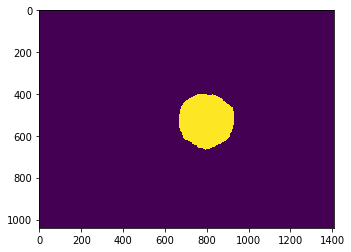

In [6]:
i = 2

img1 = cv2.imread(f_green[i],0).astype(np.uint8)
img2 = cv2.imread(f_red[i],0).astype(np.uint8)

gimg = np.zeros_like(img1)
rimg = np.zeros_like(img2)
    
    
gimg[np.logical_and(img1>0,img2>0)] = 150
rimg[np.logical_and(img1>0,img2>0)] = 150
gimg[np.logical_and(img1>0,img2==0)] = 1
rimg[np.logical_and(img1==0,img2>0)] = 1
plt.imshow(rimg)


In [17]:
#Process stats

f_green  = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksGRUAll'),"*tif")))
f_red    = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksRDUAll'),"*tif")))
#f_green = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksGRUCore'),"*tif")))
#f_red   = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksRDUCore'),"*tif")))


outfile = open(os.path.join(basepath,expname+'_ALL.csv'),"w+")
writethis = "Letter,Plate,Number,Day,Hour,Minute,GreenArea,RedArea,GreenMaxDist,RedMaxDist,GreenAvgDist,RedAvgDist,GreenFront,RedFront,GreenDif,RedDif\n"
outfile.write(writethis)

for i in range(len(f_green)):
    
    print(i)
    q = (os.path.join(f_green[i])).split('_')
    
    #Details of Well
    Letter = str(q[2][0])
    Number = str(q[2][1:])
    Plate  = str(q[1])
    Day    = str(q[4][0:2])
    Hour   = str(q[4][3:5])
    Minute = str(q[4][6:8])
    
    #Stats on All Masks
    gimg = cv2.imread(f_green[i],0).astype(np.uint8)
    rimg = cv2.imread(f_red[i],0).astype(np.uint8)
    
    gcent = CalcCent(gimg)
    g_maxDist,g_avgDist,g_area = DistanceCalc(gimg,gcent)
    [g_diffusion, g_front]=(FitTravel(gimg,gcent))
    
    rcent = CalcCent(rimg)
    r_maxDist,r_avgDist,r_area = DistanceCalc(rimg,rcent)
    [r_diffusion, r_front]=(FitTravel(rimg,rcent))
    
    writethis = Letter+","+Number+","+Plate+","+Day+","+Hour+","+Minute+","
    writethis = writethis + str(g_area)       +","+str(r_area)      +","
    writethis = writethis + str(g_maxDist)    +","+str(r_maxDist)   +","
    writethis = writethis + str(g_avgDist)    +","+str(r_avgDist)   +","
    writethis = writethis + str(g_front)      +","+str(r_front)     +","
    writethis = writethis + str(g_diffusion)  +","+str(r_diffusion) +"\n"
    
    outfile.write(writethis)
    outfile.flush()
    
outfile.close()

0
1
2
3
4
5
6
7
Error - curve_fit failed
8
Error - curve_fit failed
9
Error - curve_fit failed
10
Error - curve_fit failed
11
Error - curve_fit failed
12
Error - curve_fit failed
13
Error - curve_fit failed
14
Error - curve_fit failed
15
Error - curve_fit failed
16
Error - curve_fit failed
17
Error - curve_fit failed
18
Error - curve_fit failed
19
Error - curve_fit failed
20
Error - curve_fit failed
21


/home/adminhtari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
Error - curve_fit failed
43
Error - curve_fit failed
44
Error - curve_fit failed
45
Error - curve_fit failed
46
Error - curve_fit failed
47
Error - curve_fit failed
48
Error - curve_fit failed
49
Error - curve_fit failed
50
Error - curve_fit failed
51
Error - curve_fit failed
52
Error - curve_fit failed
53
Error - curve_fit failed
54
Error - curve_fit failed
55
Error - curve_fit failed
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
Error - curve_fit failed
78
Error - curve_fit failed
79
Error - curve_fit failed
80
Error - curve_fit failed
81
Error - curve_fit failed
82
Error - curve_fit failed
83
Error - curve_fit failed
84
Error - curve_fit failed
85
Error - curve_fit failed
86
Error - curve_fit failed
87
Error - curve_fit failed
88
Error - curve_fit failed
89
Error - curve_fit failed
90
Error - curve_fit failed
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
Error - curve_

539
Error - curve_fit failed
540
Error - curve_fit failed
541
Error - curve_fit failed
542
Error - curve_fit failed
543
Error - curve_fit failed
544
Error - curve_fit failed
545
Error - curve_fit failed
546
Error - curve_fit failed
Error - curve_fit failed
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
Error - curve_fit failed
568
Error - curve_fit failed
569
Error - curve_fit failed
570
Error - curve_fit failed
571
Error - curve_fit failed
572
Error - curve_fit failed
573
Error - curve_fit failed
574
Error - curve_fit failed
575
Error - curve_fit failed
576
Error - curve_fit failed
577
Error - curve_fit failed
578
Error - curve_fit failed
579
Error - curve_fit failed
580
Error - curve_fit failed
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
Error - curve_fit failed
603
Error - curve_fit failed
604
Error - curve_fit failed
605
Error - curve_fit failed
606
Error - curve_fit failed
607
Error - curve_fit failed

1058
Error - curve_fit failed
1059
Error - curve_fit failed
1060
Error - curve_fit failed
1061
Error - curve_fit failed
1062
Error - curve_fit failed
1063
Error - curve_fit failed
1064
Error - curve_fit failed
1065
Error - curve_fit failed
1066
Error - curve_fit failed
1067
Error - curve_fit failed
1068
Error - curve_fit failed
1069
Error - curve_fit failed
1070
Error - curve_fit failed
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
Error - curve_fit failed
1093
Error - curve_fit failed
1094
Error - curve_fit failed
1095
Error - curve_fit failed
1096
Error - curve_fit failed
1097
Error - curve_fit failed
1098
Error - curve_fit failed
1099
Error - curve_fit failed
1100
Error - curve_fit failed
1101
Error - curve_fit failed
1102
Error - curve_fit failed
1103
Error - curve_fit failed
1104
Error - curve_fit failed
1105
Error - curve_fit failed
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122


In [23]:
def func(x, a, c):
    return 1 / (1 + np.exp((x-c)/(2*a)))

def CalcCent(img):
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=4)
    sizes = stats[:, -1]
    
    if(len(sizes) == 1):
        return tuple([-1,-1])
    
    max_label = 1
    max_size = sizes[max_label]
    if(sizes.shape[0] > 2):
        for m in range(2,nb_components):
            if sizes[m] > max_size:
                max_label = m
                max_size = sizes[max_label]
    cent = tuple(centroids[max_label,:].astype(int))
    
    return cent
    
def DistanceCalc(img,cent):
    totaldist = 0
    maxdist = -1
    count = 0
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            if img[i,j] != 0:
                dist = np.sqrt((i-cent[1])**2 + (j-cent[0])**2)
                if dist > 600:
                    continue
                totaldist = dist+totaldist
                count = count+1
                if dist > maxdist:
                    maxdist = dist
    if count != 0:
        return maxdist, totaldist/count, np.sum(img)
    else:
        return np.nan,np.nan,np.nan
    

def FitTravel(img,cent,maxradius=500):
    polarimg = cv2.linearPolar(img,cent,1536,cv2.WARP_FILL_OUTLIERS)
    xdata = np.arange(0,500)
    ydata = np.zeros(len(xdata))
    for xx in range(0,len(xdata)):
        ydata[xx] = np.mean(polarimg[:,xx])
            
    try:
        popt, pcov = curve_fit(func, xdata, ydata)
            
    except RuntimeError:
        popt = np.zeros(2)
        popt[0] = np.nan
        popt[1] = np.nan
        print("Error - curve_fit failed")
        
    return(popt)
def PolarArea(img,cent,maxradius=500):
    polarimg = cv2.linearPolar(img,cent,1536,cv2.WARP_FILL_OUTLIERS)
    xdata = np.arange(0,500)
    ydata = np.zeros(len(xdata))
    for xx in range(0,len(xdata)):
        ydata[xx] = np.mean(polarimg[:,xx])
            
    return(np.sum(ydata))

def FindRadius(img,cent,maxradius=500):
    polarimg = cv2.linearPolar(img,cent,1536,cv2.WARP_FILL_OUTLIERS)
    xdata = np.arange(0,500)
    ydata = np.zeros(len(xdata))
    for xx in range(0,len(xdata)):
        ydata[xx] = np.mean(polarimg[:,xx])
        
    return(len(ydata[ydata>0.9]))

def Area_np(hul,img):
    my_img = np.zeros((img.shape[0], img.shape[1]), dtype = "uint8")
    pts = hul.reshape((-1,1,2))
    cv2.polylines(my_img,[pts],True,255)
    cv2.fillPoly(my_img,[pts],255)
    area = sum(my_img.reshape(img.shape[0]*img.shape[1])/255)
   
    return area
def HullArea(img):
    _,contours,_  = cv2.findContours(img,cv2.RETR_EXTERNAL,2)
    out = np.concatenate(contours)
    hullpoints = cv2.convexHull(out)
    p = np.squeeze(hullpoints)
    q = area_np(p,img)
    count = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] != 0:
                count = count+1
    return [q,count/q]

#Process stats

f_green  = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksGRUCore2'),"*tif")))
f_red    = sorted(glob.glob(os.path.join(os.path.join(basepath,'MasksRDU'),"*tif")))


outfile = open(os.path.join(basepath,expname+'_Core_FINALFINAL2.csv'),"w+")
writethis = "Filename,Letter,Plate,Number,Day,Hour,Minute,GreenArea,RedArea,GreenPolar,RedPolar,Radius\n"
outfile.write(writethis)

for i in range(len(f_green)):
    q = (os.path.join(f_green[i])).split('_')
    print(q)
    #Details of Well
    Letter = str(q[2][0])
    Number = str(q[2][1:])
    Plate  = str(q[1])
    Day    = str(q[4][0:2])
    Hour   = str(q[4][3:5])
    Minute = str(q[4][6:8])
    
    #Stats on All Masks
    img1 = cv2.imread(f_green[i],0).astype(np.uint8)
    img2 = cv2.imread(f_red[i],0).astype(np.uint8)
    
    gimg = np.zeros_like(img1)
    rimg = np.zeros_like(img2)
    qimg = np.zeros_like(img2)
    
    gimg[np.logical_and(img1>0,img2>0)] = 1
    rimg[np.logical_and(img1>0,img2>0)] = 1
    gimg[np.logical_and(img1>0,img2==0)] = 2
    rimg[np.logical_and(img1==0,img2>0)] = 2
    qimg[np.logical_or(img1>0,img2>0)] = 1
    
    cent = CalcCent(qimg)
    radius = PolarArea(qimg,cent)
    greenpolar = PolarArea(gimg,cent)
    print(i,greenpolar)
    redpolar = PolarArea(rimg,cent)
    

    writethis = os.path.basename(f_green[i])+","+str(Letter)+","+str(Plate)+","+str(Number)+","+Day+","+Hour+","+Minute+","
    writethis = writethis + str(np.sum(gimg)/2.0)+","+str(np.sum(rimg)/2.0) +","+str(greenpolar/2.0) +","+str(redpolar/2.0)+","
    writethis = writethis + str(radius)   +"\n"
    print(writethis)
    outfile.write(writethis)
    outfile.flush()
    
outfile.close()

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B10', '1', '00d00h00m.tif']
0 63.17788461538461
GRU_1_B10_1_00d00h00m.tif,B,1,10,00,00,00,12373.5,14753.5,31.588942307692307,53.917788461538464,85.50673076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B10', '1', '00d06h00m.tif']
1 86.7
GRU_1_B10_1_00d06h00m.tif,B,1,10,00,06,00,16567.5,14140.5,43.35,47.51538461538462,90.86538461538463

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B10', '1', '00d12h00m.tif']
2 77.31346153846154
GRU_1_B10_1_00d12h00m.tif,B,1,10,00,12,00,19004.5,16224.5,38.65673076923077,58.80192307692308,97.45865384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B10', '1', '00d18h00m.tif']
3 110.39711538461538
GRU_1_B10_1_00d18h00m.tif,B,1,10,00,18,00,23464.0,14741.0,55.19855769230769,46.19855769230769,101.39711538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B10', '1', '01d00h00m.tif']
4 117.90576923076924
GRU_1_B10_1_01d00h00m.tif,B,1,10,01,00,00,25403.0,15034.0,58.95288461538462,45

44 0.0
GRU_1_B11_1_04d18h35m.tif,B,1,11,04,18,35,0.0,62724.0,0.0,130.0,130.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B11', '1', '05d00h35m.tif']
45 0.0
GRU_1_B11_1_05d00h35m.tif,B,1,11,05,00,35,0.0,66796.0,0.0,134.14038461538462,134.14038461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B11', '1', '05d06h35m.tif']
46 0.0
GRU_1_B11_1_05d06h35m.tif,B,1,11,05,06,35,0.0,70573.0,0.0,137.8653846153846,137.8653846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B11', '1', '05d12h35m.tif']
47 0.0
GRU_1_B11_1_05d12h35m.tif,B,1,11,05,12,35,0.0,71309.0,0.0,138.58557692307693,138.58557692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B11', '1', '05d18h35m.tif']
48 0.0
GRU_1_B11_1_05d18h35m.tif,B,1,11,05,18,35,0.0,76949.0,0.0,143.93173076923077,143.93173076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B11', '1', '06d00h35m.tif']
49 0.0
GRU_1_B11_1_06d00h35m.tif,B,1,11,06,00,35,0.0,79684.0,0.0,146.45673076923077,146.45673076923077

['3d/210810-3D

92 404.0192307692308
GRU_1_B3_1_04d06h35m.tif,B,1,3,04,06,35,189504.0,5712.0,202.0096153846154,26.721153846153847,228.73076923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B3', '1', '04d12h35m.tif']
93 413.76730769230767
GRU_1_B3_1_04d12h35m.tif,B,1,3,04,12,35,197870.5,5784.5,206.88365384615383,26.7625,233.64615384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B3', '1', '04d18h35m.tif']
94 451.86057692307696
GRU_1_B3_1_04d18h35m.tif,B,1,3,04,18,35,230135.5,4724.5,225.93028846153848,24.315865384615385,250.24615384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B3', '1', '05d00h35m.tif']
95 464.17884615384617
GRU_1_B3_1_05d00h35m.tif,B,1,3,05,00,35,239741.5,4912.5,232.08942307692308,23.909615384615385,255.99903846153848

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B3', '1', '05d06h35m.tif']
96 477.45961538461535
GRU_1_B3_1_05d06h35m.tif,B,1,3,05,06,35,251971.5,5092.5,238.72980769230767,23.403846153846157,262.1336538461539

['3d/210810-3D-Adaptive/Ma

133 142.6173076923077
GRU_1_B5_1_02d00h00m.tif,B,1,5,02,00,00,35989.0,18468.0,71.30865384615385,49.72019230769231,121.02884615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B5', '1', '02d06h00m.tif']
134 145.79230769230767
GRU_1_B5_1_02d06h00m.tif,B,1,5,02,06,00,37512.0,19832.0,72.89615384615384,51.31153846153847,124.2076923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B5', '1', '02d12h00m.tif']
135 156.11826923076924
GRU_1_B5_1_02d12h00m.tif,B,1,5,02,12,00,42804.0,21199.0,78.05913461538462,53.12740384615384,131.18653846153845

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B5', '1', '02d18h00m.tif']
136 154.30096153846154
GRU_1_B5_1_02d18h00m.tif,B,1,5,02,18,00,42696.0,25602.0,77.15048076923077,58.35240384615385,135.50288461538463

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B5', '1', '03d00h35m.tif']
137 139.40192307692308
GRU_1_B5_1_03d00h35m.tif,B,1,5,03,00,35,36111.0,32651.0,69.70096153846154,66.28942307692309,135.9903846153846

['3d/210810-3D-Adapt

180 259.1596153846154
GRU_1_B7_1_01d06h00m.tif,B,1,7,01,06,00,62320.0,0.0,129.5798076923077,0.0,129.5798076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B7', '1', '01d12h00m.tif']
181 272.84423076923076
GRU_1_B7_1_01d12h00m.tif,B,1,7,01,12,00,69063.0,0.0,136.42211538461538,0.0,136.42211538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B7', '1', '01d18h00m.tif']
182 292.81538461538463
GRU_1_B7_1_01d18h00m.tif,B,1,7,01,18,00,79591.0,0.0,146.40769230769232,0.0,146.40769230769232

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B7', '1', '02d00h00m.tif']
183 306.4269230769231
GRU_1_B7_1_02d00h00m.tif,B,1,7,02,00,00,87212.0,0.0,153.21346153846156,0.0,153.21346153846156

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B7', '1', '02d06h00m.tif']
184 330.4326923076923
GRU_1_B7_1_02d06h00m.tif,B,1,7,02,06,00,101473.0,0.0,165.21634615384616,0.0,165.21634615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B7', '1', '02d12h00m.tif']
185 356.8
GRU_1_B7_1_02d12h00

GRU_1_B9_1_00d06h00m.tif,B,1,9,00,06,00,24876.5,6855.5,62.095192307692315,30.494230769230768,92.58942307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B9', '1', '00d12h00m.tif']
227 123.40288461538462
GRU_1_B9_1_00d12h00m.tif,B,1,9,00,12,00,25058.5,8194.5,61.70144230769231,33.075480769230765,94.77692307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B9', '1', '00d18h00m.tif']
228 141.675
GRU_1_B9_1_00d18h00m.tif,B,1,9,00,18,00,31555.5,7506.5,70.8375,31.85673076923077,102.69423076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B9', '1', '01d00h00m.tif']
229 142.3471153846154
GRU_1_B9_1_01d00h00m.tif,B,1,9,01,00,00,32660.5,9232.5,71.1735576923077,35.18125,106.35480769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B9', '1', '01d06h00m.tif']
230 151.8221153846154
GRU_1_B9_1_01d06h00m.tif,B,1,9,01,06,00,36617.0,9382.0,75.9110576923077,35.49278846153847,111.40384615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'B9', '1', '01d12h00m.tif']
2

268 232.76923076923077
GRU_1_C10_1_04d12h35m.tif,C,1,10,04,12,35,88616.5,26033.5,116.38461538461539,59.02211538461538,175.40673076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C10', '1', '04d18h35m.tif']
269 235.93173076923077
GRU_1_C10_1_04d18h35m.tif,C,1,10,04,18,35,91365.0,27579.0,117.96586538461538,60.58701923076923,178.5528846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C10', '1', '05d00h35m.tif']
270 240.87307692307695
GRU_1_C10_1_05d00h35m.tif,C,1,10,05,00,35,95347.5,29449.5,120.43653846153848,62.56923076923077,183.00576923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C10', '1', '05d06h35m.tif']
271 247.7798076923077
GRU_1_C10_1_05d06h35m.tif,C,1,10,05,06,35,99978.0,29638.0,123.88990384615386,62.662980769230764,186.5528846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C10', '1', '05d12h35m.tif']
272 252.9259615384615
GRU_1_C10_1_05d12h35m.tif,C,1,10,05,12,35,105244.5,32672.5,126.46298076923075,65.90336538461538,192.36634615384614



316 489.7942307692308
GRU_1_C2_1_04d00h35m.tif,C,1,2,04,00,35,223817.0,0.0,244.8971153846154,0.0,244.8971153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C2', '1', '04d06h35m.tif']
317 503.3519230769231
GRU_1_C2_1_04d06h35m.tif,C,1,2,04,06,35,236243.0,0.0,251.67596153846154,0.0,251.67596153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C2', '1', '04d12h35m.tif']
318 517.7365384615384
GRU_1_C2_1_04d12h35m.tif,C,1,2,04,12,35,249718.0,0.0,258.8682692307692,0.0,258.8682692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C2', '1', '04d18h35m.tif']
319 535.6423076923077
GRU_1_C2_1_04d18h35m.tif,C,1,2,04,18,35,267821.0,0.0,267.82115384615383,0.0,267.82115384615383

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C2', '1', '05d00h35m.tif']
320 551.6115384615384
GRU_1_C2_1_05d00h35m.tif,C,1,2,05,00,35,283967.0,0.0,275.8057692307692,0.0,275.8057692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C2', '1', '05d06h35m.tif']
321 558.3423076923077
GRU_1_C2_

358 171.85384615384615
GRU_1_C4_1_02d00h00m.tif,C,1,4,02,00,00,46346.0,10902.0,85.92692307692307,38.27884615384615,124.20576923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C4', '1', '02d06h00m.tif']
359 190.98749999999998
GRU_1_C4_1_02d06h00m.tif,C,1,4,02,06,00,55635.5,11228.5,95.49374999999999,38.700480769230765,134.19423076923078

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C4', '1', '02d12h00m.tif']
360 202.50384615384618
GRU_1_C4_1_02d12h00m.tif,C,1,4,02,12,00,61676.5,11782.5,101.25192307692309,39.39615384615385,140.64807692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C4', '1', '02d18h00m.tif']
361 204.9317307692308
GRU_1_C4_1_02d18h00m.tif,C,1,4,02,18,00,63970.5,12960.5,102.4658653846154,41.41201923076924,143.87788461538463

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C4', '1', '03d00h35m.tif']
362 199.47307692307695
GRU_1_C4_1_03d00h35m.tif,C,1,4,03,00,35,64394.5,18361.5,99.73653846153847,49.465384615384615,149.20192307692307

['3d/210810-3D-

399 367.5923076923077
GRU_1_C5_1_06d00h35m.tif,C,1,5,06,00,35,192750.5,26048.5,183.79615384615386,58.49230769230769,242.28846153846155

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C6', '1', '00d00h00m.tif']
400 0.0
GRU_1_C6_1_00d00h00m.tif,C,1,6,00,00,00,0.0,25321.0,0.0,82.65961538461539,82.65961538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C6', '1', '00d06h00m.tif']
401 0.0
GRU_1_C6_1_00d06h00m.tif,C,1,6,00,06,00,0.0,25276.0,0.0,82.65480769230768,82.65480769230768

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C6', '1', '00d12h00m.tif']
402 0.0
GRU_1_C6_1_00d12h00m.tif,C,1,6,00,12,00,0.0,27838.0,0.0,86.69326923076923,86.69326923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C6', '1', '00d18h00m.tif']
403 0.0
GRU_1_C6_1_00d18h00m.tif,C,1,6,00,18,00,0.0,28819.0,0.0,88.23846153846154,88.23846153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C6', '1', '01d00h00m.tif']
404 0.0
GRU_1_C6_1_01d00h00m.tif,C,1,6,01,00,00,0.0,30282.0,0.0,90.46923076

447 567.1057692307693
GRU_1_C7_1_05d12h35m.tif,C,1,7,05,12,35,301858.0,0.0,283.55288461538464,0.0,283.55288461538464

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C7', '1', '05d18h35m.tif']
448 578.2903846153846
GRU_1_C7_1_05d18h35m.tif,C,1,7,05,18,35,313514.0,0.0,289.1451923076923,0.0,289.1451923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C7', '1', '06d00h35m.tif']
449 609.4403846153846
GRU_1_C7_1_06d00h35m.tif,C,1,7,06,00,35,349490.0,0.0,304.7201923076923,0.0,304.7201923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C8', '1', '00d00h00m.tif']
450 115.85576923076923
GRU_1_C8_1_00d00h00m.tif,C,1,8,00,00,00,21786.5,7183.5,57.92788461538461,30.53076923076923,88.45865384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C8', '1', '00d06h00m.tif']
451 0.0
GRU_1_C8_1_00d06h00m.tif,C,1,8,00,06,00,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C8', '1', '00d12h00m.tif']
452 0.0
GRU_1_C8_1_00d12h00m.tif,C,1,8,00,12,00,0.0,0.0,0.0,0.0

489 276.18365384615385
GRU_1_C9_1_03d12h35m.tif,C,1,9,03,12,35,107425.5,12976.5,138.09182692307692,41.64375,179.7355769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C9', '1', '03d18h35m.tif']
490 284.0903846153846
GRU_1_C9_1_03d18h35m.tif,C,1,9,03,18,35,111520.0,11795.0,142.0451923076923,39.736538461538466,181.78173076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C9', '1', '04d00h35m.tif']
491 297.5519230769231
GRU_1_C9_1_04d00h35m.tif,C,1,9,04,00,35,122296.5,12979.5,148.77596153846156,41.67115384615385,190.4471153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C9', '1', '04d06h35m.tif']
492 301.75576923076926
GRU_1_C9_1_04d06h35m.tif,C,1,9,04,06,35,126061.5,13482.5,150.87788461538463,42.41153846153846,193.28942307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'C9', '1', '04d12h35m.tif']
493 308.58269230769235
GRU_1_C9_1_04d12h35m.tif,C,1,9,04,12,35,131787.0,13877.0,154.29134615384618,43.07884615384616,197.37019230769232

['3d/210810-3D-Adapt

530 0.0
GRU_1_D11_1_01d06h00m.tif,D,1,11,01,06,00,0.0,33847.0,0.0,95.60096153846155,95.60096153846155

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D11', '1', '01d12h00m.tif']
531 0.0
GRU_1_D11_1_01d12h00m.tif,D,1,11,01,12,00,0.0,34584.0,0.0,96.61826923076923,96.61826923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D11', '1', '01d18h00m.tif']
532 0.0
GRU_1_D11_1_01d18h00m.tif,D,1,11,01,18,00,0.0,35830.0,0.0,98.32403846153846,98.32403846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D11', '1', '02d00h00m.tif']
533 0.0
GRU_1_D11_1_02d00h00m.tif,D,1,11,02,00,00,0.0,38648.0,0.0,102.12307692307692,102.12307692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D11', '1', '02d06h00m.tif']
534 0.0
GRU_1_D11_1_02d06h00m.tif,D,1,11,02,06,00,0.0,40162.0,0.0,104.12403846153848,104.12403846153848

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D11', '1', '02d12h00m.tif']
535 0.0
GRU_1_D11_1_02d12h00m.tif,D,1,11,02,12,00,0.0,43390.0,0.0,108.20576923076923,108.20

576 138.03942307692307
GRU_1_D3_1_00d06h00m.tif,D,1,3,00,06,00,27287.0,3901.0,69.01971153846154,22.796634615384615,91.81634615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D3', '1', '00d12h00m.tif']
577 153.12211538461537
GRU_1_D3_1_00d12h00m.tif,D,1,3,00,12,00,33449.5,4511.5,76.56105769230768,24.674519230769228,101.23557692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D3', '1', '00d18h00m.tif']
578 167.90865384615384
GRU_1_D3_1_00d18h00m.tif,D,1,3,00,18,00,38886.5,4462.5,83.95432692307692,24.20432692307692,108.15865384615384

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D3', '1', '01d00h00m.tif']
579 173.78846153846155
GRU_1_D3_1_01d00h00m.tif,D,1,3,01,00,00,41849.0,4925.0,86.89423076923077,25.4375,112.33173076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D3', '1', '01d06h00m.tif']
580 188.8009615384615
GRU_1_D3_1_01d06h00m.tif,D,1,3,01,06,00,48354.5,4706.5,94.40048076923075,25.208173076923078,119.60865384615384

['3d/210810-3D-Adaptive/MasksGR

GRU_1_D4_1_04d00h35m.tif,D,1,4,04,00,35,151876.5,13400.5,168.25625000000002,42.331250000000004,210.5875

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D4', '1', '04d06h35m.tif']
617 348.5182692307692
GRU_1_D4_1_04d06h35m.tif,D,1,4,04,06,35,160502.5,13216.5,174.2591346153846,41.65721153846153,215.91634615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D4', '1', '04d12h35m.tif']
618 370.9567307692308
GRU_1_D4_1_04d12h35m.tif,D,1,4,04,12,35,179884.0,13620.0,185.4783653846154,42.278365384615384,227.75673076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D4', '1', '04d18h35m.tif']
619 401.5230769230769
GRU_1_D4_1_04d18h35m.tif,D,1,4,04,18,35,209478.0,14425.0,200.76153846153846,43.40096153846154,244.16249999999997

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D4', '1', '05d00h35m.tif']
620 406.8221153846154
GRU_1_D4_1_05d00h35m.tif,D,1,4,05,00,35,212651.5,13938.5,203.4110576923077,42.974519230769225,246.3855769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '

657 0.0
GRU_1_D6_1_01d18h00m.tif,D,1,6,01,18,00,0.0,37336.0,0.0,100.38173076923076,100.38173076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D6', '1', '02d00h00m.tif']
658 0.0
GRU_1_D6_1_02d00h00m.tif,D,1,6,02,00,00,0.0,40324.0,0.0,104.32596153846154,104.32596153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D6', '1', '02d06h00m.tif']
659 0.0
GRU_1_D6_1_02d06h00m.tif,D,1,6,02,06,00,0.0,42317.0,0.0,106.87115384615385,106.87115384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D6', '1', '02d12h00m.tif']
660 0.0
GRU_1_D6_1_02d12h00m.tif,D,1,6,02,12,00,0.0,45157.0,0.0,110.37403846153846,110.37403846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D6', '1', '02d18h00m.tif']
661 0.0
GRU_1_D6_1_02d18h00m.tif,D,1,6,02,18,00,0.0,48358.0,0.0,114.23076923076924,114.23076923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D6', '1', '03d00h35m.tif']
662 0.0
GRU_1_D6_1_03d00h35m.tif,D,1,6,03,00,35,0.0,53979.0,0.0,120.6201923076923,120.6201923076923


704 158.25384615384615
GRU_1_D8_1_01d00h00m.tif,D,1,8,01,00,00,37089.0,6208.0,79.12692307692308,28.931730769230768,108.05865384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D8', '1', '01d06h00m.tif']
705 176.58173076923077
GRU_1_D8_1_01d06h00m.tif,D,1,8,01,06,00,44079.5,5679.5,88.29086538461539,27.569711538461537,115.86057692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D8', '1', '01d12h00m.tif']
706 197.06346153846155
GRU_1_D8_1_01d12h00m.tif,D,1,8,01,12,00,54365.0,6556.0,98.53173076923078,29.58076923076923,128.1125

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D8', '1', '01d18h00m.tif']
707 212.52980769230768
GRU_1_D8_1_01d18h00m.tif,D,1,8,01,18,00,60246.5,5502.5,106.26490384615384,26.79855769230769,133.06346153846152

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D8', '1', '02d00h00m.tif']
708 215.7221153846154
GRU_1_D8_1_02d00h00m.tif,D,1,8,02,00,00,63642.5,6486.5,107.8610576923077,29.540865384615387,137.40192307692308

['3d/210810-3D-Adaptive/Masks

GRU_1_D9_1_05d00h35m.tif,D,1,9,05,00,35,145299.0,15736.0,161.39903846153848,45.4576923076923,206.85673076923075

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D9', '1', '05d06h35m.tif']
746 354.91923076923075
GRU_1_D9_1_05d06h35m.tif,D,1,9,05,06,35,169837.0,15654.0,177.45961538461538,44.72019230769231,222.1798076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D9', '1', '05d12h35m.tif']
747 364.01250000000005
GRU_1_D9_1_05d12h35m.tif,D,1,9,05,12,35,178835.5,16178.5,182.00625000000002,45.82740384615385,227.83365384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D9', '1', '05d18h35m.tif']
748 437.5153846153846
GRU_1_D9_1_05d18h35m.tif,D,1,9,05,18,35,259695.5,16223.5,218.7576923076923,45.81153846153846,264.5692307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'D9', '1', '06d00h35m.tif']
749 424.0961538461538
GRU_1_D9_1_06d00h35m.tif,D,1,9,06,00,35,234244.5,15844.5,212.0480769230769,45.13557692307692,257.18365384615385

['3d/210810-3D-Adaptive/MasksGRUCore2

789 0.0
GRU_1_E11_1_03d12h35m.tif,E,1,11,03,12,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E11', '1', '03d18h35m.tif']
790 0.0
GRU_1_E11_1_03d18h35m.tif,E,1,11,03,18,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E11', '1', '04d00h35m.tif']
791 0.0
GRU_1_E11_1_04d00h35m.tif,E,1,11,04,00,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E11', '1', '04d06h35m.tif']
792 0.0
GRU_1_E11_1_04d06h35m.tif,E,1,11,04,06,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E11', '1', '04d12h35m.tif']
793 0.0
GRU_1_E11_1_04d12h35m.tif,E,1,11,04,12,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E11', '1', '04d18h35m.tif']
794 0.0
GRU_1_E11_1_04d18h35m.tif,E,1,11,04,18,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E11', '1', '05d00h35m.tif']
795 0.0
GRU_1_E11_1_05d00h35m.tif,E,1,11,05,00,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCor

836 276.2451923076923
GRU_1_E3_1_02d18h00m.tif,E,1,3,02,18,00,94877.5,5040.5,138.12259615384616,25.81875,163.94134615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E3', '1', '03d00h35m.tif']
837 264.03173076923076
GRU_1_E3_1_03d00h35m.tif,E,1,3,03,00,35,93606.0,8911.0,132.01586538461538,34.02067307692308,166.03653846153847

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E3', '1', '03d06h35m.tif']
838 314.63846153846157
GRU_1_E3_1_03d06h35m.tif,E,1,3,03,06,35,113089.5,4142.5,157.31923076923078,20.128846153846155,177.44807692307694

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E3', '1', '03d12h35m.tif']
839 321.0778846153846
GRU_1_E3_1_03d12h35m.tif,E,1,3,03,12,35,122013.5,4234.5,160.5389423076923,23.587980769230768,184.12692307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E3', '1', '03d18h35m.tif']
840 333.09230769230766
GRU_1_E3_1_03d18h35m.tif,E,1,3,03,18,35,131842.0,5420.0,166.54615384615383,25.364423076923075,191.91057692307692

['3d/210810-3D-Adaptive

883 150.30576923076922
GRU_1_E5_1_02d00h00m.tif,E,1,5,02,00,00,39107.5,16794.5,75.15288461538461,47.50961538461539,122.6625

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E5', '1', '02d06h00m.tif']
884 155.34519230769232
GRU_1_E5_1_02d06h00m.tif,E,1,5,02,06,00,41865.5,18354.5,77.67259615384616,49.70048076923077,127.37307692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E5', '1', '02d12h00m.tif']
885 157.6644230769231
GRU_1_E5_1_02d12h00m.tif,E,1,5,02,12,00,43354.0,20196.0,78.83221153846155,52.00913461538461,130.84134615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E5', '1', '02d18h00m.tif']
886 169.33557692307693
GRU_1_E5_1_02d18h00m.tif,E,1,5,02,18,00,49763.0,22464.0,84.66778846153846,54.78605769230769,139.45384615384614

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E5', '1', '03d00h35m.tif']
887 159.25961538461536
GRU_1_E5_1_03d00h35m.tif,E,1,5,03,00,35,45597.5,27387.5,79.62980769230768,60.5125,140.1423076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/G

931 244.96730769230768
GRU_1_E7_1_01d12h00m.tif,E,1,7,01,12,00,55646.0,0.0,122.48365384615384,0.0,122.48365384615384

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E7', '1', '01d18h00m.tif']
932 267.53846153846155
GRU_1_E7_1_01d18h00m.tif,E,1,7,01,18,00,66416.0,0.0,133.76923076923077,0.0,133.76923076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E7', '1', '02d00h00m.tif']
933 279.56538461538463
GRU_1_E7_1_02d00h00m.tif,E,1,7,02,00,00,72557.0,0.0,139.78269230769232,0.0,139.78269230769232

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E7', '1', '02d06h00m.tif']
934 293.2923076923077
GRU_1_E7_1_02d06h00m.tif,E,1,7,02,06,00,79886.0,0.0,146.64615384615385,0.0,146.64615384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E7', '1', '02d12h00m.tif']
935 308.50961538461536
GRU_1_E7_1_02d12h00m.tif,E,1,7,02,12,00,88466.0,0.0,154.25480769230768,0.0,154.25480769230768

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E7', '1', '02d18h00m.tif']
936 320.9576923076923
GRU_

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E8', '1', '05d18h35m.tif']
973 421.8923076923077
GRU_1_E8_1_05d18h35m.tif,E,1,8,05,18,35,209085.5,9358.5,210.94615384615386,30.466346153846153,241.4125

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E8', '1', '06d00h35m.tif']
974 439.53269230769234
GRU_1_E8_1_06d00h35m.tif,E,1,8,06,00,35,227985.5,9553.5,219.76634615384617,32.0,251.76634615384617

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E9', '1', '00d00h00m.tif']
975 100.28173076923076
GRU_1_E9_1_00d00h00m.tif,E,1,9,00,00,00,17233.5,7839.5,50.14086538461538,32.07740384615384,82.21826923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E9', '1', '00d06h00m.tif']
976 119.06153846153846
GRU_1_E9_1_00d06h00m.tif,E,1,9,00,06,00,22987.5,6714.5,59.53076923076923,29.96826923076923,89.49903846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'E9', '1', '00d12h00m.tif']
977 119.21153846153845
GRU_1_E9_1_00d12h00m.tif,E,1,9,00,12,00,23355.0,7352.0,59.605769230769226,31.

1014 184.58846153846156
GRU_1_F10_1_03d12h35m.tif,F,1,10,03,12,35,55406.0,19429.0,92.29423076923078,49.46923076923077,141.76346153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F10', '1', '03d18h35m.tif']
1015 188.92307692307696
GRU_1_F10_1_03d18h35m.tif,F,1,10,03,18,35,58550.5,20691.5,94.46153846153848,51.48942307692308,145.95096153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F10', '1', '04d00h35m.tif']
1016 208.17596153846154
GRU_1_F10_1_04d00h35m.tif,F,1,10,04,00,35,69722.0,21440.0,104.08798076923077,52.41875,156.50673076923078

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F10', '1', '04d06h35m.tif']
1017 213.82115384615386
GRU_1_F10_1_04d06h35m.tif,F,1,10,04,06,35,73320.0,22489.0,106.91057692307693,53.410576923076924,160.32115384615383

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F10', '1', '04d12h35m.tif']
1018 210.91442307692307
GRU_1_F10_1_04d12h35m.tif,F,1,10,04,12,35,73070.0,25668.0,105.45721153846154,57.47836538461539,162.93557692307692

['3

1062 384.49423076923074
GRU_1_F2_1_03d00h35m.tif,F,1,2,03,00,35,137635.0,0.0,192.24711538461537,0.0,192.24711538461537

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F2', '1', '03d06h35m.tif']
1063 441.05
GRU_1_F2_1_03d06h35m.tif,F,1,2,03,06,35,181652.0,0.0,220.525,0.0,220.525

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F2', '1', '03d12h35m.tif']
1064 500.66153846153844
GRU_1_F2_1_03d12h35m.tif,F,1,2,03,12,35,236768.0,0.0,250.33076923076922,0.0,250.33076923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F2', '1', '03d18h35m.tif']
1065 545.0134615384616
GRU_1_F2_1_03d18h35m.tif,F,1,2,03,18,35,283894.0,0.0,272.5067307692308,0.0,272.5067307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F2', '1', '04d00h35m.tif']
1066 616.4961538461539
GRU_1_F2_1_04d00h35m.tif,F,1,2,04,00,35,362781.0,0.0,308.24807692307695,0.0,308.24807692307695

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F2', '1', '04d06h35m.tif']
1067 589.6076923076923
GRU_1_F2_1_04d06h35m.tif,F,1,2

1104 147.66346153846155
GRU_1_F4_1_01d00h00m.tif,F,1,4,01,00,00,35149.5,9904.5,73.83173076923077,36.378846153846155,110.21057692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F4', '1', '01d06h00m.tif']
1105 159.54615384615383
GRU_1_F4_1_01d06h00m.tif,F,1,4,01,06,00,40382.5,10394.5,79.77307692307691,37.214423076923076,116.9875

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F4', '1', '01d12h00m.tif']
1106 163.19615384615386
GRU_1_F4_1_01d12h00m.tif,F,1,4,01,12,00,42849.0,11901.0,81.59807692307693,39.888461538461534,121.48653846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F4', '1', '01d18h00m.tif']
1107 178.08846153846156
GRU_1_F4_1_01d18h00m.tif,F,1,4,01,18,00,49601.0,11717.0,89.04423076923078,39.49038461538461,128.5346153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F4', '1', '02d00h00m.tif']
1108 185.80961538461537
GRU_1_F4_1_02d00h00m.tif,F,1,4,02,00,00,54106.0,13015.0,92.90480769230768,41.46057692307693,134.3653846153846

['3d/210810-3D-Adaptiv

1145 160.7326923076923
GRU_1_F5_1_05d00h35m.tif,F,1,5,05,00,35,48085.5,42832.5,80.36634615384615,75.94519230769231,156.31153846153848

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F5', '1', '05d06h35m.tif']
1146 152.68076923076922
GRU_1_F5_1_05d06h35m.tif,F,1,5,05,06,35,43435.0,46123.0,76.34038461538461,78.88846153846154,155.22884615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F5', '1', '05d12h35m.tif']
1147 152.25384615384615
GRU_1_F5_1_05d12h35m.tif,F,1,5,05,12,35,43129.5,48922.5,76.12692307692308,81.2375,157.36442307692306

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F5', '1', '05d18h35m.tif']
1148 147.98173076923078
GRU_1_F5_1_05d18h35m.tif,F,1,5,05,18,35,40707.0,55468.0,73.99086538461539,86.87740384615384,160.86826923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F5', '1', '06d00h35m.tif']
1149 137.17307692307693
GRU_1_F5_1_06d00h35m.tif,F,1,5,06,00,35,35112.0,67429.0,68.58653846153847,97.50769230769231,166.09423076923076

['3d/210810-3D-Adaptive

1193 486.7346153846154
GRU_1_F7_1_04d12h35m.tif,F,1,7,04,12,35,224042.0,0.0,243.3673076923077,0.0,243.3673076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F7', '1', '04d18h35m.tif']
1194 512.9615384615385
GRU_1_F7_1_04d18h35m.tif,F,1,7,04,18,35,248679.0,0.0,256.4807692307692,0.0,256.4807692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F7', '1', '05d00h35m.tif']
1195 522.975
GRU_1_F7_1_05d00h35m.tif,F,1,7,05,00,35,257674.0,0.0,261.4875,0.0,261.4875

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F7', '1', '05d06h35m.tif']
1196 531.7038461538461
GRU_1_F7_1_05d06h35m.tif,F,1,7,05,06,35,267938.0,0.0,265.8519230769231,0.0,265.8519230769231

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F7', '1', '05d12h35m.tif']
1197 569.8980769230769
GRU_1_F7_1_05d12h35m.tif,F,1,7,05,12,35,307039.0,0.0,284.94903846153846,0.0,284.94903846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F7', '1', '05d18h35m.tif']
1198 588.6557692307692
GRU_1_F7_1_05d18h35m.tif,F,1,7,05

1235 181.11442307692306
GRU_1_F9_1_02d12h00m.tif,F,1,9,02,12,00,50515.0,11171.0,90.55721153846153,38.19471153846153,128.75192307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F9', '1', '02d18h00m.tif']
1236 188.475
GRU_1_F9_1_02d18h00m.tif,F,1,9,02,18,00,54583.0,11628.0,94.2375,39.04615384615384,133.28365384615384

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F9', '1', '03d00h35m.tif']
1237 187.73076923076923
GRU_1_F9_1_03d00h35m.tif,F,1,9,03,00,35,55473.5,13862.5,93.86538461538461,42.532692307692315,136.39807692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F9', '1', '03d06h35m.tif']
1238 223.225
GRU_1_F9_1_03d06h35m.tif,F,1,9,03,06,35,72186.5,11655.5,111.6125,38.37307692307692,149.9855769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F9', '1', '03d12h35m.tif']
1239 246.22211538461536
GRU_1_F9_1_03d12h35m.tif,F,1,9,03,12,35,85405.0,12164.0,123.11105769230768,38.74278846153846,161.85384615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'F9

1282 0.0
GRU_1_G11_1_01d18h00m.tif,G,1,11,01,18,00,0.0,32070.0,0.0,93.05961538461538,93.05961538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G11', '1', '02d00h00m.tif']
1283 0.0
GRU_1_G11_1_02d00h00m.tif,G,1,11,02,00,00,0.0,34041.0,0.0,95.88461538461539,95.88461538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G11', '1', '02d06h00m.tif']
1284 0.0
GRU_1_G11_1_02d06h00m.tif,G,1,11,02,06,00,0.0,33686.0,0.0,95.39134615384616,95.39134615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G11', '1', '02d12h00m.tif']
1285 0.0
GRU_1_G11_1_02d12h00m.tif,G,1,11,02,12,00,0.0,35443.0,0.0,97.83557692307693,97.83557692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G11', '1', '02d18h00m.tif']
1286 0.0
GRU_1_G11_1_02d18h00m.tif,G,1,11,02,18,00,0.0,37253.0,0.0,100.28365384615384,100.28365384615384

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G11', '1', '03d00h35m.tif']
1287 0.0
GRU_1_G11_1_03d00h35m.tif,G,1,11,03,00,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-A

1330 185.43653846153845
GRU_1_G3_1_01d06h00m.tif,G,1,3,01,06,00,47495.5,5211.5,92.71826923076922,26.48269230769231,119.20096153846153

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G3', '1', '01d12h00m.tif']
1331 195.67596153846154
GRU_1_G3_1_01d12h00m.tif,G,1,3,01,12,00,52501.5,5571.5,97.83798076923077,27.263942307692307,125.10192307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G3', '1', '01d18h00m.tif']
1332 209.8451923076923
GRU_1_G3_1_01d18h00m.tif,G,1,3,01,18,00,58526.5,5105.5,104.92259615384614,26.014903846153846,130.9375

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G3', '1', '02d00h00m.tif']
1333 231.8576923076923
GRU_1_G3_1_02d00h00m.tif,G,1,3,02,00,00,69728.0,5091.0,115.92884615384615,25.998076923076926,141.92692307692306

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G3', '1', '02d06h00m.tif']
1334 247.71634615384616
GRU_1_G3_1_02d06h00m.tif,G,1,3,02,06,00,78829.5,5757.5,123.85817307692308,26.951442307692307,150.80961538461537

['3d/210810-3D-Adaptiv

GRU_1_G4_1_05d06h35m.tif,G,1,4,05,06,35,77080.5,30005.5,108.44951923076924,60.90913461538461,169.35865384615386

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G4', '1', '05d12h35m.tif']
1372 244.64903846153845
GRU_1_G4_1_05d12h35m.tif,G,1,4,05,12,35,93484.5,32055.5,122.32451923076923,61.21875,183.54326923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G4', '1', '05d18h35m.tif']
1373 226.72980769230767
GRU_1_G4_1_05d18h35m.tif,G,1,4,05,18,35,87149.0,39912.0,113.36490384615384,71.19951923076924,184.56442307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G4', '1', '06d00h35m.tif']
1374 262.32403846153846
GRU_1_G4_1_06d00h35m.tif,G,1,4,06,00,35,109597.0,40780.0,131.16201923076923,69.71009615384615,200.8721153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G5', '1', '00d00h00m.tif']
1375 104.82307692307691
GRU_1_G5_1_00d00h00m.tif,G,1,5,00,00,00,19916.0,12945.0,52.411538461538456,41.71442307692308,94.12596153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU

1412 0.0
GRU_1_G6_1_03d00h35m.tif,G,1,6,03,00,35,0.0,53611.0,0.0,120.22788461538461,120.22788461538461

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G6', '1', '03d06h35m.tif']
1413 0.0
GRU_1_G6_1_03d06h35m.tif,G,1,6,03,06,35,0.0,52442.0,0.0,118.91634615384616,118.91634615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G6', '1', '03d12h35m.tif']
1414 0.0
GRU_1_G6_1_03d12h35m.tif,G,1,6,03,12,35,0.0,53966.0,0.0,120.60769230769232,120.60769230769232

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G6', '1', '03d18h35m.tif']
1415 0.0
GRU_1_G6_1_03d18h35m.tif,G,1,6,03,18,35,0.0,55403.0,0.0,122.20384615384614,122.20384615384614

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G6', '1', '04d00h35m.tif']
1416 0.0
GRU_1_G6_1_04d00h35m.tif,G,1,6,04,00,35,0.0,57706.0,0.0,124.72403846153846,124.72403846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G6', '1', '04d06h35m.tif']
1417 0.0
GRU_1_G6_1_04d06h35m.tif,G,1,6,04,06,35,0.0,61428.0,0.0,128.67884615384617,128.6788461

1460 211.39711538461538
GRU_1_G8_1_02d12h00m.tif,G,1,8,02,12,00,61783.0,7008.0,105.69855769230769,30.415865384615387,136.11442307692306

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G8', '1', '02d18h00m.tif']
1461 216.87115384615385
GRU_1_G8_1_02d18h00m.tif,G,1,8,02,18,00,65583.5,8189.5,108.43557692307692,32.47788461538462,140.91346153846155

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G8', '1', '03d00h35m.tif']
1462 217.15
GRU_1_G8_1_03d00h35m.tif,G,1,8,03,00,35,66764.5,10604.5,108.575,35.64134615384616,144.21634615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G8', '1', '03d06h35m.tif']
1463 257.44615384615383
GRU_1_G8_1_03d06h35m.tif,G,1,8,03,06,35,85679.5,7656.5,128.72307692307692,29.585576923076925,158.30865384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '1', 'G8', '1', '03d12h35m.tif']
1464 272.61634615384617
GRU_1_G8_1_03d12h35m.tif,G,1,8,03,12,35,96212.5,8139.5,136.30817307692308,30.832211538461536,167.14038461538462

['3d/210810-3D-Adaptive/MasksGR

1501 70.08653846153845
GRU_2_B10_1_00d06h00m.tif,B,2,10,00,06,00,16096.5,14186.5,35.043269230769226,55.36057692307693,90.40384615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B10', '1', '00d12h00m.tif']
1502 99.6625
GRU_2_B10_1_00d12h00m.tif,B,2,10,00,12,00,18386.5,13702.5,49.83125,43.16298076923077,92.99423076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B10', '1', '00d18h00m.tif']
1503 100.20384615384616
GRU_2_B10_1_00d18h00m.tif,B,2,10,00,18,00,19700.0,14811.0,50.10192307692308,46.35673076923077,96.45865384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B10', '1', '01d00h00m.tif']
1504 112.79423076923078
GRU_2_B10_1_01d00h00m.tif,B,2,10,01,00,00,23448.5,14584.5,56.39711538461539,44.76826923076923,101.16538461538461

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B10', '1', '01d06h00m.tif']
1505 115.91923076923078
GRU_2_B10_1_01d06h00m.tif,B,2,10,01,06,00,24541.0,15447.0,57.95961538461539,45.78653846153846,103.74615384615385

['3d/210810-3D-Adapti

1542 0.0
GRU_2_B11_1_04d06h35m.tif,B,2,11,04,06,35,0.0,45686.0,0.0,110.99807692307692,110.99807692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B11', '1', '04d12h35m.tif']
1543 0.0
GRU_2_B11_1_04d12h35m.tif,B,2,11,04,12,35,0.0,46746.0,0.0,112.26538461538462,112.26538461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B11', '1', '04d18h35m.tif']
1544 0.0
GRU_2_B11_1_04d18h35m.tif,B,2,11,04,18,35,0.0,49452.0,0.0,115.43942307692308,115.43942307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B11', '1', '05d00h35m.tif']
1545 0.0
GRU_2_B11_1_05d00h35m.tif,B,2,11,05,00,35,0.0,49832.0,0.0,115.86057692307693,115.86057692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B11', '1', '05d06h35m.tif']
1546 0.0
GRU_2_B11_1_05d06h35m.tif,B,2,11,05,06,35,0.0,51555.0,0.0,117.91634615384615,117.91634615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B11', '1', '05d12h35m.tif']
1547 0.0
GRU_2_B11_1_05d12h35m.tif,B,2,11,05,12,35,0.0,53153.0,0.0,119.714423076

1590 286.1192307692308
GRU_2_B3_1_03d18h35m.tif,B,2,3,03,18,35,101566.0,8901.0,143.0596153846154,28.917307692307688,171.97692307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B3', '1', '04d00h35m.tif']
1591 321.7971153846154
GRU_2_B3_1_04d00h35m.tif,B,2,3,04,00,35,124636.0,8484.0,160.8985576923077,27.732211538461538,188.63076923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B3', '1', '04d06h35m.tif']
1592 325.8384615384615
GRU_2_B3_1_04d06h35m.tif,B,2,3,04,06,35,126278.5,8582.5,162.91923076923075,27.003846153846155,189.9230769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B3', '1', '04d12h35m.tif']
1593 336.7278846153846
GRU_2_B3_1_04d12h35m.tif,B,2,3,04,12,35,135543.0,8433.0,168.3639423076923,27.791826923076922,196.15576923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B3', '1', '04d18h35m.tif']
1594 345.2836538461538
GRU_2_B3_1_04d18h35m.tif,B,2,3,04,18,35,145789.0,8917.0,172.6418269230769,30.667788461538457,203.30961538461537

['3d/210810-

1632 117.92403846153846
GRU_2_B5_1_01d18h00m.tif,B,2,5,01,18,00,25175.0,16560.0,58.96201923076923,47.11874999999999,106.08076923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B5', '1', '02d00h00m.tif']
1633 124.45096153846154
GRU_2_B5_1_02d00h00m.tif,B,2,5,02,00,00,27740.5,17126.5,62.22548076923077,47.784134615384616,110.00961538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B5', '1', '02d06h00m.tif']
1634 139.03173076923076
GRU_2_B5_1_02d06h00m.tif,B,2,5,02,06,00,33732.0,15828.0,69.51586538461538,46.00240384615385,115.51826923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B5', '1', '02d12h00m.tif']
1635 138.35865384615386
GRU_2_B5_1_02d12h00m.tif,B,2,5,02,12,00,33771.0,17271.0,69.17932692307693,47.99471153846154,117.17403846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B5', '1', '02d18h00m.tif']
1636 152.65769230769232
GRU_2_B5_1_02d18h00m.tif,B,2,5,02,18,00,40271.0,17563.0,76.32884615384616,48.37499999999999,124.70384615384616

['3d/210810

1680 222.7403846153846
GRU_2_B7_1_01d06h00m.tif,B,2,7,01,06,00,45977.0,0.0,111.3701923076923,0.0,111.3701923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B7', '1', '01d12h00m.tif']
1681 235.92884615384617
GRU_2_B7_1_01d12h00m.tif,B,2,7,01,12,00,51614.0,0.0,117.96442307692308,0.0,117.96442307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B7', '1', '01d18h00m.tif']
1682 244.72307692307692
GRU_2_B7_1_01d18h00m.tif,B,2,7,01,18,00,55592.0,0.0,122.36153846153846,0.0,122.36153846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B7', '1', '02d00h00m.tif']
1683 257.8057692307692
GRU_2_B7_1_02d00h00m.tif,B,2,7,02,00,00,61732.0,0.0,128.9028846153846,0.0,128.9028846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B7', '1', '02d06h00m.tif']
1684 273.575
GRU_2_B7_1_02d06h00m.tif,B,2,7,02,06,00,69493.0,0.0,136.7875,0.0,136.7875

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B7', '1', '02d12h00m.tif']
1685 280.74423076923074
GRU_2_B7_1_02d12h00m.tif,B,2,7,02

1728 115.33942307692308
GRU_2_B9_1_00d18h00m.tif,B,2,9,00,18,00,22347.5,8999.5,57.66971153846154,34.278365384615384,91.94807692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B9', '1', '01d00h00m.tif']
1729 128.0105769230769
GRU_2_B9_1_01d00h00m.tif,B,2,9,01,00,00,26833.5,9266.5,64.00528846153846,34.691826923076924,98.69711538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B9', '1', '01d06h00m.tif']
1730 136.99807692307695
GRU_2_B9_1_01d06h00m.tif,B,2,9,01,06,00,29951.5,8809.5,68.49903846153848,33.69326923076923,102.19230769230771

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B9', '1', '01d12h00m.tif']
1731 146.06634615384615
GRU_2_B9_1_01d12h00m.tif,B,2,9,01,12,00,33955.5,9356.5,73.03317307692308,34.86009615384616,107.89326923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'B9', '1', '01d18h00m.tif']
1732 160.38076923076923
GRU_2_B9_1_01d18h00m.tif,B,2,9,01,18,00,40087.5,9764.5,80.19038461538462,35.512499999999996,115.7028846153846

['3d/210810-3D-Ada

1770 0.0
GRU_2_C10_1_05d00h35m.tif,C,2,10,05,00,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C10', '1', '05d06h35m.tif']
1771 0.0
GRU_2_C10_1_05d06h35m.tif,C,2,10,05,06,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C10', '1', '05d12h35m.tif']
1772 0.0
GRU_2_C10_1_05d12h35m.tif,C,2,10,05,12,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C10', '1', '05d18h35m.tif']
1773 0.0
GRU_2_C10_1_05d18h35m.tif,C,2,10,05,18,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C10', '1', '06d00h35m.tif']
1774 0.0
GRU_2_C10_1_06d00h35m.tif,C,2,10,06,00,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C11', '1', '00d00h00m.tif']
1775 0.0
GRU_2_C11_1_00d00h00m.tif,C,2,11,00,00,00,0.0,24896.0,0.0,82.07500000000002,82.07500000000002

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C11', '1', '00d06h00m.tif']
1776 0.0
GRU_2_C11_1_00d06h00m.tif,C,2,11,00,06,00,0.0,26643.0,0.0,8

1817 404.26153846153846
GRU_2_C2_1_04d06h35m.tif,C,2,2,04,06,35,152711.0,0.0,202.13076923076923,0.0,202.13076923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C2', '1', '04d12h35m.tif']
1818 450.2576923076923
GRU_2_C2_1_04d12h35m.tif,C,2,2,04,12,35,194083.0,0.0,225.12884615384615,0.0,225.12884615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C2', '1', '04d18h35m.tif']
1819 473.91730769230765
GRU_2_C2_1_04d18h35m.tif,C,2,2,04,18,35,213658.0,0.0,236.95865384615382,0.0,236.95865384615382

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C2', '1', '05d00h35m.tif']
1820 477.51346153846157
GRU_2_C2_1_05d00h35m.tif,C,2,2,05,00,35,215990.0,0.0,238.75673076923078,0.0,238.75673076923078

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C2', '1', '05d06h35m.tif']
1821 501.51346153846157
GRU_2_C2_1_05d06h35m.tif,C,2,2,05,06,35,239231.0,0.0,250.75673076923078,0.0,250.75673076923078

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C2', '1', '05d12h35m.tif']
1822 497.5192307

1862 185.37211538461537
GRU_2_C4_1_03d00h35m.tif,C,2,4,03,00,35,53163.0,13956.0,92.68605769230768,41.61778846153846,134.30384615384614

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C4', '1', '03d06h35m.tif']
1863 216.9951923076923
GRU_2_C4_1_03d06h35m.tif,C,2,4,03,06,35,69268.0,11846.0,108.49759615384615,39.17355769230769,147.67115384615386

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C4', '1', '03d12h35m.tif']
1864 225.00480769230768
GRU_2_C4_1_03d12h35m.tif,C,2,4,03,12,35,73171.0,12399.0,112.50240384615384,38.96201923076923,151.46442307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C4', '1', '03d18h35m.tif']
1865 236.91634615384612
GRU_2_C4_1_03d18h35m.tif,C,2,4,03,18,35,80157.0,12983.0,118.45817307692306,39.544711538461534,158.00288461538463

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C4', '1', '04d00h35m.tif']
1866 249.52403846153845
GRU_2_C4_1_04d00h35m.tif,C,2,4,04,00,35,87527.0,13530.0,124.76201923076923,39.65432692307692,164.41634615384615

['3d/210

1902 0.0
GRU_2_C6_1_00d12h00m.tif,C,2,6,00,12,00,0.0,26051.0,0.0,83.8951923076923,83.8951923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C6', '1', '00d18h00m.tif']
1903 0.0
GRU_2_C6_1_00d18h00m.tif,C,2,6,00,18,00,0.0,27570.0,0.0,86.31730769230768,86.31730769230768

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C6', '1', '01d00h00m.tif']
1904 0.0
GRU_2_C6_1_01d00h00m.tif,C,2,6,01,00,00,0.0,28835.0,0.0,88.2625,88.2625

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C6', '1', '01d06h00m.tif']
1905 0.0
GRU_2_C6_1_01d06h00m.tif,C,2,6,01,06,00,0.0,30480.0,0.0,90.76153846153846,90.76153846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C6', '1', '01d12h00m.tif']
1906 0.0
GRU_2_C6_1_01d12h00m.tif,C,2,6,01,12,00,0.0,31920.0,0.0,92.83365384615385,92.83365384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C6', '1', '01d18h00m.tif']
1907 0.0
GRU_2_C6_1_01d18h00m.tif,C,2,6,01,18,00,0.0,32671.0,0.0,93.90192307692308,93.90192307692308

['3d/210810-3D-Adaptive/M

1948 424.0192307692308
GRU_2_C7_1_05d18h35m.tif,C,2,7,05,18,35,170702.0,0.0,212.0096153846154,0.0,212.0096153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C7', '1', '06d00h35m.tif']
1949 424.4673076923077
GRU_2_C7_1_06d00h35m.tif,C,2,7,06,00,35,169598.0,0.0,212.23365384615386,0.0,212.23365384615386

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C8', '1', '00d00h00m.tif']
1950 0.0
GRU_2_C8_1_00d00h00m.tif,C,2,8,00,00,00,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C8', '1', '00d06h00m.tif']
1951 0.0
GRU_2_C8_1_00d06h00m.tif,C,2,8,00,06,00,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C8', '1', '00d12h00m.tif']
1952 135.1173076923077
GRU_2_C8_1_00d12h00m.tif,C,2,8,00,12,00,26286.0,3771.0,67.55865384615385,22.564423076923077,90.12307692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C8', '1', '00d18h00m.tif']
1953 148.24807692307695
GRU_2_C8_1_00d18h00m.tif,C,2,8,00,18,00,31225.5,4175.5,74.12403846153848,23.61634

1988 204.0730769230769
GRU_2_C9_1_03d06h35m.tif,C,2,9,03,06,35,63337.0,14008.0,102.03653846153846,42.12499999999999,144.16153846153847

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C9', '1', '03d12h35m.tif']
1989 224.44423076923076
GRU_2_C9_1_03d12h35m.tif,C,2,9,03,12,35,73810.0,13701.0,112.22211538461538,41.121153846153845,153.34326923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C9', '1', '03d18h35m.tif']
1990 226.63365384615386
GRU_2_C9_1_03d18h35m.tif,C,2,9,03,18,35,76507.5,13904.5,113.31682692307693,42.482211538461534,155.79903846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C9', '1', '04d00h35m.tif']
1991 236.3346153846154
GRU_2_C9_1_04d00h35m.tif,C,2,9,04,00,35,82068.5,13556.5,118.1673076923077,42.14326923076923,160.31057692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'C9', '1', '04d06h35m.tif']
1992 237.95288461538465
GRU_2_C9_1_04d06h35m.tif,C,2,9,04,06,35,83063.0,13583.0,118.97644230769232,42.229326923076925,161.20576923076925

['3d/21

GRU_2_D11_1_01d00h00m.tif,D,2,11,01,00,00,0.0,29343.0,0.0,88.85096153846155,88.85096153846155

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D11', '1', '01d06h00m.tif']
2030 0.0
GRU_2_D11_1_01d06h00m.tif,D,2,11,01,06,00,0.0,29499.0,0.0,89.12884615384615,89.12884615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D11', '1', '01d12h00m.tif']
2031 0.0
GRU_2_D11_1_01d12h00m.tif,D,2,11,01,12,00,0.0,29817.0,0.0,89.61634615384615,89.61634615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D11', '1', '01d18h00m.tif']
2032 0.0
GRU_2_D11_1_01d18h00m.tif,D,2,11,01,18,00,0.0,31890.0,0.0,92.69903846153846,92.69903846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D11', '1', '02d00h00m.tif']
2033 0.0
GRU_2_D11_1_02d00h00m.tif,D,2,11,02,00,00,0.0,33897.0,0.0,95.54230769230769,95.54230769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D11', '1', '02d06h00m.tif']
2034 0.0
GRU_2_D11_1_02d06h00m.tif,D,2,11,02,06,00,0.0,34042.0,0.0,95.71923076923078,95.71923076923

2075 116.79134615384615
GRU_2_D3_1_00d00h00m.tif,D,2,3,00,00,00,20974.0,4470.0,58.395673076923075,24.558173076923076,82.95384615384614

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D3', '1', '00d06h00m.tif']
2076 125.88846153846154
GRU_2_D3_1_00d06h00m.tif,D,2,3,00,06,00,23472.0,4019.0,62.94423076923077,23.18076923076923,86.125

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D3', '1', '00d12h00m.tif']
2077 141.20865384615388
GRU_2_D3_1_00d12h00m.tif,D,2,3,00,12,00,28651.5,3991.5,70.60432692307694,23.199519230769234,93.80384615384617

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D3', '1', '00d18h00m.tif']
2078 148.3067307692308
GRU_2_D3_1_00d18h00m.tif,D,2,3,00,18,00,31510.0,4399.0,74.1533653846154,24.28125,98.43461538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D3', '1', '01d00h00m.tif']
2079 156.10961538461538
GRU_2_D3_1_01d00h00m.tif,D,2,3,01,00,00,34102.5,4382.5,78.05480769230769,23.85673076923077,101.91153846153847

['3d/210810-3D-Adaptive/MasksGRUCore2/GR

2115 248.66826923076923
GRU_2_D4_1_03d18h35m.tif,D,2,4,03,18,35,83940.0,10547.0,124.33413461538461,34.96201923076923,159.29615384615386

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D4', '1', '04d00h35m.tif']
2116 250.28653846153847
GRU_2_D4_1_04d00h35m.tif,D,2,4,04,00,35,85727.0,10794.0,125.14326923076923,35.5548076923077,160.69807692307694

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D4', '1', '04d06h35m.tif']
2117 263.5557692307692
GRU_2_D4_1_04d06h35m.tif,D,2,4,04,06,35,93830.5,11779.5,131.7778846153846,36.357692307692304,168.13557692307694

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D4', '1', '04d12h35m.tif']
2118 276.34711538461534
GRU_2_D4_1_04d12h35m.tif,D,2,4,04,12,35,100769.5,12503.5,138.17355769230767,36.12451923076924,174.2980769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D4', '1', '04d18h35m.tif']
2119 289.5144230769231
GRU_2_D4_1_04d18h35m.tif,D,2,4,04,18,35,109037.5,13256.5,144.75721153846155,36.302403846153844,181.05961538461537

['3d/210

2155 0.0
GRU_2_D6_1_01d06h00m.tif,D,2,6,01,06,00,0.0,29735.0,0.0,89.57403846153846,89.57403846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D6', '1', '01d12h00m.tif']
2156 0.0
GRU_2_D6_1_01d12h00m.tif,D,2,6,01,12,00,0.0,30560.0,0.0,90.87788461538462,90.87788461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D6', '1', '01d18h00m.tif']
2157 0.0
GRU_2_D6_1_01d18h00m.tif,D,2,6,01,18,00,0.0,32519.0,0.0,93.70961538461539,93.70961538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D6', '1', '02d00h00m.tif']
2158 0.0
GRU_2_D6_1_02d00h00m.tif,D,2,6,02,00,00,0.0,33889.0,0.0,95.61826923076923,95.61826923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D6', '1', '02d06h00m.tif']
2159 0.0
GRU_2_D6_1_02d06h00m.tif,D,2,6,02,06,00,0.0,33918.0,0.0,95.65576923076924,95.65576923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D6', '1', '02d12h00m.tif']
2160 0.0
GRU_2_D6_1_02d12h00m.tif,D,2,6,02,12,00,0.0,36066.0,0.0,98.61826923076923,98.61826923076923

['3

GRU_2_D8_1_00d06h00m.tif,D,2,8,00,06,00,23564.5,3087.5,64.51634615384614,20.33942307692308,84.85576923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D8', '1', '00d12h00m.tif']
2202 136.15769230769232
GRU_2_D8_1_00d12h00m.tif,D,2,8,00,12,00,26070.0,3298.0,68.07884615384616,20.99903846153846,89.07788461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D8', '1', '00d18h00m.tif']
2203 133.79134615384615
GRU_2_D8_1_00d18h00m.tif,D,2,8,00,18,00,25491.5,3790.5,66.89567307692307,22.03125,88.92692307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D8', '1', '01d00h00m.tif']
2204 143.4173076923077
GRU_2_D8_1_01d00h00m.tif,D,2,8,01,00,00,29666.5,4411.5,71.70865384615385,24.220192307692308,95.92884615384617

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D8', '1', '01d06h00m.tif']
2205 148.8875
GRU_2_D8_1_01d06h00m.tif,D,2,8,01,06,00,31357.5,4187.5,74.44375,23.501442307692304,97.94519230769231

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D8', '1', '01d12h00m.ti

2242 210.5134615384615
GRU_2_D9_1_04d06h35m.tif,D,2,9,04,06,35,67330.5,15157.5,105.25673076923076,43.69903846153846,148.95576923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D9', '1', '04d12h35m.tif']
2243 221.7951923076923
GRU_2_D9_1_04d12h35m.tif,D,2,9,04,12,35,74245.0,15371.0,110.89759615384615,44.28798076923077,155.18557692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D9', '1', '04d18h35m.tif']
2244 221.3028846153846
GRU_2_D9_1_04d18h35m.tif,D,2,9,04,18,35,74612.5,15556.5,110.6514423076923,45.05336538461539,155.7048076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D9', '1', '05d00h35m.tif']
2245 212.62403846153848
GRU_2_D9_1_05d00h35m.tif,D,2,9,05,00,35,70292.5,16759.5,106.31201923076924,46.68990384615385,153.00192307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'D9', '1', '05d06h35m.tif']
2246 217.94134615384615
GRU_2_D9_1_05d06h35m.tif,D,2,9,05,06,35,73789.0,17543.0,108.97067307692308,47.7860576923077,156.75673076923078

['3d/210810-3

2284 0.0
GRU_2_E11_1_02d06h00m.tif,E,2,11,02,06,00,0.0,35547.0,0.0,97.975,97.975

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E11', '1', '02d12h00m.tif']
2285 0.0
GRU_2_E11_1_02d12h00m.tif,E,2,11,02,12,00,0.0,37812.0,0.0,101.03653846153847,101.03653846153847

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E11', '1', '02d18h00m.tif']
2286 0.0
GRU_2_E11_1_02d18h00m.tif,E,2,11,02,18,00,0.0,40023.0,0.0,103.93942307692308,103.93942307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E11', '1', '03d00h35m.tif']
2287 0.0
GRU_2_E11_1_03d00h35m.tif,E,2,11,03,00,35,0.0,44947.0,0.0,110.07788461538462,110.07788461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E11', '1', '03d06h35m.tif']
2288 0.0
GRU_2_E11_1_03d06h35m.tif,E,2,11,03,06,35,0.0,43731.0,0.0,108.59711538461539,108.59711538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E11', '1', '03d12h35m.tif']
2289 0.0
GRU_2_E11_1_03d12h35m.tif,E,2,11,03,12,35,0.0,45042.0,0.0,110.20961538461538,110.20961538461538

2332 130.9923076923077
GRU_2_E3_1_01d18h00m.tif,E,2,3,01,18,00,26920.0,6317.0,65.49615384615385,29.227884615384617,94.72403846153847

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E3', '1', '02d00h00m.tif']
2333 128.3201923076923
GRU_2_E3_1_02d00h00m.tif,E,2,3,02,00,00,26473.5,7210.5,64.16009615384615,31.20721153846154,95.36730769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E3', '1', '02d06h00m.tif']
2334 133.325
GRU_2_E3_1_02d06h00m.tif,E,2,3,02,06,00,28333.0,7507.0,66.6625,31.722115384615385,98.38461538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E3', '1', '02d12h00m.tif']
2335 128.30384615384617
GRU_2_E3_1_02d12h00m.tif,E,2,3,02,12,00,26951.5,8233.5,64.15192307692308,33.32692307692308,97.47884615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E3', '1', '02d18h00m.tif']
2336 129.21826923076924
GRU_2_E3_1_02d18h00m.tif,E,2,3,02,18,00,27655.0,8941.0,64.60913461538462,34.777403846153845,99.38653846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU'

2374 116.31057692307694
GRU_2_E4_1_06d00h35m.tif,E,2,4,06,00,35,25644.0,40883.0,58.15528846153847,75.71298076923078,133.86826923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E5', '1', '00d00h00m.tif']
2375 90.81826923076923
GRU_2_E5_1_00d00h00m.tif,E,2,5,00,00,00,15134.0,11310.0,45.409134615384616,39.14759615384616,84.55673076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E5', '1', '00d06h00m.tif']
2376 75.16442307692309
GRU_2_E5_1_00d06h00m.tif,E,2,5,00,06,00,15957.0,12371.0,37.58221153846154,49.80240384615385,87.38461538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E5', '1', '00d12h00m.tif']
2377 100.36826923076923
GRU_2_E5_1_00d12h00m.tif,E,2,5,00,12,00,18146.0,10693.0,50.184134615384615,37.950480769230765,88.13461538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E5', '1', '00d18h00m.tif']
2378 109.33076923076923
GRU_2_E5_1_00d18h00m.tif,E,2,5,00,18,00,21169.0,11281.0,54.66538461538462,38.95192307692307,93.61730769230769

['3d/210810-3D-

2421 0.0
GRU_2_E6_1_05d06h35m.tif,E,2,6,05,06,35,0.0,64136.0,0.0,131.4451923076923,131.4451923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E6', '1', '05d12h35m.tif']
2422 0.0
GRU_2_E6_1_05d12h35m.tif,E,2,6,05,12,35,0.0,67379.0,0.0,134.72884615384615,134.72884615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E6', '1', '05d18h35m.tif']
2423 0.0
GRU_2_E6_1_05d18h35m.tif,E,2,6,05,18,35,0.0,70664.0,0.0,137.97788461538462,137.97788461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E6', '1', '06d00h35m.tif']
2424 0.0
GRU_2_E6_1_06d00h35m.tif,E,2,6,06,00,35,0.0,74268.0,0.0,141.4173076923077,141.4173076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E7', '1', '00d00h00m.tif']
2425 171.54423076923075
GRU_2_E7_1_00d00h00m.tif,E,2,7,00,00,00,27386.0,0.0,85.77211538461538,0.0,85.77211538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E7', '1', '00d06h00m.tif']
2426 182.24615384615385
GRU_2_E7_1_00d06h00m.tif,E,2,7,00,06,00,30717.0,0.0,91.1230769

2463 131.65384615384613
GRU_2_E8_1_03d06h35m.tif,E,2,8,03,06,35,29177.0,10574.0,65.82692307692307,37.77596153846154,103.60288461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E8', '1', '03d12h35m.tif']
2464 135.23846153846154
GRU_2_E8_1_03d12h35m.tif,E,2,8,03,12,35,31113.0,12202.0,67.61923076923077,40.49423076923077,108.11346153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E8', '1', '03d18h35m.tif']
2465 131.5451923076923
GRU_2_E8_1_03d18h35m.tif,E,2,8,03,18,35,29696.5,12340.5,65.77259615384615,40.73990384615385,106.51249999999999

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E8', '1', '04d00h35m.tif']
2466 137.51442307692307
GRU_2_E8_1_04d00h35m.tif,E,2,8,04,00,35,32399.0,13154.0,68.75721153846153,42.09471153846154,110.85192307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'E8', '1', '04d06h35m.tif']
2467 139.8125
GRU_2_E8_1_04d06h35m.tif,E,2,8,04,06,35,33512.0,13637.0,69.90625,42.89951923076923,112.80576923076923

['3d/210810-3D-Adaptive/MasksGRU

2505 107.07307692307693
GRU_2_F10_1_01d06h00m.tif,F,2,10,01,06,00,20716.0,12945.0,53.53653846153846,41.75576923076923,95.2923076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F10', '1', '01d12h00m.tif']
2506 104.35865384615384
GRU_2_F10_1_01d12h00m.tif,F,2,10,01,12,00,19884.0,14242.0,52.17932692307692,43.79471153846154,95.97403846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F10', '1', '01d18h00m.tif']
2507 113.89999999999999
GRU_2_F10_1_01d18h00m.tif,F,2,10,01,18,00,23514.5,14792.5,56.949999999999996,44.68942307692308,101.63942307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F10', '1', '02d00h00m.tif']
2508 101.91826923076924
GRU_2_F10_1_02d00h00m.tif,F,2,10,02,00,00,20722.5,16936.5,50.95913461538462,49.84278846153846,100.80192307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F10', '1', '02d06h00m.tif']
2509 113.89519230769233
GRU_2_F10_1_02d06h00m.tif,F,2,10,02,06,00,23709.5,16583.5,56.94759615384616,47.30817307692307,104.25576923076923



GRU_2_F2_1_00d06h00m.tif,F,2,2,00,06,00,30715.0,0.0,91.10192307692307,0.0,91.10192307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F2', '1', '00d12h00m.tif']
2552 188.5769230769231
GRU_2_F2_1_00d12h00m.tif,F,2,2,00,12,00,32909.0,0.0,94.28846153846155,0.0,94.28846153846155

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F2', '1', '00d18h00m.tif']
2553 195.8326923076923
GRU_2_F2_1_00d18h00m.tif,F,2,2,00,18,00,35494.0,0.0,97.91634615384615,0.0,97.91634615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F2', '1', '01d00h00m.tif']
2554 195.90384615384616
GRU_2_F2_1_01d00h00m.tif,F,2,2,01,00,00,35516.0,0.0,97.95192307692308,0.0,97.95192307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F2', '1', '01d06h00m.tif']
2555 199.8826923076923
GRU_2_F2_1_01d06h00m.tif,F,2,2,01,06,00,36978.0,0.0,99.94134615384615,0.0,99.94134615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F2', '1', '01d12h00m.tif']
2556 201.9653846153846
GRU_2_F2_1_01d12h00m.tif,F,2,2,01,

2592 152.89134615384614
GRU_2_F3_1_04d06h35m.tif,F,2,3,04,06,35,39137.5,13656.5,76.44567307692307,42.86394230769231,119.3096153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F3', '1', '04d12h35m.tif']
2593 165.3673076923077
GRU_2_F3_1_04d12h35m.tif,F,2,3,04,12,35,44982.0,14026.0,82.68365384615385,43.419230769230765,126.10288461538461

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F3', '1', '04d18h35m.tif']
2594 167.42980769230772
GRU_2_F3_1_04d18h35m.tif,F,2,3,04,18,35,46430.0,14971.0,83.71490384615386,44.934134615384615,128.64903846153845

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F3', '1', '05d00h35m.tif']
2595 173.94326923076923
GRU_2_F3_1_05d00h35m.tif,F,2,3,05,00,35,49605.5,15078.5,86.97163461538462,45.03701923076923,132.00865384615383

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F3', '1', '05d06h35m.tif']
2596 173.81730769230768
GRU_2_F3_1_05d06h35m.tif,F,2,3,05,06,35,50602.0,17511.0,86.90865384615384,48.5298076923077,135.43846153846152

['3d/210810-3

2633 118.76057692307693
GRU_2_F5_1_02d00h00m.tif,F,2,5,02,00,00,25502.5,15730.5,59.38028846153846,46.06490384615384,105.44519230769231

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F5', '1', '02d06h00m.tif']
2634 114.94230769230768
GRU_2_F5_1_02d06h00m.tif,F,2,5,02,06,00,24385.5,17313.5,57.47115384615384,48.556730769230775,106.02788461538461

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F5', '1', '02d12h00m.tif']
2635 121.54423076923077
GRU_2_F5_1_02d12h00m.tif,F,2,5,02,12,00,26849.0,17255.0,60.77211538461538,48.2625,109.03461538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F5', '1', '02d18h00m.tif']
2636 116.71730769230768
GRU_2_F5_1_02d18h00m.tif,F,2,5,02,18,00,25387.0,19302.0,58.35865384615384,51.339423076923076,109.69807692307691

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F5', '1', '03d00h35m.tif']
2637 60.02403846153846
GRU_2_F5_1_03d00h35m.tif,F,2,5,03,00,35,16335.5,29135.5,30.01201923076923,80.74086538461539,110.75288461538462

['3d/210810-3D-Adapti

2681 188.8423076923077
GRU_2_F7_1_01d12h00m.tif,F,2,7,01,12,00,32976.0,0.0,94.42115384615386,0.0,94.42115384615386

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F7', '1', '01d18h00m.tif']
2682 187.87115384615385
GRU_2_F7_1_01d18h00m.tif,F,2,7,01,18,00,32629.0,0.0,93.93557692307692,0.0,93.93557692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F7', '1', '02d00h00m.tif']
2683 194.01538461538462
GRU_2_F7_1_02d00h00m.tif,F,2,7,02,00,00,34838.0,0.0,97.00769230769231,0.0,97.00769230769231

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F7', '1', '02d06h00m.tif']
2684 190.94423076923076
GRU_2_F7_1_02d06h00m.tif,F,2,7,02,06,00,33723.0,0.0,95.47211538461538,0.0,95.47211538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F7', '1', '02d12h00m.tif']
2685 198.02884615384613
GRU_2_F7_1_02d12h00m.tif,F,2,7,02,12,00,36293.0,0.0,99.01442307692307,0.0,99.01442307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F7', '1', '02d18h00m.tif']
2686 196.3403846153846
GRU_2_F7

2723 162.25961538461536
GRU_2_F8_1_05d18h35m.tif,F,2,8,05,18,35,44174.0,15645.0,81.12980769230768,45.848076923076924,126.97788461538461

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F8', '1', '06d00h35m.tif']
2724 157.72019230769232
GRU_2_F8_1_06d00h35m.tif,F,2,8,06,00,35,41847.5,15521.5,78.86009615384616,45.49855769230769,124.35865384615384

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F9', '1', '00d00h00m.tif']
2725 92.03173076923076
GRU_2_F9_1_00d00h00m.tif,F,2,9,00,00,00,15611.0,9984.0,46.01586538461538,37.15625,83.17211538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F9', '1', '00d06h00m.tif']
2726 114.37692307692308
GRU_2_F9_1_00d06h00m.tif,F,2,9,00,06,00,21344.5,7275.5,57.18846153846154,30.737499999999997,87.92596153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'F9', '1', '00d12h00m.tif']
2727 118.35
GRU_2_F9_1_00d12h00m.tif,F,2,9,00,12,00,22749.0,7489.0,59.175,31.21923076923077,90.39423076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 

2764 124.53653846153847
GRU_2_G10_1_03d12h35m.tif,G,2,10,03,12,35,28137.5,18300.5,62.268269230769235,49.645192307692305,111.91346153846155

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G10', '1', '03d18h35m.tif']
2765 127.2375
GRU_2_G10_1_03d18h35m.tif,G,2,10,03,18,35,29546.0,20093.0,63.61875,52.03894230769231,115.6576923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G10', '1', '04d00h35m.tif']
2766 130.68557692307692
GRU_2_G10_1_04d00h35m.tif,G,2,10,04,00,35,31156.5,21235.5,65.34278846153846,53.50048076923076,118.84326923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G10', '1', '04d06h35m.tif']
2767 134.7923076923077
GRU_2_G10_1_04d06h35m.tif,G,2,10,04,06,35,32992.5,21348.5,67.39615384615385,53.62019230769231,121.01634615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G10', '1', '04d12h35m.tif']
2768 133.40192307692308
GRU_2_G10_1_04d12h35m.tif,G,2,10,04,12,35,32461.0,21906.0,66.70096153846154,54.330769230769235,121.03173076923078

['3d/210810-3D-A

GRU_2_G2_1_02d06h00m.tif,G,2,2,02,06,00,35835.0,0.0,98.36634615384615,0.0,98.36634615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G2', '1', '02d12h00m.tif']
2810 201.41346153846155
GRU_2_G2_1_02d12h00m.tif,G,2,2,02,12,00,37560.0,0.0,100.70673076923077,0.0,100.70673076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G2', '1', '02d18h00m.tif']
2811 205.55192307692306
GRU_2_G2_1_02d18h00m.tif,G,2,2,02,18,00,39108.0,0.0,102.77596153846153,0.0,102.77596153846153

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G2', '1', '03d00h35m.tif']
2812 192.15576923076924
GRU_2_G2_1_03d00h35m.tif,G,2,2,03,00,35,34177.0,0.0,96.07788461538462,0.0,96.07788461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G2', '1', '03d06h35m.tif']
2813 206.98846153846154
GRU_2_G2_1_03d06h35m.tif,G,2,2,03,06,35,39661.0,0.0,103.49423076923077,0.0,103.49423076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G2', '1', '03d12h35m.tif']
2814 212.22500000000002
GRU_2_G2_1_03d12h35m.tif

2854 108.06923076923076
GRU_2_G4_1_01d00h00m.tif,G,2,4,01,00,00,20211.0,9347.0,54.03461538461538,35.31346153846154,89.34807692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G4', '1', '01d06h00m.tif']
2855 112.17211538461538
GRU_2_G4_1_01d06h00m.tif,G,2,4,01,06,00,21904.5,10377.5,56.08605769230769,37.307211538461544,93.39326923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G4', '1', '01d12h00m.tif']
2856 107.0201923076923
GRU_2_G4_1_01d12h00m.tif,G,2,4,01,12,00,20430.5,11381.5,53.51009615384615,39.17067307692308,92.68076923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G4', '1', '01d18h00m.tif']
2857 111.23461538461538
GRU_2_G4_1_01d18h00m.tif,G,2,4,01,18,00,22076.5,12092.5,55.61730769230769,40.42788461538461,96.0451923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G4', '1', '02d00h00m.tif']
2858 114.93846153846155
GRU_2_G4_1_02d00h00m.tif,G,2,4,02,00,00,23598.5,13064.5,57.469230769230776,41.99134615384615,99.46057692307693

['3d/210810-3D-Ada

2895 139.27403846153845
GRU_2_G5_1_05d00h35m.tif,G,2,5,05,00,35,35995.5,31252.5,69.63701923076923,64.92163461538462,134.55865384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G5', '1', '05d06h35m.tif']
2896 138.19615384615383
GRU_2_G5_1_05d06h35m.tif,G,2,5,05,06,35,35653.5,34946.5,69.09807692307692,68.76538461538462,137.86346153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G5', '1', '05d12h35m.tif']
2897 140.95961538461538
GRU_2_G5_1_05d12h35m.tif,G,2,5,05,12,35,37100.0,36032.0,70.47980769230769,69.80192307692309,140.28173076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G5', '1', '05d18h35m.tif']
2898 136.73557692307693
GRU_2_G5_1_05d18h35m.tif,G,2,5,05,18,35,35086.5,41353.5,68.36778846153847,75.06778846153846,143.43557692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G5', '1', '06d00h35m.tif']
2899 124.66923076923077
GRU_2_G5_1_06d00h35m.tif,G,2,5,06,00,35,29753.5,47261.5,62.33461538461538,81.67788461538461,144.0125

['3d/210810-3D-Adaptiv

2943 277.88846153846157
GRU_2_G7_1_04d12h35m.tif,G,2,7,04,12,35,71691.0,0.0,138.94423076923078,0.0,138.94423076923078

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G7', '1', '04d18h35m.tif']
2944 283.57307692307694
GRU_2_G7_1_04d18h35m.tif,G,2,7,04,18,35,74707.0,0.0,141.78653846153847,0.0,141.78653846153847

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G7', '1', '05d00h35m.tif']
2945 300.78653846153844
GRU_2_G7_1_05d00h35m.tif,G,2,7,05,00,35,84067.0,0.0,150.39326923076922,0.0,150.39326923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G7', '1', '05d06h35m.tif']
2946 302.82307692307694
GRU_2_G7_1_05d06h35m.tif,G,2,7,05,06,35,85187.0,0.0,151.41153846153847,0.0,151.41153846153847

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G7', '1', '05d12h35m.tif']
2947 309.9769230769231
GRU_2_G7_1_05d12h35m.tif,G,2,7,05,12,35,89286.0,0.0,154.98846153846154,0.0,154.98846153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G7', '1', '05d18h35m.tif']
2948 326.338461538461

GRU_2_G9_1_03d00h35m.tif,G,2,9,03,00,35,22300.0,16417.0,55.21394230769231,47.04182692307692,102.25576923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G9', '1', '03d06h35m.tif']
2988 118.29903846153846
GRU_2_G9_1_03d06h35m.tif,G,2,9,03,06,35,25359.0,16592.0,59.14951923076923,47.25528846153846,106.40480769230768

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G9', '1', '03d12h35m.tif']
2989 127.59711538461539
GRU_2_G9_1_03d12h35m.tif,G,2,9,03,12,35,29177.0,16664.0,63.798557692307696,47.395673076923075,111.19423076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G9', '1', '03d18h35m.tif']
2990 125.01538461538462
GRU_2_G9_1_03d18h35m.tif,G,2,9,03,18,35,28108.5,16718.5,62.50769230769231,47.450961538461534,109.95865384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '2', 'G9', '1', '04d00h35m.tif']
2991 124.74711538461538
GRU_2_G9_1_04d00h35m.tif,G,2,9,04,00,35,28383.5,19430.5,62.37355769230769,51.19663461538461,113.57019230769231

['3d/210810-3D-Adaptive/MasksGRUC

3028 0.0
GRU_3_B11_1_00d18h00m.tif,B,3,11,00,18,00,0.0,29597.0,0.0,89.40673076923078,89.40673076923078

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B11', '1', '01d00h00m.tif']
3029 0.0
GRU_3_B11_1_01d00h00m.tif,B,3,11,01,00,00,0.0,31809.0,0.0,92.69807692307691,92.69807692307691

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B11', '1', '01d06h00m.tif']
3030 0.0
GRU_3_B11_1_01d06h00m.tif,B,3,11,01,06,00,0.0,33492.0,0.0,95.09711538461539,95.09711538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B11', '1', '01d12h00m.tif']
3031 0.0
GRU_3_B11_1_01d12h00m.tif,B,3,11,01,12,00,0.0,35792.0,0.0,98.31153846153846,98.31153846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B11', '1', '01d18h00m.tif']
3032 0.0
GRU_3_B11_1_01d18h00m.tif,B,3,11,01,18,00,0.0,37439.0,0.0,100.53942307692309,100.53942307692309

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B11', '1', '02d00h00m.tif']
3033 0.0
GRU_3_B11_1_02d00h00m.tif,B,3,11,02,00,00,0.0,40788.0,0.0,104.92307692307693,10

3075 109.30288461538461
GRU_3_B3_1_00d00h00m.tif,B,3,3,00,00,00,18619.5,4844.5,54.65144230769231,24.960096153846152,79.61153846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B3', '1', '00d06h00m.tif']
3076 130.68557692307692
GRU_3_B3_1_00d06h00m.tif,B,3,3,00,06,00,24475.5,3362.5,65.34278846153846,21.279326923076923,86.62211538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B3', '1', '00d12h00m.tif']
3077 137.87788461538463
GRU_3_B3_1_00d12h00m.tif,B,3,3,00,12,00,26904.5,3441.5,68.93894230769232,21.612980769230766,90.55192307692309

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B3', '1', '00d18h00m.tif']
3078 142.97403846153847
GRU_3_B3_1_00d18h00m.tif,B,3,3,00,18,00,28515.5,3382.5,71.48701923076923,21.38221153846154,92.86923076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B3', '1', '01d00h00m.tif']
3079 139.93557692307692
GRU_3_B3_1_01d00h00m.tif,B,3,3,01,00,00,28169.5,4070.5,69.96778846153846,23.400480769230768,93.36826923076923

['3d/210810-3D-Ada

3121 0.0
GRU_3_B4_1_05d06h35m.tif,B,3,4,05,06,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B4', '1', '05d12h35m.tif']
3122 0.0
GRU_3_B4_1_05d12h35m.tif,B,3,4,05,12,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B4', '1', '05d18h35m.tif']
3123 0.0
GRU_3_B4_1_05d18h35m.tif,B,3,4,05,18,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B4', '1', '06d00h35m.tif']
3124 0.0
GRU_3_B4_1_06d00h35m.tif,B,3,4,06,00,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B5', '1', '00d00h00m.tif']
3125 59.65673076923077
GRU_3_B5_1_00d00h00m.tif,B,3,5,00,00,00,11819.5,14711.5,29.828365384615385,54.862019230769235,84.69038461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B5', '1', '00d06h00m.tif']
3126 65.56346153846154
GRU_3_B5_1_00d06h00m.tif,B,3,5,00,06,00,13091.0,14918.0,32.78173076923077,54.16153846153846,86.94326923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B5', '1', '00d1

3174 0.0
GRU_3_B6_1_06d00h35m.tif,B,3,6,06,00,35,0.0,0.0,0.0,0.0,0.0

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B7', '1', '00d00h00m.tif']
3175 167.5346153846154
GRU_3_B7_1_00d00h00m.tif,B,3,7,00,00,00,26039.0,0.0,83.7673076923077,0.0,83.7673076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B7', '1', '00d06h00m.tif']
3176 178.73461538461538
GRU_3_B7_1_00d06h00m.tif,B,3,7,00,06,00,29548.0,0.0,89.36730769230769,0.0,89.36730769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B7', '1', '00d12h00m.tif']
3177 187.45384615384617
GRU_3_B7_1_00d12h00m.tif,B,3,7,00,12,00,32522.0,0.0,93.72692307692309,0.0,93.72692307692309

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B7', '1', '00d18h00m.tif']
3178 205.57115384615383
GRU_3_B7_1_00d18h00m.tif,B,3,7,00,18,00,39135.0,0.0,102.78557692307692,0.0,102.78557692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B7', '1', '01d00h00m.tif']
3179 223.37307692307692
GRU_3_B7_1_01d00h00m.tif,B,3,7,01,00,00,46240.0,0.0,11

GRU_3_B8_1_04d18h35m.tif,B,3,8,04,18,35,166122.0,10203.0,180.66826923076923,36.901923076923076,217.5701923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B8', '1', '05d00h35m.tif']
3220 372.20096153846157
GRU_3_B8_1_05d00h35m.tif,B,3,8,05,00,35,177660.5,11354.5,186.10048076923078,39.11971153846154,225.22019230769232

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B8', '1', '05d06h35m.tif']
3221 376.3355769230769
GRU_3_B8_1_05d06h35m.tif,B,3,8,05,06,35,180773.0,11228.0,188.16778846153846,38.86971153846154,227.0375

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B8', '1', '05d12h35m.tif']
3222 379.15288461538466
GRU_3_B8_1_05d12h35m.tif,B,3,8,05,12,35,183298.0,11267.0,189.57644230769233,38.948557692307695,228.525

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'B8', '1', '05d18h35m.tif']
3223 419.3432692307692
GRU_3_B8_1_05d18h35m.tif,B,3,8,05,18,35,224868.5,11834.5,209.6716346153846,39.597596153846155,249.26923076923075

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3',

3260 150.68365384615385
GRU_3_C10_1_02d12h00m.tif,C,3,10,02,12,00,40124.0,20086.0,75.34182692307692,52.00625,127.34807692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C10', '1', '02d18h00m.tif']
3261 159.32596153846154
GRU_3_C10_1_02d18h00m.tif,C,3,10,02,18,00,45091.0,23370.0,79.66298076923077,56.08605769230769,135.74903846153848

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C10', '1', '03d00h35m.tif']
3262 131.70096153846154
GRU_3_C10_1_03d00h35m.tif,C,3,10,03,00,35,32164.0,31088.0,65.85048076923077,64.68125,130.53173076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C10', '1', '03d06h35m.tif']
3263 169.18653846153848
GRU_3_C10_1_03d06h35m.tif,C,3,10,03,06,35,50865.0,26501.0,84.59326923076924,59.652884615384615,144.24615384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C10', '1', '03d12h35m.tif']
3264 174.56442307692308
GRU_3_C10_1_03d12h35m.tif,C,3,10,03,12,35,53886.5,27653.5,87.28221153846154,60.754326923076924,148.03653846153847

['3d/210810-3D

3308 215.25576923076923
GRU_3_C2_1_02d00h00m.tif,C,3,2,02,00,00,42944.0,0.0,107.62788461538462,0.0,107.62788461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C2', '1', '02d06h00m.tif']
3309 213.72307692307692
GRU_3_C2_1_02d06h00m.tif,C,3,2,02,06,00,42328.0,0.0,106.86153846153846,0.0,106.86153846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C2', '1', '02d12h00m.tif']
3310 215.77884615384613
GRU_3_C2_1_02d12h00m.tif,C,3,2,02,12,00,43146.0,0.0,107.88942307692307,0.0,107.88942307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C2', '1', '02d18h00m.tif']
3311 222.47115384615387
GRU_3_C2_1_02d18h00m.tif,C,3,2,02,18,00,45863.0,0.0,111.23557692307693,0.0,111.23557692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C2', '1', '03d00h35m.tif']
3312 212.07307692307694
GRU_3_C2_1_03d00h35m.tif,C,3,2,03,00,35,41648.0,0.0,106.03653846153847,0.0,106.03653846153847

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C2', '1', '03d06h35m.tif']
3313 230.17115384615

3350 102.86730769230769
GRU_3_C4_1_00d00h00m.tif,C,3,4,00,00,00,18095.5,8098.5,51.433653846153845,32.70865384615385,84.1423076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C4', '1', '00d06h00m.tif']
3351 108.33076923076922
GRU_3_C4_1_00d06h00m.tif,C,3,4,00,06,00,19658.0,7655.0,54.16538461538461,31.74326923076923,85.90865384615384

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C4', '1', '00d12h00m.tif']
3352 111.36730769230769
GRU_3_C4_1_00d12h00m.tif,C,3,4,00,12,00,20720.5,7586.5,55.683653846153845,31.7125,87.39615384615384

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C4', '1', '00d18h00m.tif']
3353 113.34326923076924
GRU_3_C4_1_00d18h00m.tif,C,3,4,00,18,00,21516.5,7737.5,56.67163461538462,32.19759615384615,88.86923076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C4', '1', '01d00h00m.tif']
3354 113.86730769230769
GRU_3_C4_1_01d00h00m.tif,C,3,4,01,00,00,21927.5,8394.5,56.933653846153845,33.566346153846155,90.5

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU'

3392 142.52692307692308
GRU_3_C5_1_04d06h35m.tif,C,3,5,04,06,35,37295.0,27420.0,71.26346153846154,60.75865384615385,132.02211538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C5', '1', '04d12h35m.tif']
3393 136.6278846153846
GRU_3_C5_1_04d12h35m.tif,C,3,5,04,12,35,34541.5,29191.5,68.3139423076923,62.714903846153845,131.02884615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C5', '1', '04d18h35m.tif']
3394 144.11826923076922
GRU_3_C5_1_04d18h35m.tif,C,3,5,04,18,35,38367.0,31005.0,72.05913461538461,64.62163461538462,136.68076923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C5', '1', '05d00h35m.tif']
3395 140.64807692307693
GRU_3_C5_1_05d00h35m.tif,C,3,5,05,00,35,36718.5,33244.5,70.32403846153846,66.9201923076923,137.24423076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C5', '1', '05d06h35m.tif']
3396 146.2875
GRU_3_C5_1_05d06h35m.tif,C,3,5,05,06,35,39682.0,34720.0,73.14375,68.37836538461538,141.52211538461538

['3d/210810-3D-Adaptive/MasksGRUC

3440 400.99615384615385
GRU_3_C7_1_03d18h35m.tif,C,3,7,03,18,35,149743.0,0.0,200.49807692307692,0.0,200.49807692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C7', '1', '04d00h35m.tif']
3441 408.7903846153846
GRU_3_C7_1_04d00h35m.tif,C,3,7,04,00,35,156288.0,0.0,204.3951923076923,0.0,204.3951923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C7', '1', '04d06h35m.tif']
3442 403.3884615384615
GRU_3_C7_1_04d06h35m.tif,C,3,7,04,06,35,151484.0,0.0,201.69423076923076,0.0,201.69423076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C7', '1', '04d12h35m.tif']
3443 460.1807692307692
GRU_3_C7_1_04d12h35m.tif,C,3,7,04,12,35,208578.0,0.0,230.0903846153846,0.0,230.0903846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C7', '1', '04d18h35m.tif']
3444 444.6942307692307
GRU_3_C7_1_04d18h35m.tif,C,3,7,04,18,35,188883.0,0.0,222.34711538461536,0.0,222.34711538461536

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C7', '1', '05d00h35m.tif']
3445 439.1096153846154


3482 170.26442307692307
GRU_3_C9_1_01d18h00m.tif,C,3,9,01,18,00,43871.5,9244.5,85.13221153846153,34.46875,119.60096153846153

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C9', '1', '02d00h00m.tif']
3483 182.53076923076924
GRU_3_C9_1_02d00h00m.tif,C,3,9,02,00,00,50621.0,10327.0,91.26538461538462,36.87980769230769,128.1451923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C9', '1', '02d06h00m.tif']
3484 194.75096153846152
GRU_3_C9_1_02d06h00m.tif,C,3,9,02,06,00,56923.5,10391.5,97.37548076923076,37.177403846153844,134.5528846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C9', '1', '02d12h00m.tif']
3485 201.0903846153846
GRU_3_C9_1_02d12h00m.tif,C,3,9,02,12,00,61398.0,12197.0,100.5451923076923,40.23365384615385,140.77884615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'C9', '1', '02d18h00m.tif']
3486 217.97019230769232
GRU_3_C9_1_02d18h00m.tif,C,3,9,02,18,00,71853.5,13455.5,108.98509615384616,42.43509615384615,151.4201923076923

['3d/210810-3D-Adaptive/

3523 152.3625
GRU_3_D10_1_05d18h35m.tif,D,3,10,05,18,35,43150.5,40912.5,76.18125,74.2139423076923,150.3951923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D10', '1', '06d00h35m.tif']
3524 154.30961538461537
GRU_3_D10_1_06d00h35m.tif,D,3,10,06,00,35,44202.0,42528.0,77.15480769230768,75.62115384615385,152.77596153846156

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D11', '1', '00d00h00m.tif']
3525 0.0
GRU_3_D11_1_00d00h00m.tif,D,3,11,00,00,00,0.0,26660.0,0.0,84.87692307692308,84.87692307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D11', '1', '00d06h00m.tif']
3526 0.0
GRU_3_D11_1_00d06h00m.tif,D,3,11,00,06,00,0.0,27196.0,0.0,85.70384615384614,85.70384615384614

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D11', '1', '00d12h00m.tif']
3527 0.0
GRU_3_D11_1_00d12h00m.tif,D,3,11,00,12,00,0.0,29368.0,0.0,89.0798076923077,89.0798076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D11', '1', '00d18h00m.tif']
3528 0.0
GRU_3_D11_1_00d18h00m.tif,D,3,11,00,

3570 253.48076923076925
GRU_3_D2_1_05d00h35m.tif,D,3,2,05,00,35,59655.0,0.0,126.74038461538463,0.0,126.74038461538463

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D2', '1', '05d06h35m.tif']
3571 258.65576923076924
GRU_3_D2_1_05d06h35m.tif,D,3,2,05,06,35,62095.0,0.0,129.32788461538462,0.0,129.32788461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D2', '1', '05d12h35m.tif']
3572 263.6576923076923
GRU_3_D2_1_05d12h35m.tif,D,3,2,05,12,35,64550.0,0.0,131.82884615384614,0.0,131.82884615384614

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D2', '1', '05d18h35m.tif']
3573 268.8557692307692
GRU_3_D2_1_05d18h35m.tif,D,3,2,05,18,35,67152.0,0.0,134.4278846153846,0.0,134.4278846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D2', '1', '06d00h35m.tif']
3574 273.61923076923074
GRU_3_D2_1_06d00h35m.tif,D,3,2,06,00,35,69542.0,0.0,136.80961538461537,0.0,136.80961538461537

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D3', '1', '00d00h00m.tif']
3575 111.72403846153847


GRU_3_D4_1_02d18h00m.tif,D,3,4,02,18,00,23561.0,14423.0,57.104326923076925,44.11778846153846,101.22211538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D4', '1', '03d00h35m.tif']
3612 100.87980769230771
GRU_3_D4_1_03d00h35m.tif,D,3,4,03,00,35,19521.0,18084.0,50.439903846153854,50.30913461538461,100.74903846153846

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D4', '1', '03d06h35m.tif']
3613 128.77307692307693
GRU_3_D4_1_03d06h35m.tif,D,3,4,03,06,35,29459.5,15709.5,64.38653846153846,45.99807692307692,110.38461538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D4', '1', '03d12h35m.tif']
3614 127.76250000000002
GRU_3_D4_1_03d12h35m.tif,D,3,4,03,12,35,29423.0,17939.0,63.88125000000001,49.15048076923077,113.03173076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D4', '1', '03d18h35m.tif']
3615 135.24423076923077
GRU_3_D4_1_03d18h35m.tif,D,3,4,03,18,35,32685.0,18105.0,67.62211538461538,49.4076923076923,117.0298076923077

['3d/210810-3D-Adaptive/MasksGRUCore

3651 0.0
GRU_3_D6_1_00d06h00m.tif,D,3,6,00,06,00,0.0,25525.0,0.0,83.08653846153845,83.08653846153845

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D6', '1', '00d12h00m.tif']
3652 0.0
GRU_3_D6_1_00d12h00m.tif,D,3,6,00,12,00,0.0,27074.0,0.0,85.52788461538462,85.52788461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D6', '1', '00d18h00m.tif']
3653 0.0
GRU_3_D6_1_00d18h00m.tif,D,3,6,00,18,00,0.0,28219.0,0.0,87.31634615384615,87.31634615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D6', '1', '01d00h00m.tif']
3654 0.0
GRU_3_D6_1_01d00h00m.tif,D,3,6,01,00,00,0.0,29277.0,0.0,88.94807692307691,88.94807692307691

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D6', '1', '01d06h00m.tif']
3655 0.0
GRU_3_D6_1_01d06h00m.tif,D,3,6,01,06,00,0.0,30638.0,0.0,91.00673076923076,91.00673076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D6', '1', '01d12h00m.tif']
3656 0.0
GRU_3_D6_1_01d12h00m.tif,D,3,6,01,12,00,0.0,32268.0,0.0,93.35673076923077,93.35673076923077

['3

3698 427.4673076923077
GRU_3_D7_1_05d18h35m.tif,D,3,7,05,18,35,173818.0,0.0,213.73365384615386,0.0,213.73365384615386

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D7', '1', '06d00h35m.tif']
3699 442.99423076923074
GRU_3_D7_1_06d00h35m.tif,D,3,7,06,00,35,185627.0,0.0,221.49711538461537,0.0,221.49711538461537

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D8', '1', '00d00h00m.tif']
3700 107.8894230769231
GRU_3_D8_1_00d00h00m.tif,D,3,8,00,00,00,17682.5,3744.5,53.94471153846155,22.20528846153846,76.15

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D8', '1', '00d06h00m.tif']
3701 145.19038461538463
GRU_3_D8_1_00d06h00m.tif,D,3,8,00,06,00,28398.0,3418.0,72.59519230769232,19.75,92.34519230769232

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D8', '1', '00d12h00m.tif']
3702 139.77403846153845
GRU_3_D8_1_00d12h00m.tif,D,3,8,00,12,00,27461.0,3646.0,69.88701923076923,21.75048076923077,91.6375

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D8', '1', '00d18h00m.tif']
3703 152.

3739 256.8596153846154
GRU_3_D9_1_03d12h35m.tif,D,3,9,03,12,35,91667.5,10812.5,128.4298076923077,37.464423076923076,165.89423076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D9', '1', '03d18h35m.tif']
3740 258.62692307692305
GRU_3_D9_1_03d18h35m.tif,D,3,9,03,18,35,94714.0,12025.0,129.31346153846152,40.04903846153846,169.3625

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D9', '1', '04d00h35m.tif']
3741 252.8096153846154
GRU_3_D9_1_04d00h35m.tif,D,3,9,04,00,35,92278.0,13154.0,126.4048076923077,41.934615384615384,168.33942307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D9', '1', '04d06h35m.tif']
3742 248.39615384615385
GRU_3_D9_1_04d06h35m.tif,D,3,9,04,06,35,91015.5,14679.5,124.19807692307693,44.37307692307692,168.57115384615383

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'D9', '1', '04d12h35m.tif']
3743 232.07884615384614
GRU_3_D9_1_04d12h35m.tif,D,3,9,04,12,35,81773.5,15564.5,116.03942307692307,45.680769230769236,161.72019230769232

['3d/210810-3D-Ada

3781 0.0
GRU_3_E11_1_01d12h00m.tif,E,3,11,01,12,00,0.0,30235.0,0.0,90.39807692307693,90.39807692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E11', '1', '01d18h00m.tif']
3782 0.0
GRU_3_E11_1_01d18h00m.tif,E,3,11,01,18,00,0.0,30880.0,0.0,91.35961538461538,91.35961538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E11', '1', '02d00h00m.tif']
3783 0.0
GRU_3_E11_1_02d00h00m.tif,E,3,11,02,00,00,0.0,30441.0,0.0,90.69711538461539,90.69711538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E11', '1', '02d06h00m.tif']
3784 0.0
GRU_3_E11_1_02d06h00m.tif,E,3,11,02,06,00,0.0,32437.0,0.0,93.62211538461538,93.62211538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E11', '1', '02d12h00m.tif']
3785 0.0
GRU_3_E11_1_02d12h00m.tif,E,3,11,02,12,00,0.0,33518.0,0.0,95.16538461538461,95.16538461538461

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E11', '1', '02d18h00m.tif']
3786 0.0
GRU_3_E11_1_02d18h00m.tif,E,3,11,02,18,00,0.0,34557.0,0.0,96.61346153846154,96.61

GRU_3_E3_1_00d12h00m.tif,E,3,3,00,12,00,23445.0,5213.0,61.666826923076925,26.346634615384616,88.01346153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E3', '1', '00d18h00m.tif']
3828 123.39134615384616
GRU_3_E3_1_00d18h00m.tif,E,3,3,00,18,00,23661.5,5603.5,61.69567307692308,27.240865384615383,88.93653846153848

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E3', '1', '01d00h00m.tif']
3829 124.37692307692308
GRU_3_E3_1_01d00h00m.tif,E,3,3,01,00,00,23846.5,5054.5,62.18846153846154,26.18173076923077,88.37019230769232

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E3', '1', '01d06h00m.tif']
3830 122.37403846153845
GRU_3_E3_1_01d06h00m.tif,E,3,3,01,06,00,23400.0,5439.0,61.187019230769224,27.08125,88.26826923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E3', '1', '01d12h00m.tif']
3831 118.2173076923077
GRU_3_E3_1_01d12h00m.tif,E,3,3,01,12,00,22237.5,5821.5,59.10865384615385,27.9375,87.04615384615384

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E3', '1', '0

3869 122.35
GRU_3_E4_1_04d18h35m.tif,E,3,4,04,18,35,27175.5,18305.5,61.175,49.556730769230775,110.73173076923078

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E4', '1', '05d00h35m.tif']
3870 128.48846153846154
GRU_3_E4_1_05d00h35m.tif,E,3,4,05,00,35,29967.0,19330.0,64.24423076923077,51.037499999999994,115.28173076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E4', '1', '05d06h35m.tif']
3871 131.4173076923077
GRU_3_E4_1_05d06h35m.tif,E,3,4,05,06,35,31217.0,19616.0,65.70865384615385,51.39134615384615,117.1

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E4', '1', '05d12h35m.tif']
3872 135.3048076923077
GRU_3_E4_1_05d12h35m.tif,E,3,4,05,12,35,33189.5,20943.5,67.65240384615385,53.11586538461538,120.76826923076922

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E4', '1', '05d18h35m.tif']
3873 138.60480769230767
GRU_3_E4_1_05d18h35m.tif,E,3,4,05,18,35,34836.0,22056.0,69.30240384615384,54.50240384615385,123.80480769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3',

3911 0.0
GRU_3_E6_1_02d18h00m.tif,E,3,6,02,18,00,0.0,31068.0,0.0,91.62307692307692,91.62307692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E6', '1', '03d00h35m.tif']
3912 0.0
GRU_3_E6_1_03d00h35m.tif,E,3,6,03,00,35,0.0,35387.0,0.0,97.74134615384617,97.74134615384617

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E6', '1', '03d06h35m.tif']
3913 0.0
GRU_3_E6_1_03d06h35m.tif,E,3,6,03,06,35,0.0,35135.0,0.0,97.42596153846154,97.42596153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E6', '1', '03d12h35m.tif']
3914 0.0
GRU_3_E6_1_03d12h35m.tif,E,3,6,03,12,35,0.0,35581.0,0.0,98.01826923076923,98.01826923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E6', '1', '03d18h35m.tif']
3915 0.0
GRU_3_E6_1_03d18h35m.tif,E,3,6,03,18,35,0.0,35875.0,0.0,98.40576923076924,98.40576923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E6', '1', '04d00h35m.tif']
3916 0.0
GRU_3_E6_1_04d00h35m.tif,E,3,6,04,00,35,0.0,37267.0,0.0,100.31826923076923,100.31826923076923

[

GRU_3_E8_1_02d00h00m.tif,E,3,8,02,00,00,21784.0,7032.0,57.558173076923076,30.52451923076923,88.0826923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E8', '1', '02d06h00m.tif']
3959 116.57307692307691
GRU_3_E8_1_02d06h00m.tif,E,3,8,02,06,00,22108.0,6829.0,58.286538461538456,30.074038461538464,88.36057692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E8', '1', '02d12h00m.tif']
3960 114.82692307692307
GRU_3_E8_1_02d12h00m.tif,E,3,8,02,12,00,21507.5,6895.5,57.41346153846153,30.111538461538466,87.525

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E8', '1', '02d18h00m.tif']
3961 108.1125
GRU_3_E8_1_02d18h00m.tif,E,3,8,02,18,00,19855.5,8203.5,54.05625,32.979326923076925,87.03557692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E8', '1', '03d00h35m.tif']
3962 99.49615384615385
GRU_3_E8_1_03d00h35m.tif,E,3,8,03,00,35,17739.0,10485.0,49.74807692307692,37.58461538461539,87.3326923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'E8', '1', '03d06h35m.ti

4003 100.125
GRU_3_F10_1_00d18h00m.tif,F,3,10,00,18,00,18275.5,12378.5,50.0625,39.977884615384625,90.04038461538462

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F10', '1', '01d00h00m.tif']
4004 93.0951923076923
GRU_3_F10_1_01d00h00m.tif,F,3,10,01,00,00,15950.5,12991.5,46.54759615384615,41.27355769230769,87.82115384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F10', '1', '01d06h00m.tif']
4005 82.36826923076923
GRU_3_F10_1_01d06h00m.tif,F,3,10,01,06,00,13172.0,15955.0,41.184134615384615,46.52163461538461,87.70576923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F10', '1', '01d12h00m.tif']
4006 90.6298076923077
GRU_3_F10_1_01d12h00m.tif,F,3,10,01,12,00,15386.5,15171.5,45.31490384615385,44.45721153846154,89.77211538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F10', '1', '01d18h00m.tif']
4007 91.13653846153845
GRU_3_F10_1_01d18h00m.tif,F,3,10,01,18,00,15428.0,15530.0,45.568269230769225,44.54711538461538,90.11538461538463

['3d/210810-3D-Adaptive/Mas

4050 164.87884615384615
GRU_3_F2_1_00d00h00m.tif,F,3,2,00,00,00,25150.0,0.0,82.43942307692308,0.0,82.43942307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F2', '1', '00d06h00m.tif']
4051 179.79615384615386
GRU_3_F2_1_00d06h00m.tif,F,3,2,00,06,00,29916.0,0.0,89.89807692307693,0.0,89.89807692307693

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F2', '1', '00d12h00m.tif']
4052 180.69423076923078
GRU_3_F2_1_00d12h00m.tif,F,3,2,00,12,00,30202.0,0.0,90.34711538461539,0.0,90.34711538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F2', '1', '00d18h00m.tif']
4053 186.75
GRU_3_F2_1_00d18h00m.tif,F,3,2,00,18,00,32245.0,0.0,93.375,0.0,93.375

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F2', '1', '01d00h00m.tif']
4054 183.8692307692308
GRU_3_F2_1_01d00h00m.tif,F,3,2,01,00,00,31245.0,0.0,91.9346153846154,0.0,91.9346153846154

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F2', '1', '01d06h00m.tif']
4055 182.60576923076923
GRU_3_F2_1_01d06h00m.tif,F,3,2,01,06,00,308

4097 148.07500000000002
GRU_3_F3_1_05d12h35m.tif,F,3,3,05,12,35,37172.5,14008.5,74.03750000000001,43.433653846153845,117.47115384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F3', '1', '05d18h35m.tif']
4098 151.31923076923076
GRU_3_F3_1_05d18h35m.tif,F,3,3,05,18,35,38898.5,14941.5,75.65961538461538,44.81923076923077,120.47884615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F3', '1', '06d00h35m.tif']
4099 153.97884615384615
GRU_3_F3_1_06d00h35m.tif,F,3,3,06,00,35,40421.5,15682.5,76.98942307692307,45.94519230769231,122.93461538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F4', '1', '00d00h00m.tif']
4100 101.56346153846154
GRU_3_F4_1_00d00h00m.tif,F,3,4,00,00,00,17919.5,8160.5,50.78173076923077,33.09903846153846,83.88076923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F4', '1', '00d06h00m.tif']
4101 110.4125
GRU_3_F4_1_00d06h00m.tif,F,3,4,00,06,00,20655.5,7706.5,55.20625,32.244711538461544,87.45096153846154

['3d/210810-3D-Adaptive/MasksGRUC

4139 104.94711538461539
GRU_3_F5_1_03d12h35m.tif,F,3,5,03,12,35,20451.0,20604.0,52.47355769230769,52.80432692307693,105.27788461538461

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F5', '1', '03d18h35m.tif']
4140 112.37115384615385
GRU_3_F5_1_03d18h35m.tif,F,3,5,03,18,35,23432.5,20941.5,56.18557692307692,53.17307692307692,109.35865384615384

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F5', '1', '04d00h35m.tif']
4141 111.1
GRU_3_F5_1_04d00h35m.tif,F,3,5,04,00,35,22886.5,22322.5,55.55,54.86923076923077,110.41923076923078

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F5', '1', '04d06h35m.tif']
4142 123.17307692307692
GRU_3_F5_1_04d06h35m.tif,F,3,5,04,06,35,27974.0,23141.0,61.58653846153846,55.80096153846153,117.38749999999999

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F5', '1', '04d12h35m.tif']
4143 124.37211538461538
GRU_3_F5_1_04d12h35m.tif,F,3,5,04,12,35,28535.5,23594.5,62.18605769230769,56.36009615384616,118.54615384615384

['3d/210810-3D-Adaptive/MasksGRUCore2

4187 163.96153846153845
GRU_3_F7_1_03d00h35m.tif,F,3,7,03,00,35,24852.0,0.0,81.98076923076923,0.0,81.98076923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F7', '1', '03d06h35m.tif']
4188 178.26923076923077
GRU_3_F7_1_03d06h35m.tif,F,3,7,03,06,35,29394.0,0.0,89.13461538461539,0.0,89.13461538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F7', '1', '03d12h35m.tif']
4189 173.58653846153845
GRU_3_F7_1_03d12h35m.tif,F,3,7,03,12,35,27872.0,0.0,86.79326923076923,0.0,86.79326923076923

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F7', '1', '03d18h35m.tif']
4190 176.76346153846154
GRU_3_F7_1_03d18h35m.tif,F,3,7,03,18,35,28893.0,0.0,88.38173076923077,0.0,88.38173076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F7', '1', '04d00h35m.tif']
4191 176.16923076923075
GRU_3_F7_1_04d00h35m.tif,F,3,7,04,00,35,28724.0,0.0,88.08461538461538,0.0,88.08461538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F7', '1', '04d06h35m.tif']
4192 177.10384615384615
GRU_3_

4229 108.72884615384616
GRU_3_F9_1_01d00h00m.tif,F,3,9,01,00,00,20188.0,8707.0,54.36442307692308,33.97980769230769,88.34423076923076

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F9', '1', '01d06h00m.tif']
4230 109.24134615384617
GRU_3_F9_1_01d06h00m.tif,F,3,9,01,06,00,20584.0,9241.0,54.62067307692308,35.16971153846154,89.79038461538461

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F9', '1', '01d12h00m.tif']
4231 107.71346153846153
GRU_3_F9_1_01d12h00m.tif,F,3,9,01,12,00,20274.0,9907.0,53.856730769230765,36.42211538461538,90.27884615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F9', '1', '01d18h00m.tif']
4232 107.58846153846156
GRU_3_F9_1_01d18h00m.tif,F,3,9,01,18,00,20420.5,10475.5,53.79423076923078,37.52596153846153,91.32019230769231

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'F9', '1', '02d00h00m.tif']
4233 79.43173076923077
GRU_3_F9_1_02d00h00m.tif,F,3,9,02,00,00,16728.0,14179.0,39.715865384615384,51.677403846153844,91.39326923076922

['3d/210810-3D-Ada

GRU_3_G10_1_04d18h35m.tif,G,3,10,04,18,35,23863.5,24412.5,56.66586538461539,57.45336538461538,114.11923076923078

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G10', '1', '05d00h35m.tif']
4270 119.04230769230769
GRU_3_G10_1_05d00h35m.tif,G,3,10,05,00,35,26267.0,24443.0,59.521153846153844,57.43076923076923,116.95192307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G10', '1', '05d06h35m.tif']
4271 115.76634615384616
GRU_3_G10_1_05d06h35m.tif,G,3,10,05,06,35,25096.5,27548.5,57.88317307692308,61.231249999999996,119.11442307692307

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G10', '1', '05d12h35m.tif']
4272 65.95961538461539
GRU_3_G10_1_05d12h35m.tif,G,3,10,05,12,35,19873.5,34518.5,32.979807692307695,88.10000000000001,121.07980769230768

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G10', '1', '05d18h35m.tif']
4273 122.15192307692307
GRU_3_G10_1_05d18h35m.tif,G,3,10,05,18,35,27799.0,28263.0,61.075961538461534,61.82692307692308,122.90288461538461

['3d/210810-3D-Adap

4317 226.5923076923077
GRU_3_G2_1_04d06h35m.tif,G,3,2,04,06,35,47593.0,0.0,113.29615384615386,0.0,113.29615384615386

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G2', '1', '04d12h35m.tif']
4318 234.19615384615383
GRU_3_G2_1_04d12h35m.tif,G,3,2,04,12,35,50847.0,0.0,117.09807692307692,0.0,117.09807692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G2', '1', '04d18h35m.tif']
4319 235.64423076923077
GRU_3_G2_1_04d18h35m.tif,G,3,2,04,18,35,51461.0,0.0,117.82211538461539,0.0,117.82211538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G2', '1', '05d00h35m.tif']
4320 245.5826923076923
GRU_3_G2_1_05d00h35m.tif,G,3,2,05,00,35,55945.0,0.0,122.79134615384615,0.0,122.79134615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G2', '1', '05d06h35m.tif']
4321 255.82692307692307
GRU_3_G2_1_05d06h35m.tif,G,3,2,05,06,35,60714.0,0.0,127.91346153846153,0.0,127.91346153846153

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G2', '1', '05d12h35m.tif']
4322 258.6653846153846

4362 96.45865384615385
GRU_3_G4_1_03d00h35m.tif,G,3,4,03,00,35,17276.0,15638.0,48.229326923076925,46.042788461538464,94.27211538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G4', '1', '03d06h35m.tif']
4363 102.36057692307693
GRU_3_G4_1_03d06h35m.tif,G,3,4,03,06,35,19269.5,15588.5,51.18028846153847,45.82451923076923,97.0048076923077

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G4', '1', '03d12h35m.tif']
4364 106.62307692307692
GRU_3_G4_1_03d12h35m.tif,G,3,4,03,12,35,20797.5,15636.5,53.31153846153846,45.86730769230769,99.17884615384614

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G4', '1', '03d18h35m.tif']
4365 110.61057692307693
GRU_3_G4_1_03d18h35m.tif,G,3,4,03,18,35,22338.5,15878.5,55.30528846153847,46.232211538461534,101.53750000000001

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G4', '1', '04d00h35m.tif']
4366 113.79903846153846
GRU_3_G4_1_04d00h35m.tif,G,3,4,04,00,35,23560.0,16178.0,56.89951923076923,46.674519230769235,103.57403846153846

['3d/210810-3

4404 0.0
GRU_3_G6_1_01d00h00m.tif,G,3,6,01,00,00,0.0,28239.0,0.0,87.32211538461539,87.32211538461539

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G6', '1', '01d06h00m.tif']
4405 0.0
GRU_3_G6_1_01d06h00m.tif,G,3,6,01,06,00,0.0,28809.0,0.0,88.20961538461538,88.20961538461538

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G6', '1', '01d12h00m.tif']
4406 0.0
GRU_3_G6_1_01d12h00m.tif,G,3,6,01,12,00,0.0,30133.0,0.0,90.15384615384616,90.15384615384616

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G6', '1', '01d18h00m.tif']
4407 0.0
GRU_3_G6_1_01d18h00m.tif,G,3,6,01,18,00,0.0,31037.0,0.0,91.575,91.575

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G6', '1', '02d00h00m.tif']
4408 0.0
GRU_3_G6_1_02d00h00m.tif,G,3,6,02,00,00,0.0,31666.0,0.0,92.45192307692308,92.45192307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G6', '1', '02d06h00m.tif']
4409 0.0
GRU_3_G6_1_02d06h00m.tif,G,3,6,02,06,00,0.0,31468.0,0.0,92.17307692307693,92.17307692307693

['3d/210810-3D-Adaptive/M

4452 118.4173076923077
GRU_3_G8_1_00d12h00m.tif,G,3,8,00,12,00,22186.0,5655.0,59.20865384615385,27.533653846153847,86.74230769230769

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G8', '1', '00d18h00m.tif']
4453 123.07403846153846
GRU_3_G8_1_00d18h00m.tif,G,3,8,00,18,00,23335.5,5328.5,61.53701923076923,26.46490384615385,88.00192307692308

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G8', '1', '01d00h00m.tif']
4454 118.825
GRU_3_G8_1_01d00h00m.tif,G,3,8,01,00,00,22061.0,5237.0,59.4125,26.466346153846157,85.87884615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G8', '1', '01d06h00m.tif']
4455 115.74038461538461
GRU_3_G8_1_01d06h00m.tif,G,3,8,01,06,00,21489.0,6077.0,57.87019230769231,28.42115384615385,86.29134615384615

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G8', '1', '01d12h00m.tif']
4456 113.73461538461538
GRU_3_G8_1_01d12h00m.tif,G,3,8,01,12,00,21172.0,6544.0,56.86730769230769,29.657692307692308,86.525

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G8

4494 106.88461538461539
GRU_3_G9_1_04d18h35m.tif,G,3,9,04,18,35,21260.5,20781.5,53.44230769230769,53.043269230769226,106.48557692307692

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G9', '1', '05d00h35m.tif']
4495 114.8625
GRU_3_G9_1_05d00h35m.tif,G,3,9,05,00,35,24396.0,20946.0,57.43125,53.152403846153845,110.58365384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G9', '1', '05d06h35m.tif']
4496 116.47403846153847
GRU_3_G9_1_05d06h35m.tif,G,3,9,05,06,35,25115.0,22421.0,58.237019230769235,54.971634615384616,113.20865384615385

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G9', '1', '05d12h35m.tif']
4497 117.91730769230769
GRU_3_G9_1_05d12h35m.tif,G,3,9,05,12,35,25803.0,23553.0,58.958653846153844,56.38461538461539,115.34326923076924

['3d/210810-3D-Adaptive/MasksGRUCore2/GRU', '3', 'G9', '1', '05d18h35m.tif']
4498 108.57211538461539
GRU_3_G9_1_05d18h35m.tif,G,3,9,05,18,35,21990.5,25301.5,54.28605769230769,58.64855769230769,112.93461538461538

['3d/210810-3D-Adaptive/Ma